# Real estate ROI calculator 

## Configurables
Change your url and location here

In [22]:
import datetime
import urllib.request
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy import Selector
import selenium
from selenium import webdriver
import chromedriver_binary
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 200)

import json
import re
import numpy as np
from crochet import setup

from matplotlib import pyplot as plt
#%matplotlib inline

import seaborn as sns

#Replace this url with the url of your search results
#url = 'https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?enteredFrom=one_step_search'
# state/city
location = "berlin/berlin" 
location = "baden-wuerttemberg/pforzheim"
location = "niedersachsen/lueneburg-kreis"
location = "bayern/fuerth-kreis"
location = "hessen/bergstrasse-kreis"
location = "hessen/darmstadt-dieburg-kreis"
location = "baden-wuerttemberg"
location = "baden-wuerttemberg/mannheim"

# location = "sachsen-anhalt/magdeburg"
propertyType = 'wohnung'
# url_to_crawl = 'https://www.immobilienscout24.de/Suche/de/rheinland-pfalz/alzey-worms-kreis/wohnung-kaufen?enteredFrom=result_list'
# TODO build URLS that can also check 50km around
# https://www.immobilienscout24.de/Suche/radius/wohnung-kaufen?centerofsearchaddress=Heidelberg;;;1276001014;Baden-W%C3%BCrttemberg;&price=-150000.0&geocoordinates=49.40589;8.68357;50.0&enteredFrom=one_step_search

price_max = '150000'

url_to_crawl = 'https://www.immobilienscout24.de/Suche/de/' + location + '/'+propertyType+'-kaufen?price=-'+price_max+'&enteredFrom=result_list'

actualDate = datetime.date.today()
actualDate = actualDate.strftime('%Y-%m-%d')
city = location.split('/')[1] if len(location.split('/')) > 1 else location
file_name_csv = 'immobilienscout_result_' + city + '_' + actualDate + '.csv'
file_folder = 'd:/data'
file_folder_raw = file_folder + '/raw/'
file_folder_interim = file_folder + '/interim/'
file_path_raw = file_folder_raw + file_name_csv
file_path_interim = file_folder_interim + file_name_csv

# Your variables to change
rent_price_index = 9
equity_percentage = 0.20
interest_rate = 0.01
mortgage_payment_rate = 0.02
equity_max = 30000
has_foreclosure = False

# Standard percentages
notary_percentage = 0.015
transfer_tax_percentage = 0.05
land_registry_tax_percentage = 0.005
additional_costs_rate_per_m2 = 0.9 

        
raw_columns = ['url', 'title', 'address', 'region', 'contact_person', 'telephone', 'mobile', 'fax', 'price_purchase', 'estimated_monthly_rate','rooms', 'living_area_m2', 'furnishing', 'flat_type', 'floor', 'floor_total', 'bedrooms', 'commission_buyer_rate', 'maintenance_cost', 'construction_year', 'object_state', 'heating_type', 'energy_efficiency_class', 'location', 'other_information']

In [23]:
base_uri = 'immobilienscout24.de'
base_url = 'https://www.immobilienscout24.de'

In [24]:
url_to_crawl = 'https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?'

In [25]:
req = urllib.request.Request(
              url_to_crawl, 
              data=None, 
              headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'})

first_page = urllib.request.urlopen(req)

In [26]:
import itertools
import random
temp_str= 'en-US,en;q=0.9,ar-LB;q=0.8,ar;q=0.7'
lst= ['en-US', 'ar', 'ar-LB']
accept_language= []
language_array= []
for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    language_array.extend(els)
for el in language_array:
    var_count= len(el)
    test= ';q={},'.join(el).rstrip(',').format(*(round(random.uniform(0, 1), 1) for _ in range(var_count)))
    print(test)

en-US
ar
ar-LB
en-US;q=0.6,ar
en-US;q=0.9,ar-LB
ar;q=0.1,ar-LB
en-US;q=0.2,ar;q=1.0,ar-LB


In [27]:
temp_str= 'en-US,en;q=0.9,ar-LB;q=0.8,ar;q=0.7'
lst= ['af', 'sq', 'ar', 'ar-dz', 'ar-bh', 'ar-eg', 'ar-iq', 'ar-jo', 'ar-kw', 'ar-lb', 'ar-ly', 'ar-ma', 'ar-om', 'ar-qa', 'ar-sa', 'ar-sy', 'ar-tn', 'ar-ae', 'ar-ye', 'ar', 'hy', 'as', 'ast', 'az', 'eu', 'bg', 'be', 'bn', 'bs', 'br', 'bg', 'my', 'ca', 'ch', 'ce', 'zh', 'zh-hk', 'zh-cn', 'zh-sg', 'zh-tw', 'cv', 'co', 'cr', 'hr', 'cs', 'da', 'nl', 'nl-be', 'en', 'en-au', 'en-bz', 'en-ca', 'en-ie', 'en-jm', 'en-nz', 'en-ph', 'en-za', 'en-tt', 'en-gb', 'en-us', 'en-zw', 'eo', 'et', 'fo', 'fa', 'fj', 'fi', 'fr', 'fr-be', 'fr-ca', 'fr-fr', 'fr-lu', 'fr-mc', 'fr-ch', 'fy', 'fur', 'gd', 'gd-ie', 'gl', 'ka', 'de', 'de-at', 'de-de', 'de-li', 'de-lu', 'de-ch', 'el', 'gu', 'ht', 'he', 'hi', 'hu', 'is', 'id', 'iu', 'ga', 'it', 'it-ch', 'ja', 'kn', 'ks', 'kk', 'km', 'ky', 'tlh', 'ko', 'ko-kp', 'ko-kr', 'la', 'lv', 'lt', 'lb', 'mk', 'ms', 'ml', 'mt', 'mi', 'mr', 'mo', 'nv', 'ng', 'ne', 'no', 'nb', 'nn', 'oc', 'or', 'om', 'fa', 'fa-ir', 'pl', 'pt', 'pt-br', 'pa', 'pa-in', 'pa-pk', 'qu', 'rm', 'ro', 'ro-mo', 'ru', 'ru-mo', 'sz', 'sg', 'sa', 'sc', 'gd', 'sd', 'si', 'sr', 'sk', 'sl', 'so', 'sb', 'es', 'es-ar', 'es-bo', 'es-cl', 'es-co', 'es-cr', 'es-do', 'es-ec', 'es-sv', 'es-gt', 'es-hn', 'es-mx', 'es-ni', 'es-pa', 'es-py', 'es-pe', 'es-pr', 'es-es', 'es-uy', 'es-ve', 'sx', 'sw', 'sv', 'sv-fi', 'sv-sv', 'ta', 'tt', 'te', 'th', 'tig', 'ts', 'tn', 'tr', 'tk', 'uk', 'hsb', 'ur', 've', 'vi', 'vo', 'wa', 'cy', 'xh', 'ji', 'zu']

accept_language= []
language_array= []
for i in range(1, len(lst)-1):  # range(1, len(lst)-180)
    els = [list(x) for x in itertools.combinations(lst[:20], i)]
    language_array.extend(els)
for el in language_array:
    var_count= len(el)
    test= ';q={},'.join(el).rstrip(',').format(*(round(random.uniform(0, 1), 1) for _ in range(var_count)))
    accept_language.append(test)

In [28]:
import urllib.request
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy import Selector
import selenium
from selenium import webdriver
import chromedriver_binary
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 200)
import requests
import json
import re
import numpy as np
from crochet import setup

import time

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

df_raw = pd.DataFrame(columns = raw_columns)


from fake_useragent import UserAgent

# options = Options()
# ua = UserAgent()
# userAgent = ua.random
# print(userAgent)
# options.add_argument(f'user-agent={userAgent}')



# options = Options()
# options.headless = True
# options = webdriver.ChromeOptions() 
# options.add_argument('window-size=1600x900')
# options.add_argument('--headless')
# options.add_experimental_option("excludeSwitches", ["enable-automation"])
# options.add_experimental_option('useAutomationExtension', False)

crawler_name = 'scrapper_immobilienscout'

base_uri = 'immobilienscout24.de'
base_url = 'https://www.immobilienscout24.de'
# Modified

# headers= {
# "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
# "Accept-Encoding": "gzip, deflate, br", 
# "Accept-Language": "en-US,en;q=0.8,ar;q=0.7", 

# "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36", 
# }

    
# driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())
# driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())

# Modified

# OLD configuration
#driver = webdriver.Chrome(options=options, executable_path="chromedriver.exe")
import random
import itertools



# accept_language= ["en-US,en;q=0.9,ar-LB;q=0.8,ar;q=0.7", "en-US,en;q=0.9,ar-SA;q=0.8,ar;q=0.7", "en-US,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-US,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", "en-AU,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", "en-PH,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-US,en;q=0.9,ar-MA;q=0.8,ar;q=0.7", "en-BZ,en;q=0.9,ar-LB;q=0.8,ar;q=0.7", "en-ZA,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-US,en;q=0.9,ar-OM;q=0.8,ar;q=0.7", "en-CA,en;q=0.9,ar-SY;q=0.8,ar;q=0.7", "en-TT,en;q=0.9,ar-LY;q=0.8,ar;q=0.7",
#                  "en-US,en;q=0.9,ar-QA;q=0.8,ar;q=0.7", "en-AU,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", "en-GB,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-US,en;q=0.9,ar-SY;q=0.8,ar;q=0.7", "en-US,en;q=0.9,ar-QA;q=0.8,ar;q=0.7", "en-ZW,en;q=0.9,ar-LY;q=0.8,ar;q=0.7",
#                  "en-AU,en;q=0.9,ar-LB;q=0.8,ar;q=0.7", "en-US,en;q=0.9,ar-SA;q=0.8,ar;q=0.7", "en-US,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-BZ,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", "en-AU,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", "en-PH,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-CA,en;q=0.9,ar-MA;q=0.8,ar;q=0.7", "en-BZ,en;q=0.9,ar-LB;q=0.8,ar;q=0.7", "en-ZA,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-CA,en;q=0.9,ar-OM;q=0.8,ar;q=0.7", "en-CA,en;q=0.9,ar-SY;q=0.8,ar;q=0.7", "en-TT,en;q=0.9,ar-LY;q=0.8,ar;q=0.7",
#                  "en-US,en;q=0.9,ar-QA;q=0.8,ar;q=0.7", "en-AU,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", "en-GB,en;q=0.9,ar-LY;q=0.8,ar;q=0.7", \
#                  "en-US,en;q=0.9,ar-SY;q=0.8,ar;q=0.7", "en-US,en;q=0.9,ar-QA;q=0.8,ar;q=0.7", "en-ZW,en;q=0.9,ar-LY;q=0.8,ar;q=0.7"]


class Scrap_immobilienscout(scrapy.Spider):
    download_delay = 0.1
    name = crawler_name
    def start_requests(self):
        global accept_language
        language= random.choice(accept_language)
        req = urllib.request.Request(
              url_to_crawl, 
              data=None, 
              headers= {
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
                "Accept-Encoding": "deflate, br", 
                "Accept-Language": language, 
                "User-Agent": ua.random, 
                }

        )

        first_page = urllib.request.urlopen(req)
        time.sleep(1.4)
        #first_page = urllib.request.urlopen(url_to_crawl)
                
        max_pages = first_page.read()
        max_pages = max_pages.decode("utf8")
        first_page.close()
        
        max_pages_selector = Selector(text = max_pages)
        max_pages = max_pages_selector.xpath('//select[@aria-label="Seitenauswahl"]/option[last()]/@value').extract_first()
        max_pages = int(max_pages) if max_pages is not None else 1
        
        base_url = url_to_crawl.replace('enteredFrom=one_step_search', '')
        print(f'@@{max_pages}@@')
        for page_number in range(max_pages):
            url = base_url + '&pagenumber=' + str(page_number + 1)
            print (url)
            language= random.choice(accept_language)
            print(language)
            #headers =  {
            #'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.84 Safari/537.36',
            #'Accept': 'application/json,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            #'Accept-Encoding': 'gzip, deflate, sdch',
            #'Accept-Language': 'en-US,en;q=0.8,zh-CN;q=0.6,zh;q=0.4',
            #}
            
            #headers =  {
            #'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.84 Safari/537.36'
            #}
            
            #
#             headers = {
# #             'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0',
#             'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
#             'Accept': 'application/json,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
#             'Accept-Encoding': 'gzip, deflate, sdch',
#             'Accept-Language': 'en-US,en;q=0.8,zh-CN;q=0.6,zh;q=0.4',}
            headers= {
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
            "Accept-Encoding": "gzip, deflate, br", 
            "Accept-Language": language, 
            "User-Agent": ua.random, 
            }
            
            
#             yield scrapy.Request(url, headers = headers, callback = self.parse_properties_list)
            yield scrapy.Request(url, headers = headers, callback = self.parse_properties_list)
#             yield scrapy.Request(url, headers = headers)
                
    def parse_properties_list(self, response):
        global accept_language
        print('######################################################################')
        property_urls = response.xpath('//a[contains(@class, "result-list-entry__brand-title-container")]/@href').extract()
        print(property_urls, response)
        for url in property_urls:
            print('********************', 3)
            language= random.choice(accept_language)
            print(language)
            if base_uri not in url:
                headers= {
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
                "Accept-Encoding": "gzip, deflate, br", 
                "Accept-Language": language, 
                "Referer": base_uri, 
                "User-Agent": ua.random, 

#                 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36", 
                }
                print(headers)
                url = base_url + url + '#/'
                print(f'^^^^^^^^^^^^^^^^^^^^^^^^^^^{url}^^^^^^^^^^^^^^^^^^')
#                 driver.get(url)
#                 src = driver.page_source
                session= requests.Session()
                src= session.get(url, headers= headers, allow_redirects=True).text
                if 'robot' in src.lower():
                    print('++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++')
#                     print(src)
#                 time.sleep(10)
                self.scrap_property(src, url)
                
    
    def scrap_property(self, src, url):
        print('********************', 1)
        sel = Selector(text = src)
        title = sel.css('h1#expose-title ::text').extract_first()
        address = sel.xpath('//div[@class="address-block"]//span[@class="block font-nowrap print-hide"]//text()').extract_first()
        region = sel.css('span.zip-region-and-country::text').extract_first()
        contact_person = sel.xpath('//div[@data-qa="contactName"]//text()').extract_first()
        phone = sel.xpath('//script//text()').extract_first()
        phone = phone if phone is not None else ''
        telefon = re.findall('"phoneNumber":\{"contactNumber":"(\+?[0-9 ]*)"\}', phone)
        mobil = re.findall('"cellPhoneNumber":\{"contactNumber":"(\+?[0-9 ]*)"\}', phone)
        fax = re.findall('"faxNumber":\{"contactNumber":"(\+?[0-9 ]*)"\}', phone)
        price = sel.xpath('//*[@id="is24-content"]/div[2]/div[1]/div[2]/div[1]/div[1]/div/div[1]/text()').extract_first()
        price = price if price else sel.xpath('//*[@id="is24-content"]/div[3]/div[1]/div[2]/div[1]/div[1]/div/div[1]/text()').extract_first()
        # TODO estimated_monthly_rate gets loaded dynamically we need some wait until its finishing with loading 
        # estimated_monthly_rate = sel.xpath('//span[contains(@class, "monthly-rate-result") and contains(@class, "monthly-rate-value")]//text()').extract_first()
        # estimated_monthly_rate = sel.xpath('//*[@id="is24-content"]/div[2]/div[1]/div[2]/div[1]/div[2]/div/div[3]/div[4]/span[3]/text()').extract_first()
        # estimated_monthly_rate = sel.xpath('//*[@id="is24-content"]/div[2]/div[1]/div[2]/div[1]/div[2]/div/div[2]/text()').extract_first()
        estimated_monthly_rate = None
        rooms_count = sel.xpath('//dd[contains(@class,"is24qa-zimmer")]/text()').extract_first()
        living_area = sel.xpath('//dd[contains(@class, "is24qa-wohnflaeche-ca")]/text()').extract_first()
        furnishing = sel.xpath('//div[contains(@class, "criteriagroup") and contains(@class, "boolean-listing")]//span[contains(@class, "palm-hide")]/text()').extract()
        flat_type = sel.xpath('//dd[contains(@class, "is24qa-typ")]/text()').extract_first()
        # TODO parse floor
        floor = sel.xpath('//dd[contains(@class, "is24qa-etage")]//text()').extract_first()
        floor = floor if floor is not None else ''
        floor = re.findall('[0-9]+', floor)
        total_floors = int(floor[1]) if len(floor) > 1 else 0
        floor = int(floor[0]) if len(floor) > 0 else 0
        bedroom = sel.xpath('//dd[contains(@class, "is24qa-schlafzimmer")]//text()').extract_first()
        allowance = sel.xpath('//dd[contains(@class, "is24qa-hausgeld")]//text()').extract_first()
        commission = sel.xpath('//dd[contains(@class, "is24qa-provision")]/text()').extract_first()
        construction_year = sel.xpath('//dd[contains(@class, "is24qa-baujahr")]//text()').extract_first()
        object_state = sel.xpath('//dd[contains(@class, "is24qa-objektzustand")]//text()').extract_first()
        heatingy_type = sel.xpath('//dd[contains(@class, "is24qa-heizungsart")]//text()').extract_first()
        energy_efficiency_class = sel.xpath('//dd[contains(@class, "is24qa-energieeffizienzklasse")]//text()').extract_first()
        location = sel.xpath('//pre[contains(@class, "is24qa-lage")]/text()').extract_first()
        other_information = sel.xpath('//*[@id="is24-content"]/div[2]/div[3]/pre/text()').extract_first()

        lst_row = [url, title, address, region, contact_person, telefon, mobil, fax, price, estimated_monthly_rate, rooms_count, living_area, furnishing, flat_type, floor, total_floors, bedroom, commission, allowance, construction_year, object_state, heatingy_type, energy_efficiency_class, location, other_information]
        
        df_raw.loc[len(df_raw)] = lst_row
#         df_raw.to_csv(r'd://', index=False)

# DEBUG 
# process = CrawlerProcess()
# process.crawl(Scrap_immobilienscout)
# process.start(),
# DEBUG
setup()
def spider_process(spider):
    process = CrawlerProcess()
    process.crawl(spider)  

spider_process(Scrap_immobilienscout)

2020-08-16 20:25:43 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-08-16 20:25:43 [scrapy.utils.log] INFO: Scrapy 2.2.0 started (bot: scrapybot)
2020-08-16 20:25:43 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.6.9 (default, Jul 17 2020, 12:50:27) - [GCC 8.4.0], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Linux-5.4.0-42-generic-x86_64-with-Ubuntu-18.04-bionic
2020-08-16 20:25:43 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-08-16 20:25:43 [scrapy.crawler] INFO: Overridden settings:
{}
2020-08-16 20:25:43 [scrapy.extensions.telnet] INFO: Telnet Password: 741d21de62630d1b
2020-08-16 20:25:43 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrap

@@306@@
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=1
sq;q=0.6,ar;q=0.6,ar-dz;q=0.7,ar-bh;q=0.6,ar-eg;q=0.3,ar-lb;q=0.9,ar-ly;q=0.1,ar-ma;q=0.4,ar-qa;q=0.2,ar-sa;q=0.5,ar-ae;q=0.1,ar-ye
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=2
sq;q=0.3,ar;q=0.6,ar-eg;q=0.6,ar-iq;q=0.3,ar-lb;q=0.9,ar-ly;q=0.8,ar-sa;q=0.1,ar-tn;q=0.6,ar
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=3
af;q=0.4,sq;q=0.2,ar;q=0.4,ar-dz;q=0.9,ar-lb;q=0.1,ar-ly;q=0.3,ar-ma;q=0.2,ar-om;q=0.7,ar-qa;q=0.9,ar-ye;q=0.1,ar
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=4
af;q=0.1,ar-bh;q=1.0,ar-eg;q=0.3,ar-iq;q=0.1,ar-kw;q=0.4,ar-lb;q=0.4,ar-ma;q=0.2,ar-tn;q=0.9,ar-ae;q=0.4,ar-ye;q=0.8,ar
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=5
sq;q=0.3,ar-dz;q=0.8,ar-eg;q=0.6,ar-iq;q=0.4,ar-jo;q=0.1,ar-kw;q=0.5,ar-lb;q=0.8,ar-om;q=0.9,ar-qa;q=0.2,ar-

2020-08-16 20:25:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=2> (referer: None)
2020-08-16 20:25:46 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=17
af;q=0.2,ar-dz;q=0.9,ar-eg;q=0.7,ar-jo;q=0.9,ar-kw;q=0.0,ar-ma;q=1.0,ar-om;q=0.7,ar-sy;q=0.0,ar-ye;q=0.9,ar
######################################################################
['/expose/110129950', '/expose/117921105', '/expose/109637511', '/expose/103933657', '/expose/115917852', '/expose/115917866', '/expose/115917923', '/expose/115917956', '/expose/120865162', '/expose/121339493', '/expose/121084569', '/expose/121521004', '/expose/121264217', '/expose/121055033', '/expose/121880295', '/expose/121880286', '/expose/120678224', '/expose/111978026', '/expose/110668285', '/expose/118827089'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=2>
******************** 3
af;q=0.5,sq;q=0.3,ar;q=0.9,ar-bh;q=0.9,ar-iq;q=0.4,ar-jo;q=0.3,ar-kw;q=0.5,ar-ma;q=0.4,ar-om;q=0.7,ar-qa;q=0.6,ar-sa;q=0.9,ar-sy
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image

2020-08-16 20:25:46 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110129950 HTTP/1.1" 200 None
2020-08-16 20:25:46 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.5,ar-iq;q=0.6,ar-ly;q=0.1,ar-qa;q=0.5,ar-sa;q=0.3,ar-sy;q=0.2,ar-ae;q=0.6,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.5,ar-iq;q=0.6,ar-ly;q=0.1,ar-qa;q=0.5,ar-sa;q=0.3,ar-sy;q=0.2,ar-ae;q=0.6,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux i686; rv:21.0) Gecko/20100101 Firefox/21.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117921105#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:46 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117921105 HTTP/1.1" 200 None
2020-08-16 20:25:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar;q=0.8,ar-dz;q=0.4,ar-ma;q=0.9,ar-om;q=0.3,ar-qa;q=0.3,ar-sy;q=0.8,ar-tn;q=0.2,ar-ae;q=0.8,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar;q=0.8,ar-dz;q=0.4,ar-ma;q=0.9,ar-om;q=0.3,ar-qa;q=0.3,ar-sy;q=0.8,ar-tn;q=0.2,ar-ae;q=0.8,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/109637511#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:47 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/109637511 HTTP/1.1" 200 None
2020-08-16 20:25:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.2,ar-bh;q=0.4,ar-eg;q=0.9,ar-jo;q=0.9,ar-ly;q=0.7,ar-qa
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.2,ar-bh;q=0.4,ar-eg;q=0.9,ar-jo;q=0.9,ar-ly;q=0.7,ar-qa', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/103933657#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:47 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/103933657 HTTP/1.1" 200 None
2020-08-16 20:25:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.5,ar-bh;q=0.9,ar-eg;q=0.5,ar-iq;q=0.8,ar-jo;q=0.6,ar-kw;q=0.1,ar-lb;q=0.1,ar-ly;q=0.6,ar-ma;q=0.5,ar-sy;q=0.4,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.5,ar-bh;q=0.9,ar-eg;q=0.5,ar-iq;q=0.8,ar-jo;q=0.6,ar-kw;q=0.1,ar-lb;q=0.1,ar-ly;q=0.6,ar-ma;q=0.5,ar-sy;q=0.4,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115917852#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:48 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115917852 HTTP/1.1" 200 None
2020-08-16 20:25:48 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,sq;q=0.4,ar-iq;q=0.3,ar-ma;q=0.2,ar-om;q=0.4,ar-qa;q=0.4,ar-sy;q=0.2,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=0.4,ar-iq;q=0.3,ar-ma;q=0.2,ar-om;q=0.4,ar-qa;q=0.4,ar-sy;q=0.2,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115917866#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:48 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115917866 HTTP/1.1" 200 None
2020-08-16 20:25:48 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.2,ar-dz;q=0.5,ar-bh;q=0.3,ar-eg;q=0.4,ar-iq;q=0.2,ar-qa;q=0.4,ar-sa;q=1.0,ar-ae;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.2,ar-dz;q=0.5,ar-bh;q=0.3,ar-eg;q=0.4,ar-iq;q=0.2,ar-qa;q=0.4,ar-sa;q=1.0,ar-ae;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; rv:6.0) Gecko/20100101 Firefox/19.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115917923#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:49 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115917923 HTTP/1.1" 200 None
2020-08-16 20:25:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.3,ar-bh;q=0.4,ar-jo;q=0.9,ar-kw;q=0.9,ar-lb;q=1.0,ar-sy;q=0.4,ar-tn;q=0.1,ar-ae;q=0.5,ar-ye;q=0.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.3,ar-bh;q=0.4,ar-jo;q=0.9,ar-kw;q=0.9,ar-lb;q=1.0,ar-sy;q=0.4,ar-tn;q=0.1,ar-ae;q=0.5,ar-ye;q=0.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115917956#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:49 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115917956 HTTP/1.1" 200 None
2020-08-16 20:25:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.2,ar-bh;q=0.8,ar-iq;q=0.1,ar-jo;q=0.1,ar-lb;q=0.0,ar-ma;q=0.3,ar-om;q=0.5,ar-qa;q=0.3,ar-sa;q=0.4,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.2,ar-bh;q=0.8,ar-iq;q=0.1,ar-jo;q=0.1,ar-lb;q=0.0,ar-ma;q=0.3,ar-om;q=0.5,ar-qa;q=0.3,ar-sa;q=0.4,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120865162#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:49 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120865162 HTTP/1.1" 200 None
2020-08-16 20:25:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.5,ar-bh;q=0.2,ar-eg;q=0.9,ar-jo;q=0.8,ar-lb;q=0.8,ar-ly;q=0.2,ar-qa;q=0.2,ar-sa;q=0.8,ar-sy;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.5,ar-bh;q=0.2,ar-eg;q=0.9,ar-jo;q=0.8,ar-lb;q=0.8,ar-ly;q=0.2,ar-qa;q=0.2,ar-sa;q=0.8,ar-sy;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.14 (KHTML, like Gecko) Chrome/24.0.1292.0 Safari/537.14'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121339493#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:50 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121339493 HTTP/1.1" 200 None
2020-08-16 20:25:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.5,ar-dz;q=0.0,ar-eg;q=0.3,ar-jo;q=0.2,ar-ma;q=0.6,ar-om;q=0.1,ar-qa;q=0.3,ar-sy;q=0.5,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.5,ar-dz;q=0.0,ar-eg;q=0.3,ar-jo;q=0.2,ar-ma;q=0.6,ar-om;q=0.1,ar-qa;q=0.3,ar-sy;q=0.5,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1; ja-JP) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.3 Safari/533.19.4'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121084569#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:50 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121084569 HTTP/1.1" 200 None
2020-08-16 20:25:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.5,ar-dz;q=0.7,ar-eg;q=0.7,ar-om;q=0.3,ar-sa;q=0.3,ar-sy;q=0.0,ar-tn;q=0.5,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.5,ar-dz;q=0.7,ar-eg;q=0.7,ar-om;q=0.3,ar-sa;q=0.3,ar-sy;q=0.0,ar-tn;q=0.5,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121521004#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:50 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121521004 HTTP/1.1" 200 None
2020-08-16 20:25:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar;q=0.2,ar-dz;q=0.9,ar-iq;q=0.9,ar-lb;q=0.4,ar-qa
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar;q=0.2,ar-dz;q=0.9,ar-iq;q=0.9,ar-lb;q=0.4,ar-qa', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1; U; en; rv:1.8.1) Gecko/20061208 Firefox/5.0 Opera 11.11'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121264217#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:51 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121264217 HTTP/1.1" 200 None
2020-08-16 20:25:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.9,ar-eg;q=0.0,ar-iq;q=0.4,ar-jo;q=0.4,ar-kw;q=0.5,ar-ly;q=0.7,ar-ma;q=0.5,ar-qa;q=0.3,ar-sy;q=0.2,ar-ye;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.9,ar-eg;q=0.0,ar-iq;q=0.4,ar-jo;q=0.4,ar-kw;q=0.5,ar-ly;q=0.7,ar-ma;q=0.5,ar-qa;q=0.3,ar-sy;q=0.2,ar-ye;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25.0) Gecko/20100101 Firefox/25.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121055033#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:51 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121055033 HTTP/1.1" 200 None
2020-08-16 20:25:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar-iq;q=0.8,ar-jo;q=0.5,ar-kw;q=0.2,ar-lb;q=0.5,ar-ly;q=0.3,ar-ma;q=0.9,ar-om;q=1.0,ar-sa;q=0.6,ar-tn;q=0.3,ar-ae;q=0.6,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar-iq;q=0.8,ar-jo;q=0.5,ar-kw;q=0.2,ar-lb;q=0.5,ar-ly;q=0.3,ar-ma;q=0.9,ar-om;q=1.0,ar-sa;q=0.6,ar-tn;q=0.3,ar-ae;q=0.6,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121880295#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:51 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121880295 HTTP/1.1" 200 None
2020-08-16 20:25:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.1,ar-iq;q=0.4,ar-jo;q=0.2,ar-lb;q=0.1,ar-ly;q=0.4,ar-ma;q=0.1,ar-om;q=0.8,ar-qa;q=0.8,ar-tn;q=0.4,ar-ae;q=0.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.1,ar-iq;q=0.4,ar-jo;q=0.2,ar-lb;q=0.1,ar-ly;q=0.4,ar-ma;q=0.1,ar-om;q=0.8,ar-qa;q=0.8,ar-tn;q=0.4,ar-ae;q=0.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121880286#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:52 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121880286 HTTP/1.1" 200 None
2020-08-16 20:25:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.2,ar-dz;q=0.1,ar-iq;q=1.0,ar-kw;q=0.2,ar-ly;q=0.6,ar-ma;q=0.0,ar-om;q=0.4,ar-qa;q=0.9,ar-sa;q=0.3,ar-tn;q=0.6,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.2,ar-dz;q=0.1,ar-iq;q=1.0,ar-kw;q=0.2,ar-ly;q=0.6,ar-ma;q=0.0,ar-om;q=0.4,ar-qa;q=0.9,ar-sa;q=0.3,ar-tn;q=0.6,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120678224#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:52 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120678224 HTTP/1.1" 200 None
2020-08-16 20:25:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.5,ar-eg;q=0.1,ar-iq;q=0.5,ar-kw;q=0.6,ar-lb;q=0.8,ar-ly;q=1.0,ar-sa;q=0.9,ar-sy;q=0.6,ar-ae;q=0.8,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.5,ar-eg;q=0.1,ar-iq;q=0.5,ar-kw;q=0.6,ar-lb;q=0.8,ar-ly;q=1.0,ar-sa;q=0.9,ar-sy;q=0.6,ar-ae;q=0.8,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/111978026#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:52 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/111978026 HTTP/1.1" 200 None
2020-08-16 20:25:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.9,ar;q=0.6,ar-bh;q=0.1,ar-eg;q=0.3,ar-iq;q=0.7,ar-om;q=0.1,ar-sa;q=0.6,ar-tn;q=0.7,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.9,ar;q=0.6,ar-bh;q=0.1,ar-eg;q=0.3,ar-iq;q=0.7,ar-om;q=0.1,ar-sa;q=0.6,ar-tn;q=0.7,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110668285#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:53 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110668285 HTTP/1.1" 200 None
2020-08-16 20:25:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.2,ar;q=0.8,ar-dz;q=0.3,ar-bh;q=0.3,ar-eg;q=0.2,ar-lb;q=1.0,ar-ly;q=0.6,ar-om;q=0.8,ar-sa;q=0.1,ar-sy;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,sq;q=0.2,ar;q=0.8,ar-dz;q=0.3,ar-bh;q=0.3,ar-eg;q=0.2,ar-lb;q=1.0,ar-ly;q=0.6,ar-om;q=0.8,ar-sa;q=0.1,ar-sy;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; es-es) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.4 Safari/533.20.27'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118827089#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:53 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118827089 HTTP/1.1" 200 None
2020-08-16 20:25:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=5> (referer: None)
2020-08-16 20:25:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=1> (referer: None)
2020-08-16 20:25:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=3> (referer: None)
2020-08-16 20:25:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=4> (referer: None)
2020-08-16 20:25:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=18
af;q=0.9,ar;q=0.0,ar-iq;q=0.2,ar-jo;q=0.9,ar-lb;q=0.3,ar-ma;q=0.1,ar-om;q=0.6,ar-sa;q=0.1,ar-sy;q=0.8,ar-tn;q=0.0,ar-ae;q=0.2,ar-ye;q=0.6,ar
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=19
af;q=0.3,sq;q=0.7,ar;q=0.1,ar-bh;q=0.7,ar-iq;q=0.0,ar-jo;q=0.1,ar-lb;q=0.1,ar-om;q=0.3,ar-sa;q=0.3,ar-sy
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=20
af;q=0.7,sq;q=0.7,ar;q=0.8,ar-dz;q=0.3,ar-bh;q=0.7,ar-eg;q=0.7,ar-iq;q=0.1,ar-ly;q=0.6,ar-om;q=0.5,ar-qa;q=0.5,ar-sa;q=0.7,ar-sy;q=0.0,ar-ye
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=21
af;q=0.8,ar;q=0.1,ar-dz;q=0.0,ar-eg;q=0.9,ar-iq;q=0.8,ar-jo;q=0.6,ar-ly;q=0.2,ar-qa;q=0.6,ar-tn;q=0.1,ar-ae;q=0.3,ar
#####################################

2020-08-16 20:25:54 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118077927 HTTP/1.1" 200 None
2020-08-16 20:25:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.5,ar-dz;q=0.2,ar-bh;q=0.4,ar-iq;q=0.4,ar-jo;q=0.2,ar-lb;q=0.3,ar-ma;q=0.8,ar-sa;q=0.7,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.5,ar-dz;q=0.2,ar-bh;q=0.4,ar-iq;q=0.4,ar-jo;q=0.2,ar-lb;q=0.3,ar-ma;q=0.8,ar-sa;q=0.7,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118453495#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:54 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118453495 HTTP/1.1" 200 None
2020-08-16 20:25:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.9,ar-eg;q=0.5,ar-iq;q=0.2,ar-jo;q=0.1,ar-kw;q=0.2,ar-ma;q=0.0,ar-qa;q=0.7,ar-sa;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.9,ar-eg;q=0.5,ar-iq;q=0.2,ar-jo;q=0.1,ar-kw;q=0.2,ar-ma;q=0.0,ar-qa;q=0.7,ar-sa;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119663431#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:55 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119663431 HTTP/1.1" 200 None
2020-08-16 20:25:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.6,ar-kw;q=0.1,ar-lb;q=0.4,ar-ly;q=1.0,ar-sa;q=1.0,ar-sy;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.6,ar-kw;q=0.1,ar-lb;q=0.4,ar-ly;q=1.0,ar-sa;q=1.0,ar-sy;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120869562#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:55 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120869562 HTTP/1.1" 200 None
2020-08-16 20:25:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar;q=0.7,ar-dz;q=0.4,ar-bh;q=0.5,ar-iq;q=0.5,ar-jo;q=0.9,ar-lb;q=1.0,ar-ly;q=0.6,ar-ma;q=0.9,ar-om;q=0.1,ar-sy;q=0.2,ar-ae;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar;q=0.7,ar-dz;q=0.4,ar-bh;q=0.5,ar-iq;q=0.5,ar-jo;q=0.9,ar-lb;q=1.0,ar-ly;q=0.6,ar-ma;q=0.9,ar-om;q=0.1,ar-sy;q=0.2,ar-ae;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1; it-IT) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.3 Safari/533.19.4'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119958776#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:55 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119958776 HTTP/1.1" 200 None
2020-08-16 20:25:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.0,ar-iq;q=0.3,ar-jo;q=0.3,ar-kw;q=0.8,ar-lb;q=0.5,ar-ma;q=0.7,ar-om;q=0.3,ar-sa;q=0.8,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.0,ar-iq;q=0.3,ar-jo;q=0.3,ar-kw;q=0.8,ar-lb;q=0.5,ar-ma;q=0.7,ar-om;q=0.3,ar-sa;q=0.8,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121875915#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:56 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121875915 HTTP/1.1" 200 None
2020-08-16 20:25:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.5,ar-eg;q=0.9,ar-iq;q=0.6,ar-lb;q=0.1,ar-ma;q=0.6,ar-om;q=0.7,ar-qa;q=0.2,ar-sy;q=0.1,ar-tn;q=0.5,ar-ye
******************** 3
sq;q=0.8,ar;q=0.4,ar-dz;q=0.9,ar-bh;q=0.5,ar-iq;q=0.6,ar-jo;q=0.5,ar-kw;q=0.1,ar-lb;q=0.3,ar-om;q=0.3,ar-ae;q=0.6,ar-ye;q=0.5,ar
******************** 3
sq;q=0.2,ar-dz;q=0.5,ar-bh;q=0.7,ar-eg;q=0.6,ar-jo;q=0.1,ar-lb;q=0.7,ar-ma;q=0.6,ar-sa;q=0.8,ar-sy;q=0.5,ar-tn;q=0.3,ar-ae;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.2,ar-dz;q=0.5,ar-bh;q=0.7,ar-eg;q=0.6,ar-jo;q=0.1,ar-lb;q=0.7,ar-ma;q=0.6,ar-sa;q=0.8,ar-sy;q=0.5,ar-tn;q=0.3,ar-ae;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/53

2020-08-16 20:25:56 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121139867 HTTP/1.1" 200 None
2020-08-16 20:25:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=1.0,ar-dz;q=0.6,ar-eg;q=0.4,ar-jo;q=0.8,ar-lb;q=0.5,ar-ly;q=0.6,ar-om;q=0.7,ar-qa;q=0.4,ar-sy;q=0.1,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=1.0,ar-dz;q=0.6,ar-eg;q=0.4,ar-jo;q=0.8,ar-lb;q=0.5,ar-ly;q=0.6,ar-om;q=0.7,ar-qa;q=0.4,ar-sy;q=0.1,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.517 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/109335689#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:56 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/109335689 HTTP/1.1" 200 None
2020-08-16 20:25:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar;q=0.3,ar-bh;q=0.8,ar-eg;q=0.8,ar-iq;q=0.6,ar-jo;q=0.0,ar-ly;q=0.4,ar-qa;q=0.3,ar-sa;q=0.6,ar-ae;q=1.0,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar;q=0.3,ar-bh;q=0.8,ar-eg;q=0.8,ar-iq;q=0.6,ar-jo;q=0.0,ar-ly;q=0.4,ar-qa;q=0.3,ar-sa;q=0.6,ar-ae;q=1.0,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522329#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:57 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522329 HTTP/1.1" 200 None
2020-08-16 20:25:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.2,ar;q=0.3,ar-dz;q=0.1,ar-bh;q=0.2,ar-eg;q=0.7,ar-kw;q=0.8,ar-sa;q=0.5,ar-sy;q=0.3,ar-tn;q=0.7,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.2,ar;q=0.3,ar-dz;q=0.1,ar-bh;q=0.2,ar-eg;q=0.7,ar-kw;q=0.8,ar-sa;q=0.5,ar-sy;q=0.3,ar-tn;q=0.7,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522296#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:57 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522296 HTTP/1.1" 200 None
2020-08-16 20:25:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar;q=0.1,ar-dz;q=0.6,ar-iq;q=0.8,ar-jo;q=0.8,ar-kw;q=0.0,ar-lb;q=0.2,ar-ly;q=0.2,ar-ma;q=0.1,ar-om;q=0.7,ar-qa
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar;q=0.1,ar-dz;q=0.6,ar-iq;q=0.8,ar-jo;q=0.8,ar-kw;q=0.0,ar-lb;q=0.2,ar-ly;q=0.2,ar-ma;q=0.1,ar-om;q=0.7,ar-qa', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522309#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:58 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522309 HTTP/1.1" 200 None
2020-08-16 20:25:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=1.0,ar-dz;q=0.2,ar-ly;q=0.9,ar-ma;q=0.3,ar-sa;q=0.7,ar-sy;q=0.7,ar-ae;q=0.7,ar-ye;q=0.7,ar
******************** 3
af;q=0.2,ar;q=0.9,ar-eg;q=0.6,ar-iq;q=0.4,ar-jo;q=0.3,ar-lb;q=0.1,ar-ly;q=0.3,ar-ma;q=0.7,ar-qa;q=0.1,ar-tn;q=0.2,ar-ae;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar;q=0.9,ar-eg;q=0.6,ar-iq;q=0.4,ar-jo;q=0.3,ar-lb;q=0.1,ar-ly;q=0.3,ar-ma;q=0.7,ar-qa;q=0.1,ar-tn;q=0.2,ar-ae;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/107130818#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:58 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/107130818 HTTP/1.1" 200 None
2020-08-16 20:25:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.4,ar-dz;q=0.9,ar-bh;q=0.6,ar-iq;q=0.3,ar-jo;q=0.9,ar-kw;q=0.9,ar-ma;q=0.5,ar-qa;q=0.3,ar-sa;q=0.3,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.4,ar-dz;q=0.9,ar-bh;q=0.6,ar-iq;q=0.3,ar-jo;q=0.9,ar-kw;q=0.9,ar-ma;q=0.5,ar-qa;q=0.3,ar-sa;q=0.3,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/107130824#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:58 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/107130824 HTTP/1.1" 200 None
2020-08-16 20:25:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.9,ar-bh;q=0.6,ar-eg;q=0.3,ar-ly;q=0.4,ar-sy;q=0.1,ar-tn;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.9,ar-bh;q=0.6,ar-eg;q=0.3,ar-ly;q=0.4,ar-sy;q=0.1,ar-tn;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120709135#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:59 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120709135 HTTP/1.1" 200 None
2020-08-16 20:25:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.6,ar-bh;q=0.2,ar-jo;q=0.1,ar-kw;q=0.3,ar-qa;q=0.4,ar-sa;q=0.3,ar-sy;q=0.4,ar-tn;q=0.7,ar-ae;q=0.3,ar-ye;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.6,ar-bh;q=0.2,ar-jo;q=0.1,ar-kw;q=0.3,ar-qa;q=0.4,ar-sa;q=0.3,ar-sy;q=0.4,ar-tn;q=0.7,ar-ae;q=0.3,ar-ye;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114720606#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:25:59 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114720606 HTTP/1.1" 200 None
2020-08-16 20:25:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,ar-eg;q=1.0,ar-iq;q=0.1,ar-ma;q=1.0,ar-qa;q=1.0,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,ar-eg;q=1.0,ar-iq;q=0.1,ar-ma;q=1.0,ar-qa;q=1.0,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114419229#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:00 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114419229 HTTP/1.1" 200 None
2020-08-16 20:26:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar-bh;q=1.0,ar-eg;q=0.4,ar-lb;q=0.4,ar-ly;q=0.9,ar-om;q=0.6,ar-sa;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar-bh;q=1.0,ar-eg;q=0.4,ar-lb;q=0.4,ar-ly;q=0.9,ar-om;q=0.6,ar-sa;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120210041#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:00 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120210041 HTTP/1.1" 200 None
2020-08-16 20:26:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
######################################################################
['/expose/121044759', '/expose/121565918', '/expose/120487532', '/expose/116118434', '/expose/120063930', '/expose/96517602', '/expose/104345270', '/expose/110242608', '/expose/113134095', '/expose/110242923', '/expose/110242547', '/expose/110243881', '/expose/110133982', '/expose/110239394', '/expose/113134171', '/expose/110242736', '/expose/110132391', '/expose/110239382', '/expose/110131591', '/expose/111758112'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=1>
******************** 3
sq;q=0.2,ar-eg;q=0.4,ar-iq;q=0.5,ar-jo;q=0.1,ar-kw;q=0.8,ar-lb;q=1.0,ar-ma;q=0.1,ar-om;q=0.0,ar-qa;q=0.1,ar-tn;q=0.6,ar-ae;q=0.3,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accep

2020-08-16 20:26:00 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121044759 HTTP/1.1" 200 None
2020-08-16 20:26:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar;q=0.3,ar-bh;q=0.4,ar-eg;q=0.8,ar-lb;q=0.9,ar-om;q=0.2,ar-sa;q=0.8,ar-sy;q=0.5,ar-ae;q=0.5,ar-ye;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar;q=0.3,ar-bh;q=0.4,ar-eg;q=0.8,ar-lb;q=0.9,ar-om;q=0.2,ar-sa;q=0.8,ar-sy;q=0.5,ar-ae;q=0.5,ar-ye;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121565918#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:01 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121565918 HTTP/1.1" 200 None
2020-08-16 20:26:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.9,ar-dz;q=0.1,ar-bh;q=0.2,ar-kw;q=0.5,ar-ly;q=0.7,ar-sa;q=0.9,ar-sy;q=0.9,ar-tn;q=0.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.9,ar-dz;q=0.1,ar-bh;q=0.2,ar-kw;q=0.5,ar-ly;q=0.7,ar-sa;q=0.9,ar-sy;q=0.9,ar-tn;q=0.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120487532#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:01 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120487532 HTTP/1.1" 200 None
2020-08-16 20:26:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.4,ar-bh;q=0.5,ar-jo;q=0.0,ar-kw;q=0.8,ar-ly;q=0.8,ar-ma;q=1.0,ar-sa;q=0.4,ar-tn;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.4,ar-bh;q=0.5,ar-jo;q=0.0,ar-kw;q=0.8,ar-ly;q=0.8,ar-ma;q=1.0,ar-sa;q=0.4,ar-tn;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 7.1; Trident/5.0)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116118434#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:01 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116118434 HTTP/1.1" 200 None
2020-08-16 20:26:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.2,ar;q=0.8,ar-dz;q=0.5,ar-eg;q=0.1,ar-iq;q=0.7,ar-kw;q=0.6,ar-ma;q=0.6,ar-qa;q=0.8,ar-tn;q=0.5,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.2,ar;q=0.8,ar-dz;q=0.5,ar-eg;q=0.1,ar-iq;q=0.7,ar-kw;q=0.6,ar-ma;q=0.6,ar-qa;q=0.8,ar-tn;q=0.5,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120063930#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:02 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120063930 HTTP/1.1" 200 None
2020-08-16 20:26:02 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.9,ar-dz;q=0.2,ar-bh;q=0.9,ar-jo;q=0.1,ar-lb;q=1.0,ar-ma;q=0.1,ar-om;q=0.3,ar-qa;q=0.2,ar-sa;q=0.6,ar-sy;q=0.3,ar-tn;q=0.8,ar-ae;q=0.9,ar-ye;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.9,ar-dz;q=0.2,ar-bh;q=0.9,ar-jo;q=0.1,ar-lb;q=1.0,ar-ma;q=0.1,ar-om;q=0.3,ar-qa;q=0.2,ar-sa;q=0.6,ar-sy;q=0.3,ar-tn;q=0.8,ar-ae;q=0.9,ar-ye;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/96517602#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:02 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/96517602 HTTP/1.1" 200 None
2020-08-16 20:26:02 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.9,ar-bh;q=0.7,ar-eg;q=0.7,ar-iq;q=0.6,ar-jo;q=0.1,ar-kw;q=0.3,ar-lb;q=0.5,ar-ma;q=0.1,ar-om;q=0.8,ar-qa;q=0.7,ar-sa;q=0.6,ar-sy;q=0.4,ar-tn;q=0.8,ar-ye;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.9,ar-bh;q=0.7,ar-eg;q=0.7,ar-iq;q=0.6,ar-jo;q=0.1,ar-kw;q=0.3,ar-lb;q=0.5,ar-ma;q=0.1,ar-om;q=0.8,ar-qa;q=0.7,ar-sa;q=0.6,ar-sy;q=0.4,ar-tn;q=0.8,ar-ye;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/104345270#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:03 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/104345270 HTTP/1.1" 200 None
2020-08-16 20:26:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.9,ar-iq;q=0.1,ar-jo;q=0.0,ar-kw;q=0.8,ar-lb;q=0.0,ar-ly;q=0.2,ar-ma;q=0.7,ar-sy;q=0.4,ar-tn;q=0.8,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.9,ar-iq;q=0.1,ar-jo;q=0.0,ar-kw;q=0.8,ar-lb;q=0.0,ar-ly;q=0.2,ar-ma;q=0.7,ar-sy;q=0.4,ar-tn;q=0.8,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110242608#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:03 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110242608 HTTP/1.1" 200 None
2020-08-16 20:26:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-eg;q=0.7,ar-iq;q=0.4,ar-ma;q=0.4,ar-sy;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-eg;q=0.7,ar-iq;q=0.4,ar-ma;q=0.4,ar-sy;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113134095#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:03 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113134095 HTTP/1.1" 200 None
2020-08-16 20:26:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,ar-bh;q=0.7,ar-eg;q=0.8,ar-jo;q=0.9,ar-ly;q=0.7,ar-ma;q=0.6,ar-om;q=0.3,ar-qa;q=0.7,ar-sa;q=0.5,ar-sy;q=0.5,ar-tn;q=0.6,ar-ae;q=0.0,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,ar-bh;q=0.7,ar-eg;q=0.8,ar-jo;q=0.9,ar-ly;q=0.7,ar-ma;q=0.6,ar-om;q=0.3,ar-qa;q=0.7,ar-sa;q=0.5,ar-sy;q=0.5,ar-tn;q=0.6,ar-ae;q=0.0,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110242923#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:04 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110242923 HTTP/1.1" 200 None
2020-08-16 20:26:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,sq;q=0.4,ar;q=0.9,ar-bh;q=0.9,ar-eg;q=0.8,ar-lb;q=0.4,ar-ly;q=0.7,ar-qa;q=0.8,ar-sy;q=0.1,ar-ye;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,sq;q=0.4,ar;q=0.9,ar-bh;q=0.9,ar-eg;q=0.8,ar-lb;q=0.4,ar-ly;q=0.7,ar-qa;q=0.8,ar-sy;q=0.1,ar-ye;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:18.0)  Gecko/20100101 Firefox/18.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110242547#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:04 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110242547 HTTP/1.1" 200 None
2020-08-16 20:26:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.6,ar;q=0.3,ar-lb;q=0.8,ar-om;q=0.6,ar-sa;q=0.9,ar-sy;q=0.9,ar-tn;q=0.7,ar-ae;q=0.6,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.6,ar;q=0.3,ar-lb;q=0.8,ar-om;q=0.6,ar-sa;q=0.9,ar-sy;q=0.9,ar-tn;q=0.7,ar-ae;q=0.6,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110243881#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:04 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110243881 HTTP/1.1" 200 None
2020-08-16 20:26:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.9,ar-bh;q=0.2,ar-eg;q=0.9,ar-jo;q=0.6,ar-kw;q=0.1,ar-lb;q=0.4,ar-ly;q=0.2,ar-om;q=0.3,ar-sy;q=0.5,ar-tn;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.9,ar-bh;q=0.2,ar-eg;q=0.9,ar-jo;q=0.6,ar-kw;q=0.1,ar-lb;q=0.4,ar-ly;q=0.2,ar-om;q=0.3,ar-sy;q=0.5,ar-tn;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110133982#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:05 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110133982 HTTP/1.1" 200 None
2020-08-16 20:26:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar;q=0.7,ar-dz;q=0.1,ar-iq;q=0.8,ar-ma;q=1.0,ar-qa;q=0.1,ar-sa;q=0.5,ar-tn;q=0.6,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar;q=0.7,ar-dz;q=0.1,ar-iq;q=0.8,ar-ma;q=1.0,ar-qa;q=0.1,ar-sa;q=0.5,ar-tn;q=0.6,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110239394#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:05 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110239394 HTTP/1.1" 200 None
2020-08-16 20:26:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.8,ar-lb;q=0.6,ar-ly;q=0.9,ar-om;q=0.3,ar-qa;q=0.4,ar-tn;q=0.6,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.8,ar-lb;q=0.6,ar-ly;q=0.9,ar-om;q=0.3,ar-qa;q=0.4,ar-tn;q=0.6,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113134171#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:05 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113134171 HTTP/1.1" 200 None
2020-08-16 20:26:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,ar;q=0.5,ar-eg;q=0.2,ar-iq;q=0.7,ar-jo;q=0.1,ar-om;q=0.7,ar-qa;q=0.7,ar-sy;q=1.0,ar-tn;q=1.0,ar-ae;q=0.1,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,ar;q=0.5,ar-eg;q=0.2,ar-iq;q=0.7,ar-jo;q=0.1,ar-om;q=0.7,ar-qa;q=0.7,ar-sy;q=1.0,ar-tn;q=1.0,ar-ae;q=0.1,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110242736#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110242736 HTTP/1.1" 200 None
2020-08-16 20:26:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar;q=0.8,ar-dz;q=0.2,ar-bh;q=0.5,ar-jo;q=0.7,ar-kw;q=0.3,ar-ly;q=0.1,ar-ma;q=0.3,ar-ae;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar;q=0.8,ar-dz;q=0.2,ar-bh;q=0.5,ar-jo;q=0.7,ar-kw;q=0.3,ar-ly;q=0.1,ar-ma;q=0.3,ar-ae;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110132391#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110132391 HTTP/1.1" 200 None
2020-08-16 20:26:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.8,ar-dz;q=0.5,ar-bh;q=0.4,ar-jo;q=0.1,ar-kw;q=0.1,ar-ly;q=0.7,ar-ma;q=0.7,ar-om;q=0.1,ar-qa;q=0.2,ar-sa;q=0.4,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,sq;q=0.8,ar-dz;q=0.5,ar-bh;q=0.4,ar-jo;q=0.1,ar-kw;q=0.1,ar-ly;q=0.7,ar-ma;q=0.7,ar-om;q=0.1,ar-qa;q=0.2,ar-sa;q=0.4,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110239382#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110239382 HTTP/1.1" 200 None
2020-08-16 20:26:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.7,ar-dz;q=0.4,ar-iq;q=0.8,ar-jo;q=0.8,ar-lb;q=0.8,ar-qa;q=0.0,ar-sa;q=0.7,ar-ae;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,sq;q=0.7,ar-dz;q=0.4,ar-iq;q=0.8,ar-jo;q=0.8,ar-lb;q=0.8,ar-qa;q=0.0,ar-sa;q=0.7,ar-ae;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; zh-HK) AppleWebKit/533.18.1 (KHTML, like Gecko) Version/5.0.2 Safari/533.18.5'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110131591#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110131591 HTTP/1.1" 200 None
2020-08-16 20:26:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.7,ar-dz;q=0.5,ar-bh;q=0.5,ar-iq;q=0.8,ar-kw;q=0.8,ar-ly;q=0.9,ar-sy;q=0.7,ar-tn;q=0.4,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.7,ar-dz;q=0.5,ar-bh;q=0.5,ar-iq;q=0.8,ar-kw;q=0.8,ar-ly;q=0.9,ar-sy;q=0.7,ar-tn;q=0.4,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/111758112#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/111758112 HTTP/1.1" 200 None
2020-08-16 20:26:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
######################################################################
['/expose/116168881', '/expose/112602106', '/expose/119222961', '/expose/114069766', '/expose/119683599', '/expose/120821109', '/expose/121121238', '/expose/121907147', '/expose/121670047', '/expose/116788951', '/expose/119983231', '/expose/105789333', '/expose/110384393', '/expose/113134180', '/expose/121119493', 'https://www.immobilienscout24.de/neubau/project-immobilien-wohnen-ag/rem/90333.html', 'https://www.immobilienscout24.de/neubau/david-borck-immobiliengesellschaft-mbh/neuhouse/58836.html', 'https://www.immobilienscout24.de/neubau/david-borck-immobiliengesellschaft-mbh/neubauprojekt/87519.html', '/expose/116391552', '/expose/113466706'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=3>
******************** 3
ar;q=0.9,ar-dz;q=0.2,ar-eg;q=0.5,ar-iq;q=0.8,a

2020-08-16 20:26:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116168881 HTTP/1.1" 200 None
2020-08-16 20:26:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,ar;q=0.6,ar-eg;q=0.2,ar-iq;q=0.0,ar-lb;q=0.6,ar-om;q=1.0,ar-sa;q=0.6,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,ar;q=0.6,ar-eg;q=0.2,ar-iq;q=0.0,ar-lb;q=0.6,ar-om;q=1.0,ar-sa;q=0.6,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/112602106#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:08 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/112602106 HTTP/1.1" 200 None
2020-08-16 20:26:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.5,ar-bh;q=0.6,ar-ma;q=0.6,ar-qa;q=0.9,ar-sy;q=0.6,ar-tn;q=0.4,ar-ae;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.5,ar-bh;q=0.6,ar-ma;q=0.6,ar-qa;q=0.9,ar-sy;q=0.6,ar-tn;q=0.4,ar-ae;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119222961#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:08 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119222961 HTTP/1.1" 200 None
2020-08-16 20:26:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.6,ar-dz;q=0.0,ar-iq;q=0.6,ar-jo;q=0.5,ar-kw;q=0.7,ar-lb;q=0.7,ar-ma;q=0.7,ar-qa;q=0.3,ar-sy;q=0.2,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.6,ar-dz;q=0.0,ar-iq;q=0.6,ar-jo;q=0.5,ar-kw;q=0.7,ar-lb;q=0.7,ar-ma;q=0.7,ar-qa;q=0.3,ar-sy;q=0.2,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.8; rv:21.0) Gecko/20100101 Firefox/21.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114069766#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114069766 HTTP/1.1" 200 None
2020-08-16 20:26:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.2,ar-bh;q=1.0,ar-jo;q=0.6,ar-kw;q=0.9,ar-lb;q=0.1,ar-ma;q=0.1,ar-qa;q=0.7,ar-tn;q=0.7,ar-ae;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.2,ar-bh;q=1.0,ar-jo;q=0.6,ar-kw;q=0.9,ar-lb;q=0.1,ar-ma;q=0.1,ar-qa;q=0.7,ar-tn;q=0.7,ar-ae;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119683599#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119683599 HTTP/1.1" 200 None
2020-08-16 20:26:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.1,ar;q=0.8,ar-dz;q=0.2,ar-iq;q=0.3,ar-kw;q=0.9,ar-ly;q=0.9,ar-qa;q=0.9,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.1,ar;q=0.8,ar-dz;q=0.2,ar-iq;q=0.3,ar-kw;q=0.9,ar-ly;q=0.9,ar-qa;q=0.9,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120821109#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120821109 HTTP/1.1" 200 None
2020-08-16 20:26:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar;q=0.4,ar-dz;q=0.1,ar-bh;q=0.0,ar-jo;q=0.1,ar-kw;q=0.4,ar-lb;q=0.9,ar-om;q=0.1,ar-qa;q=0.1,ar-sa;q=0.9,ar-tn;q=0.6,ar-ae;q=0.5,ar-ye;q=1.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar;q=0.4,ar-dz;q=0.1,ar-bh;q=0.0,ar-jo;q=0.1,ar-kw;q=0.4,ar-lb;q=0.9,ar-om;q=0.1,ar-qa;q=0.1,ar-sa;q=0.9,ar-tn;q=0.6,ar-ae;q=0.5,ar-ye;q=1.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/4.0; GTB7.4; InfoPath.3; SV1; .NET CLR 3.1.76908; WOW64; en-US)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121121238#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121121238 HTTP/1.1" 200 None
2020-08-16 20:26:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.1,ar-eg;q=0.6,ar-lb;q=0.2,ar-om;q=1.0,ar-sa;q=0.2,ar-sy;q=1.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.1,ar-eg;q=0.6,ar-lb;q=0.2,ar-om;q=1.0,ar-sa;q=0.2,ar-sy;q=1.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121907147#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121907147 HTTP/1.1" 200 None
2020-08-16 20:26:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.2,ar;q=0.3,ar-dz;q=0.4,ar-bh;q=0.5,ar-jo;q=0.6,ar-ly;q=0.0,ar-ma;q=0.0,ar-sy;q=0.4,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.2,ar;q=0.3,ar-dz;q=0.4,ar-bh;q=0.5,ar-jo;q=0.6,ar-ly;q=0.0,ar-ma;q=0.0,ar-sy;q=0.4,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Opera/9.80 (Windows NT 6.1; U; fi) Presto/2.7.62 Version/11.00'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121670047#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121670047 HTTP/1.1" 200 None
2020-08-16 20:26:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.9,ar-dz;q=0.4,ar-eg;q=0.4,ar-jo;q=0.3,ar-kw;q=0.0,ar-ly;q=0.9,ar-qa
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.9,ar-dz;q=0.4,ar-eg;q=0.4,ar-jo;q=0.3,ar-kw;q=0.0,ar-ly;q=0.9,ar-qa', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116788951#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116788951 HTTP/1.1" 200 None
2020-08-16 20:26:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar-bh;q=0.1,ar-iq;q=0.6,ar-jo;q=0.7,ar-kw;q=0.6,ar-ly;q=0.6,ar-ma;q=0.6,ar-qa;q=0.3,ar-sy
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar-bh;q=0.1,ar-iq;q=0.6,ar-jo;q=0.7,ar-kw;q=0.6,ar-ly;q=0.6,ar-ma;q=0.6,ar-qa;q=0.3,ar-sy', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/533.19.4 (KHTML, like Gecko) Version/5.0.2 Safari/533.18.5'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119983231#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119983231 HTTP/1.1" 200 None
2020-08-16 20:26:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,sq;q=0.4,ar;q=0.3,ar-ma;q=0.5,ar-sa;q=0.8,ar-sy;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.4,ar;q=0.3,ar-ma;q=0.5,ar-sa;q=0.8,ar-sy;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/105789333#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:12 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/105789333 HTTP/1.1" 200 None
2020-08-16 20:26:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.1,ar-dz;q=0.5,ar-bh;q=0.3,ar-iq;q=0.2,ar-kw;q=1.0,ar-ly;q=0.1,ar-om;q=0.3,ar-sa;q=0.5,ar-sy;q=0.4,ar-tn;q=0.2,ar-ae;q=0.4,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.1,ar-dz;q=0.5,ar-bh;q=0.3,ar-iq;q=0.2,ar-kw;q=1.0,ar-ly;q=0.1,ar-om;q=0.3,ar-sa;q=0.5,ar-sy;q=0.4,ar-tn;q=0.2,ar-ae;q=0.4,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/110384393#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:12 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/110384393 HTTP/1.1" 200 None
2020-08-16 20:26:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-dz;q=0.3,ar-bh;q=0.3,ar-kw;q=0.0,ar-lb;q=0.9,ar-ly;q=0.0,ar-om;q=0.7,ar-qa;q=0.2,ar-sa;q=0.1,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-dz;q=0.3,ar-bh;q=0.3,ar-kw;q=0.0,ar-lb;q=0.9,ar-ly;q=0.0,ar-om;q=0.7,ar-qa;q=0.2,ar-sa;q=0.1,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113134180#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113134180 HTTP/1.1" 200 None
2020-08-16 20:26:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,ar-bh;q=0.5,ar-eg;q=0.2,ar-iq;q=0.4,ar-kw;q=0.6,ar-lb;q=0.7,ar-ma;q=0.6,ar-om;q=0.2,ar-qa;q=0.3,ar-sa;q=0.3,ar-sy;q=0.1,ar-tn;q=0.3,ar-ae;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,ar-bh;q=0.5,ar-eg;q=0.2,ar-iq;q=0.4,ar-kw;q=0.6,ar-lb;q=0.7,ar-ma;q=0.6,ar-om;q=0.2,ar-qa;q=0.3,ar-sa;q=0.3,ar-sy;q=0.1,ar-tn;q=0.3,ar-ae;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121119493#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121119493 HTTP/1.1" 200 None
2020-08-16 20:26:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.0,ar-iq;q=0.5,ar-jo;q=0.8,ar-ma;q=0.2,ar
******************** 3
ar-dz;q=0.0,ar-bh;q=0.4,ar-eg;q=0.3,ar-kw;q=0.3,ar-ma;q=0.3,ar-om;q=0.7,ar-sa;q=0.2,ar-sy;q=0.1,ar-ye;q=0.9,ar
******************** 3
ar-bh;q=0.8,ar-eg;q=0.2,ar-jo;q=0.1,ar-kw;q=0.6,ar-lb;q=0.1,ar-ly;q=0.0,ar-ma;q=0.6,ar-sa;q=0.0,ar-sy;q=0.9,ar-tn;q=0.4,ar
******************** 3
af;q=0.5,ar-eg;q=0.8,ar-kw;q=0.5,ar-ly;q=0.1,ar-ma;q=0.4,ar-sa;q=0.6,ar-sy;q=0.5,ar-tn;q=0.2,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar-eg;q=0.8,ar-kw;q=0.5,ar-ly;q=0.1,ar-ma;q=0.4,ar-sa;q=0.6,ar-sy;q=0.5,ar-tn;q=0.2,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; rv:21.

2020-08-16 20:26:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116391552 HTTP/1.1" 200 None
2020-08-16 20:26:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar-bh;q=0.4,ar-om;q=0.9,ar-sy;q=0.6,ar-tn;q=0.9,ar-ae;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar-bh;q=0.4,ar-om;q=0.9,ar-sy;q=0.6,ar-tn;q=0.9,ar-ae;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; Zune 3.0)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113466706#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:14 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113466706 HTTP/1.1" 200 None
2020-08-16 20:26:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
######################################################################
['/expose/93680902', '/expose/107226873', '/expose/118827190', '/expose/121399276', '/expose/93680992', '/expose/119714114', '/expose/121042583', '/expose/121042313', '/expose/119139098', '/expose/119408124', '/expose/115651675', '/expose/116772305', '/expose/115830196', '/expose/111556102', '/expose/121563929', '/expose/121042569', '/expose/97427649', '/expose/113897097', '/expose/120873318', '/expose/120869683'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=4>
******************** 3
sq;q=0.4,ar;q=0.1,ar-bh;q=0.4,ar-eg;q=0.4,ar-jo;q=0.4,ar-kw;q=0.9,ar-qa;q=0.3,ar-tn;q=0.3,ar-ae;q=0.1,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, 

2020-08-16 20:26:14 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/93680902 HTTP/1.1" 200 None
2020-08-16 20:26:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,ar;q=1.0,ar-eg;q=0.8,ar-iq;q=0.4,ar-jo;q=0.9,ar-om;q=0.1,ar-qa;q=0.6,ar-sa;q=0.4,ar-sy;q=0.3,ar-tn;q=0.1,ar-ae;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,ar;q=1.0,ar-eg;q=0.8,ar-iq;q=0.4,ar-jo;q=0.9,ar-om;q=0.1,ar-qa;q=0.6,ar-sa;q=0.4,ar-sy;q=0.3,ar-tn;q=0.1,ar-ae;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.0; nb-NO) AppleWebKit/533.18.1 (KHTML, like Gecko) Version/5.0.2 Safari/533.18.5'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/107226873#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/107226873 HTTP/1.1" 200 None
2020-08-16 20:26:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar;q=0.0,ar-dz;q=0.1,ar-eg;q=0.6,ar-iq;q=0.9,ar-jo;q=0.6,ar-kw;q=0.2,ar-om;q=0.2,ar-qa;q=0.2,ar-tn;q=0.9,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar;q=0.0,ar-dz;q=0.1,ar-eg;q=0.6,ar-iq;q=0.9,ar-jo;q=0.6,ar-kw;q=0.2,ar-om;q=0.2,ar-qa;q=0.2,ar-tn;q=0.9,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118827190#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118827190 HTTP/1.1" 200 None
2020-08-16 20:26:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,ar;q=0.5,ar-dz;q=0.5,ar-bh;q=0.7,ar-eg;q=1.0,ar-iq;q=1.0,ar-jo;q=0.8,ar-kw;q=0.4,ar-ly;q=0.9,ar-ma;q=0.5,ar-om;q=0.4,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,ar;q=0.5,ar-dz;q=0.5,ar-bh;q=0.7,ar-eg;q=1.0,ar-iq;q=1.0,ar-jo;q=0.8,ar-kw;q=0.4,ar-ly;q=0.9,ar-ma;q=0.5,ar-om;q=0.4,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121399276#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:16 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121399276 HTTP/1.1" 200 None
2020-08-16 20:26:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=1.0,sq;q=0.1,ar;q=0.3,ar-eg;q=0.4,ar-iq;q=0.0,ar-lb;q=1.0,ar-ly;q=0.5,ar-ma;q=0.0,ar-tn;q=0.7,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=1.0,sq;q=0.1,ar;q=0.3,ar-eg;q=0.4,ar-iq;q=0.0,ar-lb;q=1.0,ar-ly;q=0.5,ar-ma;q=0.0,ar-tn;q=0.7,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/93680992#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:16 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/93680992 HTTP/1.1" 200 None
2020-08-16 20:26:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.8,ar-eg;q=0.9,ar-iq;q=0.9,ar-lb;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.8,ar-eg;q=0.9,ar-iq;q=0.9,ar-lb;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.14 (KHTML, like Gecko) Chrome/24.0.1292.0 Safari/537.14'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119714114#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:16 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119714114 HTTP/1.1" 200 None
2020-08-16 20:26:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.6,ar-iq;q=0.5,ar-kw;q=0.8,ar-lb;q=0.9,ar-ly;q=0.2,ar-ma;q=0.8,ar-om;q=0.6,ar-sy;q=0.6,ar-tn;q=0.8,ar-ye;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.6,ar-iq;q=0.5,ar-kw;q=0.8,ar-lb;q=0.9,ar-ly;q=0.2,ar-ma;q=0.8,ar-om;q=0.6,ar-sy;q=0.6,ar-tn;q=0.8,ar-ye;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121042583#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121042583 HTTP/1.1" 200 None
2020-08-16 20:26:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,sq;q=0.8,ar-dz;q=0.2,ar-bh;q=0.1,ar-eg;q=0.5,ar-jo;q=0.7,ar-kw;q=0.1,ar-ly;q=0.1,ar-om;q=0.4,ar-tn;q=0.8,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.8,ar-dz;q=0.2,ar-bh;q=0.1,ar-eg;q=0.5,ar-jo;q=0.7,ar-kw;q=0.1,ar-ly;q=0.1,ar-om;q=0.4,ar-tn;q=0.8,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121042313#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121042313 HTTP/1.1" 200 None
2020-08-16 20:26:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.0,ar;q=0.9,ar-dz;q=0.2,ar-iq;q=0.3,ar-jo;q=0.7,ar-kw;q=0.3,ar-lb;q=0.2,ar-ma;q=0.3,ar-om;q=0.4,ar-sy;q=0.1,ar-ae;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.0,ar;q=0.9,ar-dz;q=0.2,ar-iq;q=0.3,ar-jo;q=0.7,ar-kw;q=0.3,ar-lb;q=0.2,ar-ma;q=0.3,ar-om;q=0.4,ar-sy;q=0.1,ar-ae;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; de) Opera 11.01'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119139098#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119139098 HTTP/1.1" 200 None
2020-08-16 20:26:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.3,ar;q=0.3,ar-bh;q=0.5,ar-eg;q=0.5,ar-ma;q=0.9,ar-qa;q=0.8,ar-sa;q=0.2,ar-sy;q=0.0,ar-tn;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.3,ar;q=0.3,ar-bh;q=0.5,ar-eg;q=0.5,ar-ma;q=0.9,ar-qa;q=0.8,ar-sa;q=0.2,ar-sy;q=0.0,ar-tn;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119408124#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119408124 HTTP/1.1" 200 None
2020-08-16 20:26:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,sq;q=0.7,ar;q=0.2,ar-dz;q=0.7,ar-bh;q=0.9,ar-iq;q=0.9,ar-ly;q=0.7,ar-om;q=0.7,ar-qa;q=0.9,ar-sa;q=0.7,ar-tn;q=0.6,ar-ae;q=0.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.7,ar;q=0.2,ar-dz;q=0.7,ar-bh;q=0.9,ar-iq;q=0.9,ar-ly;q=0.7,ar-om;q=0.7,ar-qa;q=0.9,ar-sa;q=0.7,ar-tn;q=0.6,ar-ae;q=0.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/1.22 (compatible; MSIE 10.0; Windows 3.1)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115651675#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115651675 HTTP/1.1" 200 None
2020-08-16 20:26:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.8,ar;q=0.1,ar-dz;q=0.1,ar-bh;q=0.1,ar-kw;q=0.2,ar-qa;q=0.7,ar-sa;q=0.6,ar-tn;q=0.7,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.8,ar;q=0.1,ar-dz;q=0.1,ar-bh;q=0.1,ar-kw;q=0.2,ar-qa;q=0.7,ar-sa;q=0.6,ar-tn;q=0.7,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116772305#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:19 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116772305 HTTP/1.1" 200 None
2020-08-16 20:26:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar-dz;q=0.3,ar-bh;q=0.2,ar-eg;q=0.3,ar-iq;q=0.3,ar-lb
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar-dz;q=0.3,ar-bh;q=0.2,ar-eg;q=0.3,ar-iq;q=0.3,ar-lb', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115830196#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:26:19 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115830196 HTTP/1.1" 200 None
2020-08-16 20:26:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar-bh;q=0.7,ar-eg;q=0.4,ar-iq;q=0.9,ar-jo;q=0.4,ar-ma;q=0.7,ar-qa;q=0.4,ar-tn;q=0.9,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar-bh;q=0.7,ar-eg;q=0.4,ar-iq;q=0.9,ar-jo;q=0.4,ar-ma;q=0.7,ar-qa;q=0.4,ar-tn;q=0.9,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/111556102#/^^^^^^^^^^^^^^^^^^


In [31]:
df_raw

++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1


,url,title,address,region,contact_person,telephone,mobile,fax,price_purchase,estimated_monthly_rate,rooms,living_area_m2,furnishing,flat_type,floor,floor_total,bedrooms,commission_buyer_rate,maintenance_cost,construction_year,object_state,heating_type,energy_efficiency_class,location,other_information
0,https://www.immobilienscout24.de/expose/110129950#/,Altbauwohnung nahe Volkspark Friedrichshain vermietet // ohne Vorkaufsrecht + ohne Sperrfrist,"Ebertystraße 54,","10249 Berlin, Friedrichshain (Friedrichshain)",None,[030 88774250],[],[030 887742525],468.200 €,None,3,"104,27 m²","[Online-Besichtigung möglich, Keller, Vermietet]",None,0,0,None,"6,96 % inkl. gesetzlicher MwSt.","229,80 €",1901,Gepflegt,Gas-Heizung,E,"Im Norden von Friedrichshain, in einer ruhigen Seitenstraße der Landsberger Allee gelegen, befindet sich das Objekt nur unweit des gleichnamigen Volksparks entfernt. Ob Joggen im Park, Erholung au...",None
1,https://www.immobilienscout24.de/expose/117921105#/,Altbauwohnung – voll möbliert – mit West-Balkon in Berlin-Friedrichshain,"Petersburger Str. 45,","10249 Berlin, Friedrichshain (Friedrichshain)",None,[030 88774250],[],[030 887742525],265.000 €,None,2,"49,52 m²","[Online-Besichtigung möglich, Personenaufzug, Balkon/ Terrasse, Einbauküche, Keller]",Etagenwohnung,2,0,1,"6,96 % inkl. gesetzlicher MwSt.",151 €,1920,Gepflegt,Fernwärme,None,"In zentraler Lage im Norden von Friedrichshain befindet sich die Wohnadresse unweit des gleichnamigen Volksparks entfernt. Ob Picknick, Joggen im Park oder Erholung auf einer der weitläufigen Grün...",None
2,https://www.immobilienscout24.de/expose/109637511#/,Neu ausgebautes Dachgeschoss mit Aufdachterrasse und Balkon in saniertem Altbau,"Enckestraße 4,","10969 Berlin, Kreuzberg (Kreuzberg)",None,[030 88774250],[],[030 887742525],862.170 €,None,3,"99,1 m²","[Online-Besichtigung möglich, Personenaufzug, Balkon/ Terrasse]",None,0,0,None,"4,64 % inkl. gesetzlicher MwSt.","422,44 €",2019,None,Fernwärme,None,"Inmitten des Kunst- und Kreativquartiers gelegen, trifft das Ensemble aus Baudenkmal und Neubau auf kulturelle Vielfalt und auf ein familienfreundliches Umfeld in der ""Südlichen Friedrichstadt"". D...",None
3,https://www.immobilienscout24.de/expose/103933657#/,60 m² Garten! Altbauwohnung mit Renovierungsbedarf im ruhigen Hinterhaus,"Schützenstr. 16,","12165 Berlin, Steglitz (Steglitz)",None,[030 88774250],[030 88774250],[030 887742525],265.600 €,None,2,"68,11 m²",[Online-Besichtigung möglich],None,0,0,None,"7,14 % inkl. gesetzl. MwSt","132,13 €",1910,Gepflegt,Gas-Heizung,None,Nur unweit der lebhaften und stadtweit bekannten Schlossstraße – der wohl wichtigsten Shopping- und Flaniermeile Berlins nach dem Ku'damm – liegt das Projekt ++Schützen16++. Die Haupteinkaufsstraß...,None
4,https://www.immobilienscout24.de/expose/115917852#/,Lohnendes Investment: vermietete Eigentumswohnung in Berlin-Steglitz,None,"12167 Berlin, Steglitz (Steglitz)",None,[030 88774250],[],[030 887742525],159.016 €,None,3,"61,42 m²","[Online-Besichtigung möglich, Keller, Vermietet]",None,0,0,None,"6,96 % inkl. gesetzlicher MwSt.","278,14 €",1961,Gepflegt,Zentralheizung,E,Die Birkbuschstraße blickt als eine der ältesten Straßen des Ortsteils Steglitz auf eine lange Historie zurück und ist heute eine wichtige Verbindungsachse vom Rathaus Steglitz zur südlichen Sieme...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,https://www.immobilienscout24.de/expose/121885459#/,ALTBAUFEELING - ERSTBEZUG NACH SANIERUNG - GESCHMACKVOLLE ALTBAUWOHNUNG MIT BALKON! PROVISIONSFREI!,"Dolziger Str. 14,","10247 Berlin, Friedrichshain (Friedrichshain)",None,[030 587562755],[0162 9732455],[030 587562750],425.000 €,None,2,"75,41 m²","[Online-Besichtigung möglich, Balkon/ Terrasse, Provisionsfrei]",Etagenwohnung,3,5,1,Nein,"259,20 €",1905,Gepflegt,Fernwärme,None,SAMARITERKIEZ - ABSOLUT GEFRAGTE LAGE - RUHIG UND DENNOCH ZENTRAL!\n\nDie Immobilie befindet sich in einer ru

2020-08-16 20:28:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


******************** 3
af;q=0.4,ar-lb;q=0.9,ar-ly;q=0.6,ar-om;q=0.4,ar-qa;q=0.6,ar-sa;q=0.2,ar-sy;q=0.4,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-lb;q=0.9,ar-ly;q=0.6,ar-om;q=0.4,ar-qa;q=0.6,ar-sa;q=0.2,ar-sy;q=0.4,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115784293#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115784293 HTTP/1.1" 200 None
2020-08-16 20:28:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.3,ar-dz;q=0.7,ar-bh;q=0.8,ar-eg;q=0.7,ar-iq;q=0.1,ar-jo;q=0.2,ar-lb;q=0.7,ar-ly;q=0.2,ar-om;q=0.0,ar-qa;q=1.0,ar-sa;q=0.6,ar-sy;q=0.1,ar-ae;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.3,ar-dz;q=0.7,ar-bh;q=0.8,ar-eg;q=0.7,ar-iq;q=0.1,ar-jo;q=0.2,ar-lb;q=0.7,ar-ly;q=0.2,ar-om;q=0.0,ar-qa;q=1.0,ar-sa;q=0.6,ar-sy;q=0.1,ar-ae;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119139039#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119139039 HTTP/1.1" 200 None
2020-08-16 20:28:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar;q=1.0,ar-dz;q=0.8,ar-bh;q=0.9,ar-iq;q=0.1,ar-lb;q=0.3,ar-ly;q=0.0,ar-om;q=0.5,ar-qa;q=0.5,ar-tn;q=0.2,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar;q=1.0,ar-dz;q=0.8,ar-bh;q=0.9,ar-iq;q=0.1,ar-lb;q=0.3,ar-ly;q=0.0,ar-om;q=0.5,ar-qa;q=0.5,ar-tn;q=0.2,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114320951#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114320951 HTTP/1.1" 200 None
2020-08-16 20:28:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.0,ar;q=0.1,ar-bh;q=0.5,ar-eg;q=0.8,ar-jo;q=0.9,ar-kw;q=0.4,ar-ma;q=0.2,ar-om;q=0.4,ar-qa;q=0.9,ar-sy;q=0.3,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.0,ar;q=0.1,ar-bh;q=0.5,ar-eg;q=0.8,ar-jo;q=0.9,ar-kw;q=0.4,ar-ma;q=0.2,ar-om;q=0.4,ar-qa;q=0.9,ar-sy;q=0.3,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118314026#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118314026 HTTP/1.1" 200 None
2020-08-16 20:28:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.8,ar;q=0.2,ar-eg;q=0.3,ar-kw;q=0.8,ar-ma;q=1.0,ar-om;q=0.4,ar-sy;q=0.3,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.8,ar;q=0.2,ar-eg;q=0.3,ar-kw;q=0.8,ar-ma;q=1.0,ar-om;q=0.4,ar-sy;q=0.3,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/99142267#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/99142267 HTTP/1.1" 200 None
2020-08-16 20:28:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.2,ar-dz;q=0.7,ar-bh;q=0.3,ar-iq;q=0.7,ar-lb;q=0.5,ar-ly;q=0.5,ar-om;q=0.2,ar-sy;q=0.8,ar-tn;q=0.1,ar-ae;q=0.2,ar-ye;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.2,ar-dz;q=0.7,ar-bh;q=0.3,ar-iq;q=0.7,ar-lb;q=0.5,ar-ly;q=0.5,ar-om;q=0.2,ar-sy;q=0.8,ar-tn;q=0.1,ar-ae;q=0.2,ar-ye;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118314037#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118314037 HTTP/1.1" 200 None
2020-08-16 20:28:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.0,ar;q=1.0,ar-dz;q=0.3,ar-eg;q=0.7,ar-iq;q=0.3,ar-jo;q=0.9,ar-kw;q=0.3,ar-ma;q=0.3,ar-sa;q=1.0,ar-sy;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.0,ar;q=1.0,ar-dz;q=0.3,ar-eg;q=0.7,ar-iq;q=0.3,ar-jo;q=0.9,ar-kw;q=0.3,ar-ma;q=0.3,ar-sa;q=1.0,ar-sy;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116169161#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:08 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116169161 HTTP/1.1" 200 None
2020-08-16 20:28:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,ar-eg;q=0.4,ar-iq;q=0.5,ar-kw;q=0.5,ar-lb;q=1.0,ar-ly;q=0.8,ar-ma;q=0.1,ar-om;q=0.5,ar-sy;q=0.2,ar-ae;q=0.1,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,ar-eg;q=0.4,ar-iq;q=0.5,ar-kw;q=0.5,ar-lb;q=1.0,ar-ly;q=0.8,ar-ma;q=0.1,ar-om;q=0.5,ar-sy;q=0.2,ar-ae;q=0.1,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/108382523#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:08 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/108382523 HTTP/1.1" 200 None
2020-08-16 20:28:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar;q=0.5,ar-dz;q=0.1,ar-bh;q=0.2,ar-iq;q=0.2,ar-kw;q=0.8,ar-ly;q=0.9,ar-om;q=0.3,ar-tn;q=0.6,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar;q=0.5,ar-dz;q=0.1,ar-bh;q=0.2,ar-iq;q=0.2,ar-kw;q=0.8,ar-ly;q=0.9,ar-om;q=0.3,ar-tn;q=0.6,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/108382366#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/108382366 HTTP/1.1" 200 None
2020-08-16 20:28:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.8,ar;q=0.9,ar-dz;q=0.1,ar-iq;q=0.1,ar-jo;q=0.4,ar-kw;q=0.4,ar-ma;q=0.0,ar-tn;q=0.8,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,sq;q=0.8,ar;q=0.9,ar-dz;q=0.1,ar-iq;q=0.1,ar-jo;q=0.4,ar-kw;q=0.4,ar-ma;q=0.0,ar-tn;q=0.8,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/108762545#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/108762545 HTTP/1.1" 200 None
2020-08-16 20:28:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.6,ar-eg;q=0.6,ar-iq;q=0.8,ar-ma;q=0.2,ar-sa;q=0.4,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.6,ar-eg;q=0.6,ar-iq;q=0.8,ar-ma;q=0.2,ar-sa;q=0.4,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114557374#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114557374 HTTP/1.1" 200 None
2020-08-16 20:28:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.3,ar-bh;q=0.4,ar-eg;q=0.5,ar-qa;q=0.5,ar-sa;q=0.1,ar-sy;q=0.9,ar-ae;q=0.2,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.3,ar-bh;q=0.4,ar-eg;q=0.5,ar-qa;q=0.5,ar-sa;q=0.1,ar-sy;q=0.9,ar-ae;q=0.2,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113359169#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113359169 HTTP/1.1" 200 None
2020-08-16 20:28:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,ar;q=0.3,ar-dz;q=0.4,ar-eg;q=0.0,ar-iq;q=0.7,ar-ly;q=0.7,ar-om;q=0.2,ar-qa;q=0.9,ar-sa;q=0.8,ar-sy;q=0.7,ar-tn;q=0.9,ar-ae;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,ar;q=0.3,ar-dz;q=0.4,ar-eg;q=0.0,ar-iq;q=0.7,ar-ly;q=0.7,ar-om;q=0.2,ar-qa;q=0.9,ar-sa;q=0.8,ar-sy;q=0.7,ar-tn;q=0.9,ar-ae;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117799862#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117799862 HTTP/1.1" 200 None
2020-08-16 20:28:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,sq;q=0.9,ar-bh;q=0.1,ar-eg;q=0.2,ar-ly;q=0.9,ar-om;q=0.5,ar-sa;q=1.0,ar-sy;q=0.7,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.9,ar-bh;q=0.1,ar-eg;q=0.2,ar-ly;q=0.9,ar-om;q=0.5,ar-sa;q=1.0,ar-sy;q=0.7,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115306914#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115306914 HTTP/1.1" 200 None
2020-08-16 20:28:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-eg;q=0.8,ar-iq;q=0.5,ar-kw;q=0.3,ar-ly;q=0.3,ar-ma;q=0.2,ar-qa;q=0.9,ar-sa;q=0.7,ar-tn;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-eg;q=0.8,ar-iq;q=0.5,ar-kw;q=0.3,ar-ly;q=0.3,ar-ma;q=0.2,ar-qa;q=0.9,ar-sa;q=0.7,ar-tn;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121042708#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121042708 HTTP/1.1" 200 None
2020-08-16 20:28:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.5,ar-eg;q=0.6,ar-iq;q=0.2,ar-lb;q=0.7,ar-ly;q=0.4,ar-ma;q=0.7,ar-om;q=0.5,ar-qa;q=0.4,ar-sy;q=0.7,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.5,ar-eg;q=0.6,ar-iq;q=0.2,ar-lb;q=0.7,ar-ly;q=0.4,ar-ma;q=0.7,ar-om;q=0.5,ar-qa;q=0.4,ar-sy;q=0.7,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/112698446#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/112698446 HTTP/1.1" 200 None
2020-08-16 20:28:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-eg;q=0.4,ar-jo;q=0.1,ar-kw;q=0.7,ar-ma;q=0.6,ar-sy;q=0.5,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-eg;q=0.4,ar-jo;q=0.1,ar-kw;q=0.7,ar-ma;q=0.6,ar-sy;q=0.5,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; de) Opera 11.01'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117800100#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:12 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117800100 HTTP/1.1" 200 None
2020-08-16 20:28:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,sq;q=0.6,ar;q=0.9,ar-bh;q=0.3,ar-eg;q=0.3,ar-lb;q=0.9,ar-om;q=0.8,ar-sy;q=0.8,ar-tn;q=0.8,ar-ae;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=0.6,ar;q=0.9,ar-bh;q=0.3,ar-eg;q=0.3,ar-lb;q=0.9,ar-om;q=0.8,ar-sy;q=0.8,ar-tn;q=0.8,ar-ae;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; Zune 4.0; InfoPath.3; MS-RTC LM 8; .NET4.0C; .NET4.0E)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118572990#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:12 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118572990 HTTP/1.1" 200 None
2020-08-16 20:28:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.7,ar;q=1.0,ar-bh;q=0.8,ar-iq;q=0.6,ar-jo;q=0.8,ar-kw;q=0.7,ar-ly;q=0.5,ar-ma;q=0.0,ar-om;q=0.4,ar-sa;q=0.6,ar-ae;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.7,ar;q=1.0,ar-bh;q=0.8,ar-iq;q=0.6,ar-jo;q=0.8,ar-kw;q=0.7,ar-ly;q=0.5,ar-ma;q=0.0,ar-om;q=0.4,ar-sa;q=0.6,ar-ae;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117126027#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:12 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117126027 HTTP/1.1" 200 None
2020-08-16 20:28:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
######################################################################
['/expose/95869754', '/expose/95690272', '/expose/117914148', '/expose/107854395', '/expose/106349760', '/expose/113897129', '/expose/113926200', '/expose/119987261', '/expose/120966014', '/expose/118836609', '/expose/121094288', '/expose/119505238', '/expose/120756969', '/expose/121597759', '/expose/121605055', '/expose/119906372', '/expose/120530543', '/expose/120039541', 'https://www.immobilienscout24.de/neubau/euv-projekte-berlin-gmbh/neubau-grunewald/85649.html', '/expose/114106856'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=23>
******************** 3
sq;q=0.2,ar-bh;q=0.8,ar-eg;q=0.1,ar-iq;q=0.7,ar-kw;q=0.3,ar-lb;q=0.1,ar-om;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exch

2020-08-16 20:28:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/95869754 HTTP/1.1" 200 None
2020-08-16 20:28:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.8,ar-eg;q=0.6,ar-lb;q=0.9,ar-sa;q=0.7,ar-tn;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.8,ar-eg;q=0.6,ar-lb;q=0.9,ar-sa;q=0.7,ar-tn;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/95690272#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/95690272 HTTP/1.1" 200 None
2020-08-16 20:28:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar;q=0.7,ar-dz;q=0.4,ar-bh;q=0.7,ar-iq;q=0.7,ar-jo;q=0.7,ar-ma;q=0.8,ar-ae;q=0.4,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar;q=0.7,ar-dz;q=0.4,ar-bh;q=0.7,ar-iq;q=0.7,ar-jo;q=0.7,ar-ma;q=0.8,ar-ae;q=0.4,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117914148#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117914148 HTTP/1.1" 200 None
2020-08-16 20:28:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.5,ar-jo;q=0.3,ar-lb;q=1.0,ar-om;q=0.6,ar-qa;q=0.5,ar-sa;q=0.6,ar-sy;q=1.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.5,ar-jo;q=0.3,ar-lb;q=1.0,ar-om;q=0.6,ar-qa;q=0.5,ar-sa;q=0.6,ar-sy;q=1.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/107854395#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:14 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/107854395 HTTP/1.1" 200 None
2020-08-16 20:28:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=1.0,ar-dz;q=0.7,ar-kw;q=0.3,ar-lb;q=0.5,ar-ly;q=0.4,ar-ma;q=0.5,ar-om;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=1.0,ar-dz;q=0.7,ar-kw;q=0.3,ar-lb;q=0.5,ar-ly;q=0.4,ar-ma;q=0.5,ar-om;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20130401 Firefox/31.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/106349760#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:14 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/106349760 HTTP/1.1" 200 None
2020-08-16 20:28:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.8,ar-bh;q=0.7,ar-iq;q=0.5,ar-jo;q=0.5,ar-om;q=0.6,ar-sa;q=0.5,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.8,ar-bh;q=0.7,ar-iq;q=0.5,ar-jo;q=0.5,ar-om;q=0.6,ar-sa;q=0.5,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113897129#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113897129 HTTP/1.1" 200 None
2020-08-16 20:28:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.8,ar-bh;q=0.3,ar-eg;q=0.2,ar-jo;q=0.3,ar-lb;q=0.3,ar-om;q=0.6,ar-sa;q=0.2,ar-sy;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.8,ar-bh;q=0.3,ar-eg;q=0.2,ar-jo;q=0.3,ar-lb;q=0.3,ar-om;q=0.6,ar-sa;q=0.2,ar-sy;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113926200#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113926200 HTTP/1.1" 200 None
2020-08-16 20:28:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.3,ar;q=0.4,ar-dz;q=0.2,ar-eg;q=0.7,ar-kw;q=0.4,ar-lb;q=0.3,ar-ma;q=0.7,ar-sa;q=0.2,ar-tn;q=0.7,ar-ae;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.3,ar;q=0.4,ar-dz;q=0.2,ar-eg;q=0.7,ar-kw;q=0.4,ar-lb;q=0.3,ar-ma;q=0.7,ar-sa;q=0.2,ar-tn;q=0.7,ar-ae;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119987261#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119987261 HTTP/1.1" 200 None
2020-08-16 20:28:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.9,ar-dz;q=0.3,ar-eg;q=0.7,ar-ly;q=0.0,ar-sa;q=0.3,ar-tn;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.9,ar-dz;q=0.3,ar-eg;q=0.7,ar-ly;q=0.0,ar-sa;q=0.3,ar-tn;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.517 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120966014#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:16 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120966014 HTTP/1.1" 200 None
2020-08-16 20:28:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.5,ar-jo;q=0.5,ar-ma;q=0.1,ar-om;q=0.3,ar-sa;q=0.2,ar-tn;q=0.7,ar-ae;q=1.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,sq;q=0.5,ar-jo;q=0.5,ar-ma;q=0.1,ar-om;q=0.3,ar-sa;q=0.2,ar-tn;q=0.7,ar-ae;q=1.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:21.0) Gecko/20130331 Firefox/21.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118836609#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:16 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118836609 HTTP/1.1" 200 None
2020-08-16 20:28:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.0,sq;q=0.3,ar;q=0.4,ar-dz;q=0.3,ar-bh;q=1.0,ar-eg;q=0.6,ar-iq;q=0.2,ar-om;q=0.9,ar-qa;q=0.9,ar-sy;q=0.0,ar-tn;q=0.6,ar-ye;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.0,sq;q=0.3,ar;q=0.4,ar-dz;q=0.3,ar-bh;q=1.0,ar-eg;q=0.6,ar-iq;q=0.2,ar-om;q=0.9,ar-qa;q=0.9,ar-sy;q=0.0,ar-tn;q=0.6,ar-ye;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121094288#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121094288 HTTP/1.1" 200 None
2020-08-16 20:28:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.2,ar-eg;q=0.9,ar-jo;q=0.5,ar-lb;q=0.0,ar-ly;q=0.9,ar-om;q=0.2,ar-sa;q=0.1,ar-sy;q=0.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.2,ar-eg;q=0.9,ar-jo;q=0.5,ar-lb;q=0.0,ar-ly;q=0.9,ar-om;q=0.2,ar-sa;q=0.1,ar-sy;q=0.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119505238#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119505238 HTTP/1.1" 200 None
2020-08-16 20:28:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.5,ar-dz;q=0.9,ar-bh;q=0.7,ar-eg;q=0.3,ar-jo;q=0.8,ar-kw;q=1.0,ar-lb;q=0.4,ar-ly;q=0.2,ar-ma;q=0.1,ar-om;q=0.5,ar-sa;q=0.9,ar-tn;q=0.7,ar-ye;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.5,ar-dz;q=0.9,ar-bh;q=0.7,ar-eg;q=0.3,ar-jo;q=0.8,ar-kw;q=1.0,ar-lb;q=0.4,ar-ly;q=0.2,ar-ma;q=0.1,ar-om;q=0.5,ar-sa;q=0.9,ar-tn;q=0.7,ar-ye;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120756969#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120756969 HTTP/1.1" 200 None
2020-08-16 20:28:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.5,ar-dz;q=0.8,ar-bh;q=0.2,ar-kw;q=0.5,ar-sa;q=0.2,ar-tn;q=0.7,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.5,ar-dz;q=0.8,ar-bh;q=0.2,ar-kw;q=0.5,ar-sa;q=0.2,ar-tn;q=0.7,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16.0.1) Gecko/20121011 Firefox/21.0.1'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121597759#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121597759 HTTP/1.1" 200 None
2020-08-16 20:28:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.1,ar;q=0.7,ar-kw;q=0.8,ar-ma;q=0.3,ar-qa;q=0.2,ar-sa;q=0.7,ar-sy;q=0.5,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.1,ar;q=0.7,ar-kw;q=0.8,ar-ma;q=0.3,ar-qa;q=0.2,ar-sa;q=0.7,ar-sy;q=0.5,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605055#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605055 HTTP/1.1" 200 None
2020-08-16 20:28:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.7,ar;q=0.2,ar-dz;q=0.1,ar-bh;q=0.7,ar-jo;q=0.1,ar-kw;q=0.5,ar-lb;q=0.2,ar-ma;q=0.4,ar-om;q=0.1,ar-qa;q=0.7,ar-sy;q=0.8,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.7,ar;q=0.2,ar-dz;q=0.1,ar-bh;q=0.7,ar-jo;q=0.1,ar-kw;q=0.5,ar-lb;q=0.2,ar-ma;q=0.4,ar-om;q=0.1,ar-qa;q=0.7,ar-sy;q=0.8,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119906372#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119906372 HTTP/1.1" 200 None
2020-08-16 20:28:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.0,ar;q=0.5,ar-dz;q=0.6,ar-iq;q=0.7,ar-jo;q=0.2,ar-kw;q=1.0,ar-qa;q=0.6,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.0,ar;q=0.5,ar-dz;q=0.6,ar-iq;q=0.7,ar-jo;q=0.2,ar-kw;q=1.0,ar-qa;q=0.6,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20100101 Firefox/21.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120530543#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:19 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120530543 HTTP/1.1" 200 None
2020-08-16 20:28:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.8,ar;q=0.7,ar-eg;q=0.4,ar-iq;q=0.0,ar-kw;q=0.1,ar-lb;q=0.6,ar-ma;q=0.3,ar-qa;q=0.8,ar-tn;q=0.9,ar-ae;q=0.6,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.8,ar;q=0.7,ar-eg;q=0.4,ar-iq;q=0.0,ar-kw;q=0.1,ar-lb;q=0.6,ar-ma;q=0.3,ar-qa;q=0.8,ar-tn;q=0.9,ar-ae;q=0.6,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120039541#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:19 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120039541 HTTP/1.1" 200 None
2020-08-16 20:28:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,sq;q=0.1,ar-dz;q=0.8,ar-eg;q=0.3,ar-iq;q=0.5,ar-jo;q=1.0,ar-kw;q=0.0,ar-lb;q=0.4,ar-ly;q=0.3,ar-om;q=0.1,ar
******************** 3
af;q=0.5,sq;q=0.1,ar-dz;q=0.7,ar-jo;q=0.8,ar-kw;q=0.9,ar-qa;q=0.5,ar-sy;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,sq;q=0.1,ar-dz;q=0.7,ar-jo;q=0.8,ar-kw;q=0.9,ar-qa;q=0.5,ar-sy;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114106856#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:20 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114106856 HTTP/1.1" 200 None
2020-08-16 20:28:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=24> (referer: None)
2020-08-16 20:28:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=40
sq;q=0.9,ar;q=0.2,ar-dz;q=0.4,ar-bh;q=0.4,ar-eg;q=0.4,ar-lb;q=0.7,ar-ma;q=0.0,ar-om;q=0.9,ar-qa;q=0.4,ar-sa;q=0.9,ar-sy;q=0.6,ar-ae;q=0.4,ar-ye
######################################################################
['/expose/121131458', '/expose/118284321', '/expose/121878473', '/expose/121878502', '/expose/121276710', '/expose/115444707', '/expose/121130543', '/expose/121352548', '/expose/119908297', '/expose/114869216', '/expose/115556897', '/expose/114326292', '/expose/113259754', '/expose/121353367', '/expose/111721307', '/expose/111408996', '/expose/111625419', '/expose/117342955', '/expose/118117704', '/expose/119478290'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=24>
******************** 3
af;q=0.7,sq;q=1.0,ar-om;q=1.0,ar-qa;q=0.8,ar-sa;

2020-08-16 20:28:20 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121131458 HTTP/1.1" 200 None
2020-08-16 20:28:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-jo;q=0.1,ar-lb;q=0.8,ar-qa;q=0.9,ar-tn;q=0.1,ar-ae;q=0.5,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-jo;q=0.1,ar-lb;q=0.8,ar-qa;q=0.9,ar-tn;q=0.1,ar-ae;q=0.5,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118284321#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:20 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118284321 HTTP/1.1" 200 None
2020-08-16 20:28:21 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.8,ar;q=0.6,ar-dz;q=0.2,ar-eg;q=0.1,ar-jo;q=0.1,ar-ma;q=0.5,ar-om;q=0.5,ar-qa;q=0.7,ar-sa;q=0.1,ar-ae;q=1.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.8,ar;q=0.6,ar-dz;q=0.2,ar-eg;q=0.1,ar-jo;q=0.1,ar-ma;q=0.5,ar-om;q=0.5,ar-qa;q=0.7,ar-sa;q=0.1,ar-ae;q=1.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121878473#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:21 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121878473 HTTP/1.1" 200 None
2020-08-16 20:28:21 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.9,ar-eg;q=0.6,ar-kw;q=0.9,ar-ly;q=0.8,ar-ma;q=0.6,ar-om;q=0.4,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.9,ar-eg;q=0.6,ar-kw;q=0.9,ar-ly;q=0.8,ar-ma;q=0.6,ar-om;q=0.4,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 5.0; Trident/4.0; InfoPath.1; SV1; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; .NET CLR 3.0.04506.30)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121878502#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:21 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121878502 HTTP/1.1" 200 None
2020-08-16 20:28:21 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-dz;q=0.4,ar-qa;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-dz;q=0.4,ar-qa;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 2.0.50727; SLCC2; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; Zune 4.0; Tablet PC 2.0; InfoPath.3; .NET4.0C; .NET4.0E)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121276710#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:22 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121276710 HTTP/1.1" 200 None
2020-08-16 20:28:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=1.0,ar;q=0.2,ar-bh;q=0.6,ar-eg;q=0.2,ar-iq;q=0.8,ar-lb;q=0.3,ar-ly;q=1.0,ar-ma;q=0.8,ar-sy;q=0.2,ar-tn;q=0.4,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=1.0,ar;q=0.2,ar-bh;q=0.6,ar-eg;q=0.2,ar-iq;q=0.8,ar-lb;q=0.3,ar-ly;q=1.0,ar-ma;q=0.8,ar-sy;q=0.2,ar-tn;q=0.4,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115444707#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:22 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115444707 HTTP/1.1" 200 None
2020-08-16 20:28:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-ly;q=0.7,ar-om;q=0.7,ar-tn;q=1.0,ar-ae;q=0.1,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-ly;q=0.7,ar-om;q=0.7,ar-tn;q=1.0,ar-ae;q=0.1,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64;) Gecko/20100101 Firefox/20.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121130543#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:22 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121130543 HTTP/1.1" 200 None
2020-08-16 20:28:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.9,ar;q=0.5,ar-bh;q=0.4,ar-kw;q=0.3,ar-qa;q=0.2,ar-sa;q=0.4,ar-sy;q=0.7,ar-tn;q=0.9,ar-ae;q=1.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.9,ar;q=0.5,ar-bh;q=0.4,ar-kw;q=0.3,ar-qa;q=0.2,ar-sa;q=0.4,ar-sy;q=0.7,ar-tn;q=0.9,ar-ae;q=1.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121352548#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:23 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121352548 HTTP/1.1" 200 None
2020-08-16 20:28:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar;q=0.6,ar-bh;q=0.6,ar-eg;q=0.9,ar-jo;q=0.1,ar-ma;q=0.8,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar;q=0.6,ar-bh;q=0.6,ar-eg;q=0.9,ar-jo;q=0.1,ar-ma;q=0.8,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119908297#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:23 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119908297 HTTP/1.1" 200 None
2020-08-16 20:28:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.8,ar;q=0.7,ar-eg;q=0.3,ar-iq;q=0.2,ar-jo;q=0.1,ar-qa;q=1.0,ar-sa;q=0.1,ar-tn;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.8,ar;q=0.7,ar-eg;q=0.3,ar-iq;q=0.2,ar-jo;q=0.1,ar-qa;q=1.0,ar-sa;q=0.1,ar-tn;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114869216#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:24 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114869216 HTTP/1.1" 200 None
2020-08-16 20:28:24 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar-dz;q=0.6,ar-bh;q=0.7,ar-eg;q=0.6,ar-iq;q=0.7,ar-jo;q=0.0,ar-ly;q=1.0,ar-om;q=0.8,ar-qa;q=0.7,ar-sy
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar-dz;q=0.6,ar-bh;q=0.7,ar-eg;q=0.6,ar-iq;q=0.7,ar-jo;q=0.0,ar-ly;q=1.0,ar-om;q=0.8,ar-qa;q=0.7,ar-sy', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:29.0) Gecko/20120101 Firefox/29.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115556897#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:24 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115556897 HTTP/1.1" 200 None
2020-08-16 20:28:24 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.3,ar-dz;q=0.6,ar-bh;q=0.7,ar-eg;q=0.7,ar-jo;q=0.8,ar-ly;q=0.1,ar-tn;q=0.3,ar-ae;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.3,ar-dz;q=0.6,ar-bh;q=0.7,ar-eg;q=0.7,ar-jo;q=0.8,ar-ly;q=0.1,ar-tn;q=0.3,ar-ae;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114326292#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:24 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114326292 HTTP/1.1" 200 None
2020-08-16 20:28:25 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.5,ar;q=0.8,ar-dz;q=1.0,ar-eg;q=0.4,ar-iq;q=0.1,ar-jo;q=0.7,ar-lb;q=0.9,ar-om;q=0.7,ar-qa;q=0.9,ar-sa;q=0.2,ar-sy;q=0.7,ar-ae;q=0.6,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.5,ar;q=0.8,ar-dz;q=1.0,ar-eg;q=0.4,ar-iq;q=0.1,ar-jo;q=0.7,ar-lb;q=0.9,ar-om;q=0.7,ar-qa;q=0.9,ar-sa;q=0.2,ar-sy;q=0.7,ar-ae;q=0.6,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/113259754#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:25 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/113259754 HTTP/1.1" 200 None
2020-08-16 20:28:25 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,ar-eg;q=0.5,ar-iq;q=0.9,ar-jo;q=0.8,ar-ma;q=0.6,ar-qa;q=0.1,ar-sa;q=0.6,ar-sy;q=0.7,ar-tn;q=0.1,ar-ae;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,ar-eg;q=0.5,ar-iq;q=0.9,ar-jo;q=0.8,ar-ma;q=0.6,ar-qa;q=0.1,ar-sa;q=0.6,ar-sy;q=0.7,ar-tn;q=0.1,ar-ae;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121353367#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:26 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121353367 HTTP/1.1" 200 None
2020-08-16 20:28:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,ar;q=0.3,ar-dz;q=0.9,ar-bh;q=0.8,ar-iq;q=0.6,ar-jo;q=0.2,ar-lb;q=0.9,ar-om;q=0.3,ar-qa
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,ar;q=0.3,ar-dz;q=0.9,ar-bh;q=0.8,ar-iq;q=0.6,ar-jo;q=0.2,ar-lb;q=0.9,ar-om;q=0.3,ar-qa', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1944.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/111721307#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:26 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/111721307 HTTP/1.1" 200 None
2020-08-16 20:28:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.7,ar-dz;q=0.9,ar-iq;q=0.9,ar-kw;q=0.4,ar-lb;q=0.7,ar-sy
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.7,ar-dz;q=0.9,ar-iq;q=0.9,ar-kw;q=0.4,ar-lb;q=0.7,ar-sy', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:16.0.1) Gecko/20121011 Firefox/21.0.1'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/111408996#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:26 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/111408996 HTTP/1.1" 200 None
2020-08-16 20:28:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.5,ar;q=0.7,ar-bh;q=0.7,ar-iq;q=0.1,ar-kw;q=0.6,ar-lb;q=0.6,ar-ma
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.5,ar;q=0.7,ar-bh;q=0.7,ar-iq;q=0.1,ar-kw;q=0.6,ar-lb;q=0.6,ar-ma', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:22.0) Gecko/20130328 Firefox/22.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/111625419#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:27 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/111625419 HTTP/1.1" 200 None
2020-08-16 20:28:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.7,ar-eg;q=0.4,ar-jo;q=0.6,ar-lb;q=0.5,ar-ly;q=0.6,ar-qa;q=0.6,ar-sa;q=0.1,ar-sy;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.7,ar-eg;q=0.4,ar-jo;q=0.6,ar-lb;q=0.5,ar-ly;q=0.6,ar-qa;q=0.6,ar-sa;q=0.1,ar-sy;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117342955#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:27 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117342955 HTTP/1.1" 200 None
2020-08-16 20:28:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.9,ar-eg;q=0.7,ar-iq;q=0.5,ar-kw;q=0.1,ar-ly;q=0.8,ar-qa;q=0.0,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.9,ar-eg;q=0.7,ar-iq;q=0.5,ar-kw;q=0.1,ar-ly;q=0.8,ar-qa;q=0.0,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1944.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118117704#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:28 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118117704 HTTP/1.1" 200 None
2020-08-16 20:28:28 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.9,ar;q=0.2,ar-dz;q=0.8,ar-bh;q=0.4,ar-iq;q=0.5,ar-om;q=0.4,ar-sa;q=0.1,ar-sy;q=0.5,ar-tn;q=1.0,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.9,ar;q=0.2,ar-dz;q=0.8,ar-bh;q=0.4,ar-iq;q=0.5,ar-om;q=0.4,ar-sa;q=0.1,ar-sy;q=0.5,ar-tn;q=1.0,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119478290#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:28 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119478290 HTTP/1.1" 200 None
2020-08-16 20:28:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=25> (referer: None)
2020-08-16 20:28:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=26> (referer: None)
2020-08-16 20:28:28 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=41
ar-dz;q=0.9,ar-bh;q=0.9,ar-iq;q=0.1,ar-jo;q=0.9,ar-lb;q=0.9,ar-ly;q=0.6,ar-ma;q=1.0,ar-qa;q=1.0,ar-sa;q=0.2,ar-sy;q=0.7,ar
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=42
af;q=0.8,ar-bh;q=0.1,ar-iq;q=0.7,ar-kw;q=0.0,ar-lb;q=0.5,ar-ma;q=0.7,ar-om;q=0.2,ar-qa;q=0.6,ar-sa;q=0.8,ar-tn;q=0.1,ar-ae
######################################################################
['/expose/121342943', '/expose/114893742', '/expose/120816271', '/expose/120866296', '/expose/114195777', '/expose/121873682', '/expose/121873691', '/expose/120790291', '/expose/119703926', '/expose/121121827', '/expose/83559872', '/expose/120606196', '/expose/117043969', '/expose/118399839', '/expose/118115036', '/expose/120606643', '/expose/120610747', '/expose/119080795', '/expose/120860812

2020-08-16 20:28:29 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121342943 HTTP/1.1" 200 None
2020-08-16 20:28:29 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar-bh;q=0.6,ar-eg;q=0.7,ar-iq;q=0.9,ar-kw;q=0.3,ar-ly;q=0.4,ar-om;q=0.1,ar-qa;q=0.6,ar-sa;q=0.2,ar-sy;q=0.4,ar-ae;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar-bh;q=0.6,ar-eg;q=0.7,ar-iq;q=0.9,ar-kw;q=0.3,ar-ly;q=0.4,ar-om;q=0.1,ar-qa;q=0.6,ar-sa;q=0.2,ar-sy;q=0.4,ar-ae;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114893742#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:29 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114893742 HTTP/1.1" 200 None
2020-08-16 20:28:29 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,sq;q=0.9,ar;q=0.6,ar-iq;q=0.5,ar-jo;q=0.4,ar-sa;q=0.5,ar-sy;q=0.9,ar-tn;q=0.5,ar-ae;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,sq;q=0.9,ar;q=0.6,ar-iq;q=0.5,ar-jo;q=0.4,ar-sa;q=0.5,ar-sy;q=0.9,ar-tn;q=0.5,ar-ae;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120816271#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:29 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120816271 HTTP/1.1" 200 None
2020-08-16 20:28:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.7,ar-bh;q=0.2,ar-iq;q=0.5,ar-kw;q=0.1,ar-ma;q=0.1,ar-sy;q=0.1,ar-tn;q=0.9,ar-ae;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.7,ar-bh;q=0.2,ar-iq;q=0.5,ar-kw;q=0.1,ar-ma;q=0.1,ar-sy;q=0.1,ar-tn;q=0.9,ar-ae;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.0; hu-HU) AppleWebKit/533.19.4 (KHTML, like Gecko) Version/5.0.3 Safari/533.19.4'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120866296#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:30 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120866296 HTTP/1.1" 200 None
2020-08-16 20:28:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.8,ar-dz;q=0.2,ar-bh;q=0.5,ar-iq;q=0.7,ar-ly;q=0.2,ar-qa;q=0.5,ar-sy;q=0.7,ar-tn;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.8,ar-dz;q=0.2,ar-bh;q=0.5,ar-iq;q=0.7,ar-ly;q=0.2,ar-qa;q=0.5,ar-sy;q=0.7,ar-tn;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114195777#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:30 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114195777 HTTP/1.1" 200 None
2020-08-16 20:28:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.1,ar-kw;q=0.8,ar-lb;q=0.4,ar-ly;q=0.4,ar-ma;q=0.1,ar-sa;q=0.6,ar-sy;q=0.9,ar-tn;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.1,ar-kw;q=0.8,ar-lb;q=0.4,ar-ly;q=0.4,ar-ma;q=0.1,ar-sa;q=0.6,ar-sy;q=0.9,ar-tn;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121873682#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:31 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121873682 HTTP/1.1" 200 None
2020-08-16 20:28:31 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.2,ar-dz;q=0.7,ar-iq;q=0.2,ar-kw;q=0.2,ar-lb;q=0.7,ar-ly;q=0.0,ar-ma;q=0.7,ar-qa;q=0.1,ar-sa;q=0.7,ar-sy;q=0.8,ar-tn;q=0.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.2,ar-dz;q=0.7,ar-iq;q=0.2,ar-kw;q=0.2,ar-lb;q=0.7,ar-ly;q=0.0,ar-ma;q=0.7,ar-qa;q=0.1,ar-sa;q=0.7,ar-sy;q=0.8,ar-tn;q=0.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0; chromeframe/11.0.696.57)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121873691#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:31 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121873691 HTTP/1.1" 200 None
2020-08-16 20:28:31 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.2,ar;q=0.8,ar-dz;q=0.1,ar-bh;q=0.5,ar-iq;q=0.2,ar-kw;q=0.9,ar-sa;q=0.2,ar-tn;q=0.8,ar-ae;q=0.3,ar-ye;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.2,ar;q=0.8,ar-dz;q=0.1,ar-bh;q=0.5,ar-iq;q=0.2,ar-kw;q=0.9,ar-sa;q=0.2,ar-tn;q=0.8,ar-ae;q=0.3,ar-ye;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120790291#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:31 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120790291 HTTP/1.1" 200 None
2020-08-16 20:28:32 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.5,ar-jo;q=0.5,ar-lb;q=0.2,ar-ly;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.5,ar-jo;q=0.5,ar-lb;q=0.2,ar-ly;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 7.1; Trident/5.0)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119703926#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:32 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119703926 HTTP/1.1" 200 None
2020-08-16 20:28:32 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar-dz;q=0.6,ar-bh;q=0.2,ar-eg;q=0.8,ar-kw;q=0.3,ar-qa;q=0.2,ar-sa;q=0.1,ar-sy;q=0.5,ar-tn;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar-dz;q=0.6,ar-bh;q=0.2,ar-eg;q=0.8,ar-kw;q=0.3,ar-qa;q=0.2,ar-sa;q=0.1,ar-sy;q=0.5,ar-tn;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121121827#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:32 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121121827 HTTP/1.1" 200 None
2020-08-16 20:28:32 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.1,ar-eg;q=0.9,ar-jo;q=0.5,ar-kw;q=0.0,ar-lb;q=0.4,ar-ly;q=0.4,ar-om;q=0.6,ar-qa;q=1.0,ar-sa;q=0.6,ar-sy;q=0.3,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.1,ar-eg;q=0.9,ar-jo;q=0.5,ar-kw;q=0.0,ar-lb;q=0.4,ar-ly;q=0.4,ar-om;q=0.6,ar-qa;q=1.0,ar-sa;q=0.6,ar-sy;q=0.3,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.517 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/83559872#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:33 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/83559872 HTTP/1.1" 200 None
2020-08-16 20:28:33 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar-bh;q=0.0,ar-kw;q=0.8,ar-ly;q=0.9,ar-ma;q=0.7,ar-om;q=0.6,ar-sy;q=1.0,ar-tn;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar-bh;q=0.0,ar-kw;q=0.8,ar-ly;q=0.9,ar-ma;q=0.7,ar-om;q=0.6,ar-sy;q=1.0,ar-tn;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/537.13+ (KHTML, like Gecko) Version/5.1.7 Safari/534.57.2'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120606196#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:33 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120606196 HTTP/1.1" 200 None
2020-08-16 20:28:33 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar;q=0.9,ar-dz;q=0.9,ar-bh;q=0.9,ar-ly;q=1.0,ar-ma;q=0.1,ar-sa;q=0.3,ar-tn;q=0.3,ar-ae;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar;q=0.9,ar-dz;q=0.9,ar-bh;q=0.9,ar-ly;q=1.0,ar-ma;q=0.1,ar-sa;q=0.3,ar-tn;q=0.3,ar-ae;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117043969#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:33 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117043969 HTTP/1.1" 200 None
2020-08-16 20:28:33 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,ar-bh;q=0.9,ar-eg;q=0.5,ar-iq;q=0.5,ar-jo;q=0.7,ar-lb;q=0.5,ar-ly;q=0.9,ar-ma;q=1.0,ar-om;q=0.6,ar-qa;q=0.7,ar-sa;q=0.2,ar-ye;q=1.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,ar-bh;q=0.9,ar-eg;q=0.5,ar-iq;q=0.5,ar-jo;q=0.7,ar-lb;q=0.5,ar-ly;q=0.9,ar-ma;q=1.0,ar-om;q=0.6,ar-qa;q=0.7,ar-sa;q=0.2,ar-ye;q=1.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118399839#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:34 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118399839 HTTP/1.1" 200 None
2020-08-16 20:28:34 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.7,ar;q=0.3,ar-bh;q=0.7,ar-kw;q=0.1,ar-ly;q=0.3,ar-om;q=0.7,ar-qa;q=0.1,ar-sy;q=0.7,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.7,ar;q=0.3,ar-bh;q=0.7,ar-kw;q=0.1,ar-ly;q=0.3,ar-om;q=0.7,ar-qa;q=0.1,ar-sy;q=0.7,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118115036#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:34 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118115036 HTTP/1.1" 200 None
2020-08-16 20:28:34 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,ar;q=0.9,ar-eg;q=1.0,ar-jo;q=0.7,ar-kw;q=0.1,ar-sa;q=0.6,ar-sy;q=0.4,ar-ae;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,ar;q=0.9,ar-eg;q=1.0,ar-jo;q=0.7,ar-kw;q=0.1,ar-sa;q=0.6,ar-sy;q=0.4,ar-ae;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120606643#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:34 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120606643 HTTP/1.1" 200 None
2020-08-16 20:28:35 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,ar-dz;q=1.0,ar-bh;q=0.8,ar-eg;q=0.5,ar-kw;q=0.2,ar-om;q=1.0,ar-qa;q=0.1,ar-sa;q=0.4,ar-sy;q=0.8,ar-tn;q=0.8,ar-ae;q=0.2,ar-ye;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,ar-dz;q=1.0,ar-bh;q=0.8,ar-eg;q=0.5,ar-kw;q=0.2,ar-om;q=1.0,ar-qa;q=0.1,ar-sa;q=0.4,ar-sy;q=0.8,ar-tn;q=0.8,ar-ae;q=0.2,ar-ye;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120610747#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:35 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120610747 HTTP/1.1" 200 None
2020-08-16 20:28:35 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.6,ar-bh;q=0.7,ar-jo;q=1.0,ar-kw;q=0.8,ar-lb;q=0.7,ar-ly;q=0.5,ar-ma;q=0.5,ar-om;q=0.1,ar-qa;q=0.4,ar-tn;q=0.2,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.6,ar-bh;q=0.7,ar-jo;q=1.0,ar-kw;q=0.8,ar-lb;q=0.7,ar-ly;q=0.5,ar-ma;q=0.5,ar-om;q=0.1,ar-qa;q=0.4,ar-tn;q=0.2,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119080795#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:35 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119080795 HTTP/1.1" 200 None
2020-08-16 20:28:35 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-iq;q=0.9,ar-jo;q=0.9,ar-lb;q=0.9,ar-sa;q=0.8,ar-tn;q=0.7,ar-ae;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-iq;q=0.9,ar-jo;q=0.9,ar-lb;q=0.9,ar-sa;q=0.8,ar-tn;q=0.7,ar-ae;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120860812#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:36 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120860812 HTTP/1.1" 200 None
2020-08-16 20:28:36 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.5,ar;q=0.0,ar-dz;q=0.7,ar-eg;q=0.0,ar-iq;q=0.7,ar-jo;q=0.7,ar-kw;q=0.6,ar-qa;q=0.3,ar-sa;q=0.1,ar-sy;q=0.1,ar-tn;q=0.1,ar-ae;q=0.8,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.5,ar;q=0.0,ar-dz;q=0.7,ar-eg;q=0.0,ar-iq;q=0.7,ar-jo;q=0.7,ar-kw;q=0.6,ar-qa;q=0.3,ar-sa;q=0.1,ar-sy;q=0.1,ar-tn;q=0.1,ar-ae;q=0.8,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116204526#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:36 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116204526 HTTP/1.1" 200 None
2020-08-16 20:28:36 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
######################################################################
['/expose/116677776', '/expose/121557484', '/expose/121091970', '/expose/121383911', '/expose/121853762', 'https://www.immobilienscout24.de/neubau/bewocon-berliner-wohnbau-consuloet-gmbh/gotllinde/90367.html', '/expose/121900210', '/expose/121841637', '/expose/121868373', '/expose/120215323', '/expose/120858836', '/expose/120707097', '/expose/120858820', '/expose/118080146', '/expose/121495886', 'https://www.immobilienscout24.de/neubau/bsk-immobilien-gmbh/pohlestrasse/90410.html', '/expose/121602271', '/expose/121862410', '/expose/117650428', '/expose/121374267'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=26>
******************** 3
af;q=0.4,ar;q=0.4,ar-dz;q=0.2,ar-bh;q=0.8,ar-jo;q=0.6,ar-kw;q=1.0,ar-om;q=0.3,ar-qa;q=0.6,ar-ye;q=0.4,ar
{'Accept': 'text/html,ap

2020-08-16 20:28:36 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116677776 HTTP/1.1" 200 None
2020-08-16 20:28:37 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.5,ar;q=0.2,ar-dz;q=0.5,ar-bh;q=0.9,ar-ly;q=0.3,ar-om;q=0.0,ar-sa;q=0.6,ar-sy;q=0.0,ar-tn;q=0.0,ar-ae;q=0.5,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,sq;q=0.5,ar;q=0.2,ar-dz;q=0.5,ar-bh;q=0.9,ar-ly;q=0.3,ar-om;q=0.0,ar-sa;q=0.6,ar-sy;q=0.0,ar-tn;q=0.0,ar-ae;q=0.5,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121557484#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:37 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121557484 HTTP/1.1" 200 None
2020-08-16 20:28:37 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,sq;q=0.2,ar-dz;q=0.2,ar-bh;q=0.9,ar-jo;q=0.4,ar-lb;q=0.9,ar-ma;q=0.8,ar-om;q=1.0,ar-qa;q=0.0,ar-sa;q=0.1,ar-sy;q=0.5,ar-tn;q=0.5,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=0.2,ar-dz;q=0.2,ar-bh;q=0.9,ar-jo;q=0.4,ar-lb;q=0.9,ar-ma;q=0.8,ar-om;q=1.0,ar-qa;q=0.0,ar-sa;q=0.1,ar-sy;q=0.5,ar-tn;q=0.5,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121091970#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:37 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121091970 HTTP/1.1" 200 None
2020-08-16 20:28:37 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.8,ar-bh;q=0.6,ar-iq;q=0.8,ar-jo;q=0.6,ar-ly;q=0.3,ar-om;q=0.9,ar-qa;q=0.8,ar-sa;q=0.8,ar-sy;q=1.0,ar-tn;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.8,ar-bh;q=0.6,ar-iq;q=0.8,ar-jo;q=0.6,ar-ly;q=0.3,ar-om;q=0.9,ar-qa;q=0.8,ar-sa;q=0.8,ar-sy;q=1.0,ar-tn;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121383911#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:38 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121383911 HTTP/1.1" 200 None
2020-08-16 20:28:38 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-dz;q=0.9,ar-iq;q=0.2,ar-lb;q=0.8,ar-sa;q=0.6,ar-sy;q=0.4,ar-tn;q=0.3,ar-ae;q=0.3,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-dz;q=0.9,ar-iq;q=0.2,ar-lb;q=0.8,ar-sa;q=0.6,ar-sy;q=0.4,ar-tn;q=0.3,ar-ae;q=0.3,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121853762#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:38 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121853762 HTTP/1.1" 200 None
2020-08-16 20:28:38 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,ar;q=0.7,ar-dz;q=0.2,ar-bh;q=0.8,ar-iq;q=1.0,ar-jo;q=0.6,ar-lb;q=0.6,ar-ly;q=0.2,ar-om;q=0.5,ar-qa;q=0.6,ar-sy;q=0.3,ar-tn;q=0.3,ar-ae;q=0.4,ar
******************** 3
af;q=0.1,sq;q=0.8,ar-dz;q=0.8,ar-iq;q=0.9,ar-jo;q=0.0,ar-om;q=0.3,ar-tn;q=0.9,ar-ae;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.8,ar-dz;q=0.8,ar-iq;q=0.9,ar-jo;q=0.0,ar-om;q=0.3,ar-tn;q=0.9,ar-ae;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121900210#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:39 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121900210 HTTP/1.1" 200 None
2020-08-16 20:28:39 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.2,ar-eg;q=0.7,ar-jo;q=0.4,ar-lb;q=0.4,ar-ma;q=0.7,ar-om;q=0.5,ar-qa;q=0.2,ar-sy;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.2,ar-eg;q=0.7,ar-jo;q=0.4,ar-lb;q=0.4,ar-ma;q=0.7,ar-om;q=0.5,ar-qa;q=0.2,ar-sy;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.0; fr-FR) AppleWebKit/533.18.1 (KHTML, like Gecko) Version/5.0.2 Safari/533.18.5'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121841637#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:39 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121841637 HTTP/1.1" 200 None
2020-08-16 20:28:39 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.2,ar-dz;q=0.6,ar-eg;q=0.6,ar-iq;q=0.9,ar-kw;q=0.8,ar-lb;q=0.7,ar-ly;q=0.6,ar-om;q=0.8,ar-qa;q=0.4,ar-sy;q=0.8,ar-tn;q=0.0,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.2,ar-dz;q=0.6,ar-eg;q=0.6,ar-iq;q=0.9,ar-kw;q=0.8,ar-lb;q=0.7,ar-ly;q=0.6,ar-om;q=0.8,ar-qa;q=0.4,ar-sy;q=0.8,ar-tn;q=0.0,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1944.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121868373#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:39 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121868373 HTTP/1.1" 200 None
2020-08-16 20:28:40 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar-kw;q=0.2,ar-lb;q=0.0,ar-om;q=0.2,ar-qa;q=0.0,ar-sa;q=0.5,ar-tn;q=0.5,ar-ae;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar-kw;q=0.2,ar-lb;q=0.0,ar-om;q=0.2,ar-qa;q=0.0,ar-sa;q=0.5,ar-tn;q=0.5,ar-ae;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120215323#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:40 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120215323 HTTP/1.1" 200 None
2020-08-16 20:28:40 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.1,ar;q=0.9,ar-bh;q=0.5,ar-eg;q=0.4,ar-iq;q=0.1,ar-jo;q=0.2,ar-lb;q=0.3,ar-ly;q=0.5,ar-ma;q=0.8,ar-om;q=0.8,ar-qa;q=0.5,ar-sa;q=0.5,ar-tn;q=1.0,ar-ae;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.1,ar;q=0.9,ar-bh;q=0.5,ar-eg;q=0.4,ar-iq;q=0.1,ar-jo;q=0.2,ar-lb;q=0.3,ar-ly;q=0.5,ar-ma;q=0.8,ar-om;q=0.8,ar-qa;q=0.5,ar-sa;q=0.5,ar-tn;q=1.0,ar-ae;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120858836#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:40 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120858836 HTTP/1.1" 200 None
2020-08-16 20:28:40 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.2,ar-bh;q=0.8,ar-iq;q=0.6,ar-kw;q=0.8,ar-lb;q=0.2,ar-om;q=0.3,ar-qa;q=0.4,ar-sy;q=0.5,ar-ae;q=0.0,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.2,ar-bh;q=0.8,ar-iq;q=0.6,ar-kw;q=0.8,ar-lb;q=0.2,ar-om;q=0.3,ar-qa;q=0.4,ar-sy;q=0.5,ar-ae;q=0.0,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120707097#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:41 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120707097 HTTP/1.1" 200 None
2020-08-16 20:28:41 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar;q=0.0,ar-bh;q=0.8,ar-iq;q=0.2,ar-lb;q=0.1,ar-ly;q=0.4,ar-ma;q=0.1,ar-sa;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar;q=0.0,ar-bh;q=0.8,ar-iq;q=0.2,ar-lb;q=0.1,ar-ly;q=0.4,ar-ma;q=0.1,ar-sa;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0; chromeframe/11.0.696.57)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120858820#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:41 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120858820 HTTP/1.1" 200 None
2020-08-16 20:28:41 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,sq;q=0.3,ar;q=0.7,ar-bh;q=0.1,ar-ae;q=0.2,ar-ye;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.3,ar;q=0.7,ar-bh;q=0.1,ar-ae;q=0.2,ar-ye;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118080146#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:41 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118080146 HTTP/1.1" 200 None
2020-08-16 20:28:41 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.5,ar-bh;q=0.6,ar-eg;q=0.8,ar-ly;q=0.3,ar-ma;q=0.4,ar-om;q=0.7,ar-qa;q=0.4,ar-tn;q=0.6,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.5,ar-bh;q=0.6,ar-eg;q=0.8,ar-ly;q=0.3,ar-ma;q=0.4,ar-om;q=0.7,ar-qa;q=0.4,ar-tn;q=0.6,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:29.0) Gecko/20120101 Firefox/29.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121495886#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:42 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121495886 HTTP/1.1" 200 None
2020-08-16 20:28:42 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar-dz;q=0.8,ar-bh;q=0.5,ar-eg;q=1.0,ar-iq;q=0.8,ar-jo;q=0.5,ar-kw;q=0.3,ar-ma;q=0.9,ar-qa;q=0.9,ar-sy;q=0.6,ar-tn;q=0.8,ar-ye
******************** 3
af;q=0.2,sq;q=1.0,ar-iq;q=0.5,ar-jo;q=0.4,ar-lb;q=0.7,ar-ly;q=0.7,ar-ma;q=0.7,ar-om;q=0.8,ar-qa;q=0.5,ar-sy;q=0.6,ar-ae;q=0.6,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=1.0,ar-iq;q=0.5,ar-jo;q=0.4,ar-lb;q=0.7,ar-ly;q=0.7,ar-ma;q=0.7,ar-om;q=0.8,ar-qa;q=0.5,ar-sy;q=0.6,ar-ae;q=0.6,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/exp

2020-08-16 20:28:42 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121602271 HTTP/1.1" 200 None
2020-08-16 20:28:42 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.9,ar;q=1.0,ar-iq;q=0.3,ar-kw;q=0.1,ar-ma;q=0.1,ar-om;q=0.5,ar-qa;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.9,ar;q=1.0,ar-iq;q=0.3,ar-kw;q=0.1,ar-ma;q=0.1,ar-om;q=0.5,ar-qa;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121862410#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:42 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121862410 HTTP/1.1" 200 None
2020-08-16 20:28:42 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar;q=0.9,ar-eg;q=0.8,ar-iq;q=0.7,ar-kw;q=0.2,ar-lb;q=0.6,ar-ly;q=0.5,ar-om;q=0.7,ar-tn;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar;q=0.9,ar-eg;q=0.8,ar-iq;q=0.7,ar-kw;q=0.2,ar-lb;q=0.6,ar-ly;q=0.5,ar-om;q=0.7,ar-tn;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/4.0; InfoPath.2; SV1; .NET CLR 2.0.50727; WOW64)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117650428#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:43 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117650428 HTTP/1.1" 200 None
2020-08-16 20:28:43 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.0,ar-jo;q=1.0,ar-lb;q=0.0,ar-ma;q=0.8,ar-qa;q=0.1,ar-sy;q=0.1,ar-ye;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.0,ar-jo;q=1.0,ar-lb;q=0.0,ar-ma;q=0.8,ar-qa;q=0.1,ar-sy;q=0.1,ar-ye;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; NetBSD) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121374267#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:43 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121374267 HTTP/1.1" 200 None
2020-08-16 20:28:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=28> (referer: None)
2020-08-16 20:28:43 [scrapy.extensions.logstats] INFO: Crawled 27 pages (at 8 pages/min), scraped 0 items (at 0 items/min)
2020-08-16 20:28:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=27> (referer: None)
2020-08-16 20:28:43 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=43
ar;q=0.8,ar-iq;q=0.3,ar-jo;q=0.5,ar-kw;q=0.4,ar-lb;q=0.6,ar-ly;q=0.7,ar-om;q=0.5,ar-sa;q=0.3,ar-sy;q=0.8,ar-tn
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=44
sq;q=0.3,ar;q=0.6,ar-dz;q=0.9,ar-jo;q=0.7,ar-kw;q=0.0,ar-lb;q=0.3,ar-ly;q=0.5,ar-ae;q=0.1,ar
######################################################################
['/expose/120479418', '/expose/120707143', '/expose/121878752', '/expose/121637878', '/expose/121522411', '/expose/121522402', '/expose/121522391', '/expose/121522379', '/expose/121522369', '/expose/121522361', '/expose/121522341', '/expose/121522334', '/expose/121132150', '/expose/121132140', '/expose/121130242', '/expose/121130161', '/expose/121130101', '/expose/121130086', '/expose/119998674', '/expose/119998587'] <200 https://www.

2020-08-16 20:28:44 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120479418 HTTP/1.1" 200 None
2020-08-16 20:28:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar-dz;q=0.6,ar-bh;q=0.5,ar-eg;q=0.6,ar-iq;q=0.6,ar-jo;q=0.7,ar-kw;q=0.9,ar-ma;q=0.1,ar-qa;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar-dz;q=0.6,ar-bh;q=0.5,ar-eg;q=0.6,ar-iq;q=0.6,ar-jo;q=0.7,ar-kw;q=0.9,ar-ma;q=0.1,ar-qa;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120707143#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:44 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120707143 HTTP/1.1" 200 None
2020-08-16 20:28:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.6,ar-dz;q=0.7,ar-bh;q=0.5,ar-eg;q=0.2,ar-jo;q=0.4,ar-lb;q=0.3,ar-ly;q=0.5,ar-sa;q=0.5,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.6,ar-dz;q=0.7,ar-bh;q=0.5,ar-eg;q=0.2,ar-jo;q=0.4,ar-lb;q=0.3,ar-ly;q=0.5,ar-sa;q=0.5,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1468.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121878752#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:44 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121878752 HTTP/1.1" 200 None
2020-08-16 20:28:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar-bh;q=0.9,ar-jo;q=0.7,ar-ly;q=0.8,ar-om;q=0.2,ar-tn;q=0.4,ar-ae;q=0.2,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar-bh;q=0.9,ar-jo;q=0.7,ar-ly;q=0.8,ar-om;q=0.2,ar-tn;q=0.4,ar-ae;q=0.2,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121637878#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:45 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121637878 HTTP/1.1" 200 None
2020-08-16 20:28:45 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar-bh;q=0.3,ar-eg;q=0.2,ar-jo;q=0.2,ar-kw;q=0.2,ar-lb;q=0.7,ar-ly;q=0.1,ar-ma;q=0.4,ar-sy;q=0.7,ar-tn;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar-bh;q=0.3,ar-eg;q=0.2,ar-jo;q=0.2,ar-kw;q=0.2,ar-lb;q=0.7,ar-ly;q=0.1,ar-ma;q=0.4,ar-sy;q=0.7,ar-tn;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522411#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:45 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522411 HTTP/1.1" 200 None
2020-08-16 20:28:45 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.3,ar;q=0.2,ar-bh;q=0.4,ar-eg;q=0.7,ar-jo;q=0.5,ar-kw;q=0.5,ar-lb;q=0.0,ar-om;q=0.1,ar-qa;q=0.6,ar-sa;q=0.8,ar-sy;q=0.1,ar-tn;q=0.6,ar-ae;q=0.4,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.3,ar;q=0.2,ar-bh;q=0.4,ar-eg;q=0.7,ar-jo;q=0.5,ar-kw;q=0.5,ar-lb;q=0.0,ar-om;q=0.1,ar-qa;q=0.6,ar-sa;q=0.8,ar-sy;q=0.1,ar-tn;q=0.6,ar-ae;q=0.4,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522402#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:45 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522402 HTTP/1.1" 200 None
2020-08-16 20:28:45 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=0.4,ar;q=0.6,ar-bh;q=0.1,ar-kw;q=0.0,ar-lb;q=0.1,ar-ly;q=1.0,ar-om;q=0.9,ar-qa;q=0.4,ar-sy;q=0.2,ar-tn;q=0.7,ar-ae;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.4,ar;q=0.6,ar-bh;q=0.1,ar-kw;q=0.0,ar-lb;q=0.1,ar-ly;q=1.0,ar-om;q=0.9,ar-qa;q=0.4,ar-sy;q=0.2,ar-tn;q=0.7,ar-ae;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522391#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:46 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522391 HTTP/1.1" 200 None
2020-08-16 20:28:46 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.1,ar;q=0.1,ar-dz;q=0.4,ar-bh;q=0.8,ar-eg;q=0.8,ar-iq;q=0.7,ar-kw;q=0.9,ar-lb;q=0.9,ar-ma;q=0.6,ar-qa;q=0.2,ar-sy;q=0.1,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.1,ar;q=0.1,ar-dz;q=0.4,ar-bh;q=0.8,ar-eg;q=0.8,ar-iq;q=0.7,ar-kw;q=0.9,ar-lb;q=0.9,ar-ma;q=0.6,ar-qa;q=0.2,ar-sy;q=0.1,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522379#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:46 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522379 HTTP/1.1" 200 None
2020-08-16 20:28:46 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.6,ar;q=0.9,ar-lb;q=1.0,ar-ma;q=0.5,ar-qa;q=0.1,ar-sa;q=1.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.6,ar;q=0.9,ar-lb;q=1.0,ar-ma;q=0.5,ar-qa;q=0.1,ar-sa;q=1.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522369#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:47 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522369 HTTP/1.1" 200 None
2020-08-16 20:28:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,ar-dz;q=0.6,ar-eg;q=0.1,ar-ly;q=0.5,ar-om;q=0.7,ar-sy;q=0.9,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,ar-dz;q=0.6,ar-eg;q=0.1,ar-ly;q=0.5,ar-om;q=0.7,ar-sy;q=0.9,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522361#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:47 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522361 HTTP/1.1" 200 None
2020-08-16 20:28:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.2,ar-bh;q=0.3,ar-eg;q=0.4,ar-iq;q=0.7,ar-jo;q=0.8,ar-lb;q=1.0,ar-ly;q=0.4,ar-om;q=0.8,ar-sa;q=0.4,ar-sy;q=0.5,ar-ae;q=0.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.2,ar-bh;q=0.3,ar-eg;q=0.4,ar-iq;q=0.7,ar-jo;q=0.8,ar-lb;q=1.0,ar-ly;q=0.4,ar-om;q=0.8,ar-sa;q=0.4,ar-sy;q=0.5,ar-ae;q=0.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25.0) Gecko/20100101 Firefox/29.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522341#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:47 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522341 HTTP/1.1" 200 None
2020-08-16 20:28:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.7,ar-iq;q=0.8,ar-jo;q=0.4,ar-kw;q=0.5,ar-qa;q=0.8,ar-sa;q=0.2,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.7,ar-iq;q=0.8,ar-jo;q=0.4,ar-kw;q=0.5,ar-qa;q=0.8,ar-sa;q=0.2,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121522334#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:48 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121522334 HTTP/1.1" 200 None
2020-08-16 20:28:48 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.8,ar-eg;q=0.6,ar-iq;q=0.2,ar-jo;q=0.5,ar-kw;q=0.3,ar-ly;q=0.0,ar-ma;q=0.1,ar-qa;q=0.4,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.8,ar-eg;q=0.6,ar-iq;q=0.2,ar-jo;q=0.5,ar-kw;q=0.3,ar-ly;q=0.0,ar-ma;q=0.1,ar-qa;q=0.4,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux i686; rv:21.0) Gecko/20100101 Firefox/21.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121132150#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:48 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121132150 HTTP/1.1" 200 None
2020-08-16 20:28:48 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,sq;q=0.7,ar-bh;q=0.3,ar-eg;q=0.2,ar-iq;q=0.5,ar-jo;q=0.7,ar-kw;q=0.1,ar-ly;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=0.7,ar-bh;q=0.3,ar-eg;q=0.2,ar-iq;q=0.5,ar-jo;q=0.7,ar-kw;q=0.1,ar-ly;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121132140#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:48 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121132140 HTTP/1.1" 200 None
2020-08-16 20:28:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.3,ar-dz;q=0.8,ar-bh;q=0.8,ar-ma;q=0.4,ar-sa;q=0.7,ar-sy;q=0.3,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.3,ar-dz;q=0.8,ar-bh;q=0.8,ar-ma;q=0.4,ar-sa;q=0.7,ar-sy;q=0.3,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121130242#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:49 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121130242 HTTP/1.1" 200 None
2020-08-16 20:28:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,sq;q=0.7,ar;q=0.7,ar-iq;q=0.1,ar-kw;q=0.4,ar-qa;q=0.1,ar-tn;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,sq;q=0.7,ar;q=0.7,ar-iq;q=0.1,ar-kw;q=0.4,ar-qa;q=0.1,ar-tn;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121130161#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:49 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121130161 HTTP/1.1" 200 None
2020-08-16 20:28:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar-eg;q=0.1,ar-iq;q=0.6,ar-lb;q=0.5,ar-om;q=0.1,ar-qa;q=0.2,ar-sa;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar-eg;q=0.1,ar-iq;q=0.6,ar-lb;q=0.5,ar-om;q=0.1,ar-qa;q=0.2,ar-sa;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121130101#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:49 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121130101 HTTP/1.1" 200 None
2020-08-16 20:28:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,ar-bh;q=0.9,ar-eg;q=0.7,ar-kw;q=0.2,ar-ly;q=0.0,ar-ma;q=0.7,ar-om;q=0.3,ar-tn;q=0.3,ar-ae;q=1.0,ar-ye;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,ar-bh;q=0.9,ar-eg;q=0.7,ar-kw;q=0.2,ar-ly;q=0.0,ar-ma;q=0.7,ar-om;q=0.3,ar-tn;q=0.3,ar-ae;q=1.0,ar-ye;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121130086#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:50 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121130086 HTTP/1.1" 200 None
2020-08-16 20:28:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.6,ar;q=0.5,ar-dz;q=0.8,ar-eg;q=0.4,ar-iq;q=0.2,ar-jo;q=0.1,ar-kw;q=0.2,ar-om;q=0.6,ar-sy;q=0.8,ar-tn;q=0.0,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.6,ar;q=0.5,ar-dz;q=0.8,ar-eg;q=0.4,ar-iq;q=0.2,ar-jo;q=0.1,ar-kw;q=0.2,ar-om;q=0.6,ar-sy;q=0.8,ar-tn;q=0.0,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119998674#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:50 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119998674 HTTP/1.1" 200 None
2020-08-16 20:28:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,sq;q=0.1,ar-eg;q=0.4,ar-iq;q=1.0,ar-lb;q=0.5,ar-ly;q=0.3,ar-ma;q=0.7,ar-qa;q=0.4,ar-sy;q=0.7,ar-tn;q=0.9,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,sq;q=0.1,ar-eg;q=0.4,ar-iq;q=1.0,ar-lb;q=0.5,ar-ly;q=0.3,ar-ma;q=0.7,ar-qa;q=0.4,ar-sy;q=0.7,ar-tn;q=0.9,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; fr-fr) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.4 Safari/533.20.27'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119998587#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:51 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119998587 HTTP/1.1" 200 None
2020-08-16 20:28:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
######################################################################
['/expose/117827205', '/expose/119196443', '/expose/115698634', '/expose/120791044', '/expose/120826214', 'https://www.immobilienscout24.de/neubau/probona-gmbh/gaertner-no-5/91662.html', 'https://www.immobilienscout24.de/neubau/wohnquadrat-berlin-gmbh/fritz-reuter-strasse-17/79167.html', '/expose/120790339', '/expose/120790338', '/expose/120790335', '/expose/105849608', '/expose/119802421', '/expose/114081966', '/expose/119158251', '/expose/118080634', '/expose/112553652', '/expose/112969379', '/expose/118356495', '/expose/121738631', '/expose/115438683'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=27>
******************** 3
af;q=0.8,sq;q=0.8,ar-bh;q=0.8,ar-sa;q=0.7,ar-tn;q=0.7,ar-ae;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,im

2020-08-16 20:28:51 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117827205 HTTP/1.1" 200 None
2020-08-16 20:28:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar;q=0.1,ar-dz;q=0.4,ar-jo;q=0.4,ar-kw;q=0.3,ar-ma;q=0.3,ar-qa;q=0.6,ar-tn;q=0.2,ar-ae;q=0.1,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar;q=0.1,ar-dz;q=0.4,ar-jo;q=0.4,ar-kw;q=0.3,ar-ma;q=0.3,ar-qa;q=0.6,ar-tn;q=0.2,ar-ae;q=0.1,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119196443#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:51 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119196443 HTTP/1.1" 200 None
2020-08-16 20:28:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-dz;q=0.4,ar-bh;q=0.9,ar-eg;q=0.9,ar-iq;q=0.8,ar-kw;q=0.6,ar-om;q=0.9,ar-qa;q=0.6,ar-sa;q=0.7,ar-sy;q=0.3,ar-tn;q=0.7,ar-ae;q=0.2,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-dz;q=0.4,ar-bh;q=0.9,ar-eg;q=0.9,ar-iq;q=0.8,ar-kw;q=0.6,ar-om;q=0.9,ar-qa;q=0.6,ar-sa;q=0.7,ar-sy;q=0.3,ar-tn;q=0.7,ar-ae;q=0.2,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115698634#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:52 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115698634 HTTP/1.1" 200 None
2020-08-16 20:28:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.8,ar;q=1.0,ar-dz;q=0.7,ar-bh;q=0.4,ar-eg;q=0.9,ar-jo;q=0.7,ar-lb;q=0.6,ar-ly;q=0.9,ar-ma;q=0.6,ar-om;q=0.6,ar-ae;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.8,ar;q=1.0,ar-dz;q=0.7,ar-bh;q=0.4,ar-eg;q=0.9,ar-jo;q=0.7,ar-lb;q=0.6,ar-ly;q=0.9,ar-ma;q=0.6,ar-om;q=0.6,ar-ae;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120791044#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:52 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120791044 HTTP/1.1" 200 None
2020-08-16 20:28:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.7,ar-iq;q=0.3,ar-jo;q=0.3,ar-lb;q=0.0,ar-qa;q=0.9,ar-sa;q=0.1,ar-tn;q=0.0,ar-ye;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.7,ar-iq;q=0.3,ar-jo;q=0.3,ar-lb;q=0.0,ar-qa;q=0.9,ar-sa;q=0.1,ar-tn;q=0.0,ar-ye;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:29.0) Gecko/20120101 Firefox/29.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120826214#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:52 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120826214 HTTP/1.1" 200 None
2020-08-16 20:28:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar-eg;q=0.6,ar-kw;q=0.9,ar-ma;q=0.2,ar-om;q=1.0,ar-qa;q=0.1,ar-tn;q=0.6,ar-ye
******************** 3
sq;q=0.6,ar-dz;q=0.7,ar-jo;q=0.5,ar-kw;q=0.4,ar-ly;q=0.4,ar-qa;q=0.6,ar-sa;q=0.3,ar-sy;q=0.5,ar-ae;q=0.7,ar
******************** 3
af;q=0.8,ar;q=1.0,ar-bh;q=0.7,ar-eg;q=0.7,ar-jo;q=0.3,ar-lb;q=0.0,ar-qa;q=0.8,ar-sa;q=0.9,ar-sy;q=0.9,ar-tn;q=0.2,ar-ae;q=0.8,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,ar;q=1.0,ar-bh;q=0.7,ar-eg;q=0.7,ar-jo;q=0.3,ar-lb;q=0.0,ar-qa;q=0.8,ar-sa;q=0.9,ar-sy;q=0.9,ar-tn;q=0.2,ar-ae;q=0.8,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36'}
^^^

2020-08-16 20:28:53 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120790339 HTTP/1.1" 200 None
2020-08-16 20:28:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.9,ar;q=0.2,ar-bh;q=0.3,ar-jo;q=0.2,ar-kw;q=1.0,ar-om;q=0.7,ar-sa;q=0.7,ar-ae;q=0.1,ar-ye;q=0.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.9,ar;q=0.2,ar-bh;q=0.3,ar-jo;q=0.2,ar-kw;q=1.0,ar-om;q=0.7,ar-sa;q=0.7,ar-ae;q=0.1,ar-ye;q=0.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120790338#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:53 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120790338 HTTP/1.1" 200 None
2020-08-16 20:28:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,sq;q=0.2,ar-bh;q=0.7,ar-jo;q=0.3,ar-kw;q=0.0,ar-ly;q=1.0,ar-om;q=0.1,ar-qa;q=0.5,ar-sa;q=0.6,ar-ae;q=0.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.2,ar-bh;q=0.7,ar-jo;q=0.3,ar-kw;q=0.0,ar-ly;q=1.0,ar-om;q=0.1,ar-qa;q=0.5,ar-sa;q=0.6,ar-ae;q=0.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120790335#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:53 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120790335 HTTP/1.1" 200 None
2020-08-16 20:28:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,sq;q=0.5,ar-iq;q=0.2,ar-lb;q=0.8,ar-ly;q=0.6,ar-ma;q=0.5,ar-sa;q=0.1,ar-tn;q=0.1,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=0.5,ar-iq;q=0.2,ar-lb;q=0.8,ar-ly;q=0.6,ar-ma;q=0.5,ar-sa;q=0.1,ar-tn;q=0.1,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/105849608#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:54 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/105849608 HTTP/1.1" 200 None
2020-08-16 20:28:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.0,ar-eg;q=1.0,ar-iq;q=0.1,ar-jo;q=0.3,ar-qa;q=0.0,ar-sa;q=0.4,ar-sy;q=0.4,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.0,ar-eg;q=1.0,ar-iq;q=0.1,ar-jo;q=0.3,ar-qa;q=0.0,ar-sa;q=0.4,ar-sy;q=0.4,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119802421#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:54 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119802421 HTTP/1.1" 200 None
2020-08-16 20:28:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.6,ar-bh;q=0.8,ar-eg;q=1.0,ar-jo;q=0.3,ar-kw;q=0.7,ar-lb;q=0.4,ar-ly;q=0.8,ar-ma;q=0.6,ar-qa;q=0.5,ar-sa;q=0.0,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.6,ar-bh;q=0.8,ar-eg;q=1.0,ar-jo;q=0.3,ar-kw;q=0.7,ar-lb;q=0.4,ar-ly;q=0.8,ar-ma;q=0.6,ar-qa;q=0.5,ar-sa;q=0.0,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114081966#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:55 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114081966 HTTP/1.1" 200 None
2020-08-16 20:28:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.9,ar-bh;q=0.1,ar-eg;q=0.6,ar-iq;q=0.2,ar-jo;q=0.3,ar-kw;q=0.7,ar-ly;q=0.4,ar-ma;q=0.5,ar-qa;q=0.7,ar-sy
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.9,ar-bh;q=0.1,ar-eg;q=0.6,ar-iq;q=0.2,ar-jo;q=0.3,ar-kw;q=0.7,ar-ly;q=0.4,ar-ma;q=0.5,ar-qa;q=0.7,ar-sy', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119158251#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:55 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119158251 HTTP/1.1" 200 None
2020-08-16 20:28:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.0,sq;q=0.2,ar-dz;q=0.7,ar-eg;q=0.4,ar-jo;q=0.3,ar-kw;q=0.8,ar-lb;q=0.1,ar-sa;q=0.2,ar-sy;q=0.0,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.0,sq;q=0.2,ar-dz;q=0.7,ar-eg;q=0.4,ar-jo;q=0.3,ar-kw;q=0.8,ar-lb;q=0.1,ar-sa;q=0.2,ar-sy;q=0.0,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118080634#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:55 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118080634 HTTP/1.1" 200 None
2020-08-16 20:28:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.7,ar-bh;q=0.1,ar-kw;q=0.3,ar-om;q=1.0,ar-sa;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.7,ar-bh;q=0.1,ar-kw;q=0.3,ar-om;q=1.0,ar-sa;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/112553652#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:56 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/112553652 HTTP/1.1" 200 None
2020-08-16 20:28:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-ma;q=1.0,ar-om;q=0.6,ar-sa;q=0.5,ar-tn;q=0.3,ar-ae;q=0.3,ar-ye;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-ma;q=1.0,ar-om;q=0.6,ar-sa;q=0.5,ar-tn;q=0.3,ar-ae;q=0.3,ar-ye;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/112969379#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:56 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/112969379 HTTP/1.1" 200 None
2020-08-16 20:28:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,ar-bh;q=0.3,ar-eg;q=0.6,ar-jo;q=0.6,ar-kw;q=0.2,ar-lb;q=0.8,ar-ma;q=0.5,ar-om;q=0.7,ar-sa;q=0.8,ar-sy;q=0.6,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,ar-bh;q=0.3,ar-eg;q=0.6,ar-jo;q=0.6,ar-kw;q=0.2,ar-lb;q=0.8,ar-ma;q=0.5,ar-om;q=0.7,ar-sa;q=0.8,ar-sy;q=0.6,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Microsoft Windows NT 6.2.9200.0); rv:22.0) Gecko/20130405 Firefox/22.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118356495#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:56 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118356495 HTTP/1.1" 200 None
2020-08-16 20:28:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,ar;q=0.5,ar-iq;q=0.7,ar-kw;q=0.5,ar-ma;q=1.0,ar-tn;q=0.5,ar-ye;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,ar;q=0.5,ar-iq;q=0.7,ar-kw;q=0.5,ar-ma;q=1.0,ar-tn;q=0.5,ar-ye;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121738631#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:57 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121738631 HTTP/1.1" 200 None
2020-08-16 20:28:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.9,ar-bh;q=0.6,ar-eg;q=0.1,ar-iq;q=0.2,ar-jo;q=0.7,ar-lb;q=0.4,ar-ma;q=0.2,ar-om;q=0.0,ar-qa;q=0.7,ar-sa;q=0.4,ar-sy;q=0.4,ar-ae;q=0.2,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.9,ar-bh;q=0.6,ar-eg;q=0.1,ar-iq;q=0.2,ar-jo;q=0.7,ar-lb;q=0.4,ar-ma;q=0.2,ar-om;q=0.0,ar-qa;q=0.7,ar-sa;q=0.4,ar-sy;q=0.4,ar-ae;q=0.2,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/5.0)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115438683#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:57 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115438683 HTTP/1.1" 200 None
2020-08-16 20:28:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=29> (referer: None)
2020-08-16 20:28:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=45
af;q=0.1,ar;q=0.4,ar-eg;q=1.0,ar-iq;q=1.0,ar-ly;q=0.1,ar-ma;q=0.1,ar-om;q=0.4,ar-sa;q=0.1,ar-ae;q=0.0,ar-ye
######################################################################
['/expose/119900283', '/expose/119900275', '/expose/119268592', '/expose/118110282', '/expose/118110253', '/expose/118110218', '/expose/118110206', '/expose/118110184', '/expose/118110173', '/expose/118110028', '/expose/118110008', '/expose/117870368', '/expose/114759095', '/expose/121305764', '/expose/121305378', '/expose/119183629', '/expose/116238518', '/expose/118391722', '/expose/115287866', '/expose/116205137'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=29>
******************** 3
ar;q=0.3,ar-dz;q=0.4,ar-iq;q=0.8,ar-sa;q=1.0,ar-sy
{'Accept': 'text/html,application

2020-08-16 20:28:58 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119900283 HTTP/1.1" 200 None
2020-08-16 20:28:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.2,ar-eg;q=0.8,ar-om;q=0.8,ar-sa;q=0.2,ar-sy;q=0.1,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.2,ar-eg;q=0.8,ar-om;q=0.8,ar-sa;q=0.2,ar-sy;q=0.1,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119900275#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:58 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119900275 HTTP/1.1" 200 None
2020-08-16 20:28:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.4,ar;q=0.9,ar-bh;q=0.4,ar-eg;q=0.6,ar-kw;q=0.9,ar-ly;q=0.6,ar-om;q=0.8,ar-qa;q=0.6,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.4,ar;q=0.9,ar-bh;q=0.4,ar-eg;q=0.6,ar-kw;q=0.9,ar-ly;q=0.6,ar-om;q=0.8,ar-qa;q=0.6,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.3319.102 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119268592#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:59 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119268592 HTTP/1.1" 200 None
2020-08-16 20:28:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,sq;q=0.2,ar;q=0.8,ar-lb;q=0.1,ar-sa;q=0.6,ar-tn;q=0.6,ar-ae;q=0.6,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=0.2,ar;q=0.8,ar-lb;q=0.1,ar-sa;q=0.6,ar-tn;q=0.6,ar-ae;q=0.6,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110282#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:59 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110282 HTTP/1.1" 200 None
2020-08-16 20:28:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar;q=1.0,ar-bh;q=0.9,ar-iq;q=0.2,ar-jo;q=0.8,ar-qa;q=0.6,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar;q=1.0,ar-bh;q=0.9,ar-iq;q=0.2,ar-jo;q=0.8,ar-qa;q=0.6,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110253#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:28:59 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110253 HTTP/1.1" 200 None
2020-08-16 20:28:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,ar-dz;q=0.9,ar-bh;q=0.2,ar-lb;q=0.5,ar-ma;q=0.7,ar-qa;q=0.4,ar-sy;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,ar-dz;q=0.9,ar-bh;q=0.2,ar-lb;q=0.5,ar-ma;q=0.7,ar-qa;q=0.4,ar-sy;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110218#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:00 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110218 HTTP/1.1" 200 None
2020-08-16 20:29:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.1,ar-dz;q=0.5,ar-bh;q=0.3,ar-eg;q=0.8,ar-iq;q=0.7,ar-kw;q=0.1,ar-lb;q=0.7,ar-ly;q=0.4,ar-ma;q=0.6,ar-om;q=0.4,ar-sa;q=0.6,ar-sy;q=0.6,ar-tn;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.1,ar-dz;q=0.5,ar-bh;q=0.3,ar-eg;q=0.8,ar-iq;q=0.7,ar-kw;q=0.1,ar-lb;q=0.7,ar-ly;q=0.4,ar-ma;q=0.6,ar-om;q=0.4,ar-sa;q=0.6,ar-sy;q=0.6,ar-tn;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110206#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:00 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110206 HTTP/1.1" 200 None
2020-08-16 20:29:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=1.0,ar-bh;q=0.4,ar-eg;q=1.0,ar-iq;q=1.0,ar-jo;q=0.5,ar-ma;q=0.0,ar-qa;q=0.1,ar-sa;q=0.6,ar-ae;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=1.0,ar-bh;q=0.4,ar-eg;q=1.0,ar-iq;q=1.0,ar-jo;q=0.5,ar-ma;q=0.0,ar-qa;q=0.1,ar-sa;q=0.6,ar-ae;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110184#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:00 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110184 HTTP/1.1" 200 None
2020-08-16 20:29:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar;q=0.7,ar-bh;q=0.2,ar-eg;q=0.0,ar-lb;q=0.4,ar-ly;q=0.3,ar-ma;q=0.5,ar-om;q=0.7,ar-sy;q=0.9,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar;q=0.7,ar-bh;q=0.2,ar-eg;q=0.0,ar-lb;q=0.4,ar-ly;q=0.3,ar-ma;q=0.5,ar-om;q=0.7,ar-sy;q=0.9,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110173#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:01 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110173 HTTP/1.1" 200 None
2020-08-16 20:29:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,ar-dz;q=0.7,ar-jo;q=0.4,ar-lb;q=0.1,ar-qa;q=0.4,ar-sa;q=0.8,ar-sy;q=0.5,ar-ae;q=1.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,ar-dz;q=0.7,ar-jo;q=0.4,ar-lb;q=0.1,ar-qa;q=0.4,ar-sa;q=0.8,ar-sy;q=0.5,ar-ae;q=1.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; Media Center PC 6.0; InfoPath.2; MS-RTC LM 8)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110028#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:01 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110028 HTTP/1.1" 200 None
2020-08-16 20:29:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.1,ar-bh;q=0.4,ar-jo;q=0.1,ar-kw;q=0.7,ar-qa;q=1.0,ar-sa;q=0.7,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.1,ar-bh;q=0.4,ar-jo;q=0.1,ar-kw;q=0.7,ar-qa;q=1.0,ar-sa;q=0.7,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118110008#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:02 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118110008 HTTP/1.1" 200 None
2020-08-16 20:29:02 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.1,ar-dz;q=0.2,ar-bh;q=0.1,ar-jo;q=0.2,ar-lb;q=0.9,ar-ma;q=0.2,ar-qa;q=0.2,ar-sa;q=0.1,ar-tn;q=0.7,ar-ae;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.1,ar-dz;q=0.2,ar-bh;q=0.1,ar-jo;q=0.2,ar-lb;q=0.9,ar-ma;q=0.2,ar-qa;q=0.2,ar-sa;q=0.1,ar-tn;q=0.7,ar-ae;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117870368#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:02 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117870368 HTTP/1.1" 200 None
2020-08-16 20:29:02 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,sq;q=0.4,ar-eg;q=0.5,ar-iq;q=0.3,ar-jo;q=0.8,ar-kw;q=0.1,ar-ma;q=0.5,ar-om;q=0.0,ar-sy;q=0.3,ar-ae;q=0.5,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,sq;q=0.4,ar-eg;q=0.5,ar-iq;q=0.3,ar-jo;q=0.8,ar-kw;q=0.1,ar-ma;q=0.5,ar-om;q=0.0,ar-sy;q=0.3,ar-ae;q=0.5,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/114759095#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:03 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/114759095 HTTP/1.1" 200 None
2020-08-16 20:29:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,ar-jo;q=0.7,ar-lb;q=0.7,ar-ma;q=0.5,ar-qa;q=0.2,ar-sa;q=0.1,ar-sy;q=0.9,ar-ae;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,ar-jo;q=0.7,ar-lb;q=0.7,ar-ma;q=0.5,ar-qa;q=0.2,ar-sa;q=0.1,ar-sy;q=0.9,ar-ae;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121305764#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:03 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121305764 HTTP/1.1" 200 None
2020-08-16 20:29:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar;q=0.2,ar-dz;q=0.7,ar-eg;q=0.7,ar-jo;q=1.0,ar-kw;q=0.7,ar-lb;q=0.3,ar-ly;q=0.8,ar-ma;q=0.5,ar-qa;q=0.1,ar-sy;q=0.4,ar-ae;q=1.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar;q=0.2,ar-dz;q=0.7,ar-eg;q=0.7,ar-jo;q=1.0,ar-kw;q=0.7,ar-lb;q=0.3,ar-ly;q=0.8,ar-ma;q=0.5,ar-qa;q=0.1,ar-sy;q=0.4,ar-ae;q=1.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121305378#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:03 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121305378 HTTP/1.1" 200 None
2020-08-16 20:29:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,ar;q=0.6,ar-kw;q=1.0,ar-ma;q=0.3,ar-om;q=0.1,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,ar;q=0.6,ar-kw;q=1.0,ar-ma;q=0.3,ar-om;q=0.1,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119183629#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:04 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119183629 HTTP/1.1" 200 None
2020-08-16 20:29:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.8,ar;q=0.9,ar-eg;q=0.7,ar-jo;q=0.2,ar-kw;q=1.0,ar-lb;q=0.5,ar-om;q=0.3,ar-qa;q=0.3,ar-sa;q=0.0,ar-sy;q=0.6,ar-tn;q=0.4,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.8,ar;q=0.9,ar-eg;q=0.7,ar-jo;q=0.2,ar-kw;q=1.0,ar-lb;q=0.5,ar-om;q=0.3,ar-qa;q=0.3,ar-sa;q=0.0,ar-sy;q=0.6,ar-tn;q=0.4,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116238518#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:04 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116238518 HTTP/1.1" 200 None
2020-08-16 20:29:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.5,ar-iq;q=1.0,ar-ma;q=0.1,ar-sa;q=0.8,ar-sy;q=0.2,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.5,ar-iq;q=1.0,ar-ma;q=0.1,ar-sa;q=0.8,ar-sy;q=0.2,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/118391722#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:04 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118391722 HTTP/1.1" 200 None
2020-08-16 20:29:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar-jo;q=0.1,ar-kw;q=0.8,ar-ly;q=0.8,ar-ma;q=0.2,ar-sa;q=0.2,ar-tn;q=0.3,ar-ae;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar-jo;q=0.1,ar-kw;q=0.8,ar-ly;q=0.8,ar-ma;q=0.2,ar-sa;q=0.2,ar-tn;q=0.3,ar-ae;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115287866#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:05 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115287866 HTTP/1.1" 200 None
2020-08-16 20:29:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-eg;q=0.5,ar-jo;q=0.2,ar-kw;q=0.0,ar-qa;q=0.9,ar-sa;q=0.4,ar-sy;q=0.1,ar-tn;q=0.1,ar-ae;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-eg;q=0.5,ar-jo;q=0.2,ar-kw;q=0.0,ar-qa;q=0.9,ar-sa;q=0.4,ar-sy;q=0.1,ar-tn;q=0.1,ar-ae;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116205137#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:05 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116205137 HTTP/1.1" 200 None
2020-08-16 20:29:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=30> (referer: None)
2020-08-16 20:29:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=31> (referer: None)
2020-08-16 20:29:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=46
af;q=0.3,sq;q=0.3,ar-eg;q=0.6,ar-iq;q=0.8,ar-kw;q=0.7,ar-ly;q=0.7,ar-ma;q=0.9,ar-qa;q=0.8,ar-sy;q=0.8,ar-tn;q=0.5,ar-ae;q=0.7,ar-ye;q=0.7,ar
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=47
sq;q=0.6,ar;q=0.3,ar-bh;q=0.2,ar-iq;q=0.9,ar-ly;q=0.2,ar-ma;q=0.0,ar-qa;q=0.5,ar-sy;q=0.2,ar
######################################################################
['/expose/118079380', '/expose/116612915', '/expose/120070738', '/expose/121613570', '/expose/121613509', '/expose/121843477', '/expose/121321026', '/expose/121355535', '/expose/121091149', '/expose/121844361', '/expose/121844773', '/expose/116550418', '/expose/120786906', '/expose/120448059', '/expose/117073696', '/expose/116240686', '/expose/120439963', '/expose/119835447', '/expose/121607110', '/expose

2020-08-16 20:29:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/118079380 HTTP/1.1" 200 None
2020-08-16 20:29:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.2,ar-dz;q=0.5,ar-bh;q=0.8,ar-eg;q=0.4,ar-jo;q=0.4,ar-kw;q=0.4,ar-ma;q=0.8,ar-qa;q=0.6,ar-sy;q=0.1,ar-tn;q=0.8,ar-ae;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.2,ar-dz;q=0.5,ar-bh;q=0.8,ar-eg;q=0.4,ar-jo;q=0.4,ar-kw;q=0.4,ar-ma;q=0.8,ar-qa;q=0.6,ar-sy;q=0.1,ar-tn;q=0.8,ar-ae;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116612915#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116612915 HTTP/1.1" 200 None
2020-08-16 20:29:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.3,ar-bh;q=0.9,ar-eg;q=0.1,ar-iq;q=0.5,ar-ly;q=0.6,ar-ma;q=1.0,ar-qa;q=0.7,ar-ae;q=0.2,ar-ye;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.3,ar-bh;q=0.9,ar-eg;q=0.1,ar-iq;q=0.5,ar-ly;q=0.6,ar-ma;q=1.0,ar-qa;q=0.7,ar-ae;q=0.2,ar-ye;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Opera/9.80 (Windows NT 6.1; U; ko) Presto/2.7.62 Version/11.00'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120070738#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:06 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120070738 HTTP/1.1" 200 None
2020-08-16 20:29:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.8,ar-dz;q=0.3,ar-bh;q=1.0,ar-eg;q=0.1,ar-jo;q=0.4,ar-lb;q=0.2,ar-ly;q=0.4,ar-ma;q=0.7,ar-qa;q=0.3,ar-sa
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.8,ar-dz;q=0.3,ar-bh;q=1.0,ar-eg;q=0.1,ar-jo;q=0.4,ar-lb;q=0.2,ar-ly;q=0.4,ar-ma;q=0.7,ar-qa;q=0.3,ar-sa', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121613570#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121613570 HTTP/1.1" 200 None
2020-08-16 20:29:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=1.0,ar-dz;q=0.6,ar-bh;q=0.7,ar-iq;q=0.4,ar-jo;q=0.2,ar-kw;q=0.0,ar-ly;q=0.5,ar-sa;q=1.0,ar-sy;q=0.5,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=1.0,ar-dz;q=0.6,ar-bh;q=0.7,ar-iq;q=0.4,ar-jo;q=0.2,ar-kw;q=0.0,ar-ly;q=0.5,ar-sa;q=1.0,ar-sy;q=0.5,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121613509#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:07 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121613509 HTTP/1.1" 200 None
2020-08-16 20:29:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=1.0,ar;q=0.6,ar-dz;q=0.1,ar-bh;q=1.0,ar-jo;q=0.8,ar-lb;q=0.3,ar-om;q=1.0,ar-qa;q=0.8,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=1.0,ar;q=0.6,ar-dz;q=0.1,ar-bh;q=1.0,ar-jo;q=0.8,ar-lb;q=0.3,ar-om;q=1.0,ar-qa;q=0.8,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121843477#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:08 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121843477 HTTP/1.1" 200 None
2020-08-16 20:29:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.7,ar-bh;q=0.9,ar-eg;q=0.5,ar-iq;q=0.6,ar-lb;q=0.7,ar-ly;q=0.8,ar-ma;q=0.7,ar-om;q=0.8,ar-sa;q=0.9,ar-sy;q=0.6,ar-tn;q=1.0,ar-ae;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.7,ar-bh;q=0.9,ar-eg;q=0.5,ar-iq;q=0.6,ar-lb;q=0.7,ar-ly;q=0.8,ar-ma;q=0.7,ar-om;q=0.8,ar-sa;q=0.9,ar-sy;q=0.6,ar-tn;q=1.0,ar-ae;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121321026#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:08 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121321026 HTTP/1.1" 200 None
2020-08-16 20:29:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar;q=0.9,ar-iq;q=0.1,ar-jo;q=0.6,ar-lb;q=0.7,ar-ma;q=0.7,ar-om;q=1.0,ar-qa;q=0.5,ar-tn;q=1.0,ar-ae;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar;q=0.9,ar-iq;q=0.1,ar-jo;q=0.6,ar-lb;q=0.7,ar-ma;q=0.7,ar-om;q=1.0,ar-qa;q=0.5,ar-tn;q=1.0,ar-ae;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:27.0) Gecko/20121011 Firefox/27.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121355535#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:08 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121355535 HTTP/1.1" 200 None
2020-08-16 20:29:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar;q=0.4,ar-iq;q=0.2,ar-kw;q=0.9,ar-qa;q=0.0,ar-sy;q=0.8,ar-ae;q=0.2,ar-ye;q=1.0,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar;q=0.4,ar-iq;q=0.2,ar-kw;q=0.9,ar-qa;q=0.0,ar-sy;q=0.8,ar-ae;q=0.2,ar-ye;q=1.0,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121091149#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121091149 HTTP/1.1" 200 None
2020-08-16 20:29:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.5,ar;q=0.7,ar-dz;q=0.5,ar-bh;q=1.0,ar-eg;q=0.1,ar-iq;q=0.9,ar-jo;q=0.7,ar-lb;q=0.6,ar-ma;q=0.2,ar-qa;q=0.6,ar-sa;q=0.9,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.5,ar;q=0.7,ar-dz;q=0.5,ar-bh;q=1.0,ar-eg;q=0.1,ar-iq;q=0.9,ar-jo;q=0.7,ar-lb;q=0.6,ar-ma;q=0.2,ar-qa;q=0.6,ar-sa;q=0.9,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121844361#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121844361 HTTP/1.1" 200 None
2020-08-16 20:29:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.7,sq;q=0.1,ar-bh;q=0.9,ar-jo;q=0.4,ar-lb;q=0.8,ar-ly;q=0.0,ar-ma;q=0.4,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.7,sq;q=0.1,ar-bh;q=0.9,ar-jo;q=0.4,ar-lb;q=0.8,ar-ly;q=0.0,ar-ma;q=0.4,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121844773#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:09 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121844773 HTTP/1.1" 200 None
2020-08-16 20:29:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,ar-eg;q=0.1,ar-kw;q=0.7,ar-ly;q=0.9,ar-sa;q=0.4,ar-sy;q=0.7,ar-ae;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,ar-eg;q=0.1,ar-kw;q=0.7,ar-ly;q=0.9,ar-sa;q=0.4,ar-sy;q=0.7,ar-ae;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116550418#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116550418 HTTP/1.1" 200 None
2020-08-16 20:29:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar-dz;q=0.1,ar-bh;q=0.4,ar-kw;q=0.0,ar-lb;q=0.7,ar-ma;q=0.4,ar-sa;q=0.7,ar-sy;q=1.0,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar-dz;q=0.1,ar-bh;q=0.4,ar-kw;q=0.0,ar-lb;q=0.7,ar-ma;q=0.4,ar-sa;q=0.7,ar-sy;q=1.0,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120786906#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120786906 HTTP/1.1" 200 None
2020-08-16 20:29:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.4,sq;q=0.1,ar;q=0.9,ar-eg;q=0.1,ar-kw;q=0.6,ar-ly;q=0.6,ar-sa;q=0.8,ar-sy;q=0.0,ar-ae;q=0.5,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.4,sq;q=0.1,ar;q=0.9,ar-eg;q=0.1,ar-kw;q=0.6,ar-ly;q=0.6,ar-sa;q=0.8,ar-sy;q=0.0,ar-ae;q=0.5,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120448059#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120448059 HTTP/1.1" 200 None
2020-08-16 20:29:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,ar;q=0.2,ar-kw;q=0.2,ar-ly;q=0.2,ar-ma;q=0.1,ar-om;q=0.4,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,ar;q=0.2,ar-kw;q=0.2,ar-ly;q=0.2,ar-ma;q=0.1,ar-om;q=0.4,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/117073696#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/117073696 HTTP/1.1" 200 None
2020-08-16 20:29:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,sq;q=0.5,ar;q=0.9,ar-dz;q=0.9,ar-eg;q=0.4,ar-kw;q=0.1,ar-ly;q=0.3,ar-qa;q=0.9,ar-sy;q=0.2,ar-tn;q=0.8,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,sq;q=0.5,ar;q=0.9,ar-dz;q=0.9,ar-eg;q=0.4,ar-kw;q=0.1,ar-ly;q=0.3,ar-qa;q=0.9,ar-sy;q=0.2,ar-tn;q=0.8,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/537.13+ (KHTML, like Gecko) Version/5.1.7 Safari/534.57.2'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116240686#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:11 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116240686 HTTP/1.1" 200 None
2020-08-16 20:29:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.5,ar-bh;q=0.5,ar-jo;q=0.7,ar-kw;q=0.9,ar-ma;q=0.4,ar-qa;q=0.6,ar-ae;q=0.7,ar-ye;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.5,ar-bh;q=0.5,ar-jo;q=0.7,ar-kw;q=0.9,ar-ma;q=0.4,ar-qa;q=0.6,ar-ae;q=0.7,ar-ye;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120439963#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:12 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120439963 HTTP/1.1" 200 None
2020-08-16 20:29:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.8,ar-dz;q=0.9,ar-bh;q=0.6,ar-jo;q=0.6,ar-kw;q=1.0,ar-lb;q=0.2,ar-ly;q=0.1,ar-ma;q=0.6,ar-om;q=0.8,ar-qa;q=0.6,ar-sy;q=0.2,ar-tn;q=1.0,ar-ae;q=1.0,ar-ye;q=0.2,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.8,ar-dz;q=0.9,ar-bh;q=0.6,ar-jo;q=0.6,ar-kw;q=1.0,ar-lb;q=0.2,ar-ly;q=0.1,ar-ma;q=0.6,ar-om;q=0.8,ar-qa;q=0.6,ar-sy;q=0.2,ar-tn;q=1.0,ar-ae;q=1.0,ar-ye;q=0.2,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119835447#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:12 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119835447 HTTP/1.1" 200 None
2020-08-16 20:29:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.8,ar-bh;q=0.3,ar-lb;q=0.4,ar-ma;q=0.1,ar-sa;q=0.8,ar-sy;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.8,ar-bh;q=0.3,ar-lb;q=0.4,ar-ma;q=0.1,ar-sa;q=0.8,ar-sy;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121607110#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121607110 HTTP/1.1" 200 None
2020-08-16 20:29:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.8,ar-dz;q=0.8,ar-bh;q=0.0,ar-eg;q=0.6,ar-jo;q=0.9,ar-lb;q=1.0,ar-ly;q=0.9,ar-ma;q=0.8,ar-tn;q=0.1,ar-ae;q=0.9,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.8,ar-dz;q=0.8,ar-bh;q=0.0,ar-eg;q=0.6,ar-jo;q=0.9,ar-lb;q=1.0,ar-ly;q=0.9,ar-ma;q=0.8,ar-tn;q=0.1,ar-ae;q=0.9,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; Media Center PC 6.0; InfoPath.2; MS-RTC LM 8)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120871367#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120871367 HTTP/1.1" 200 None
2020-08-16 20:29:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
######################################################################
['/expose/121089352', '/expose/121134001', '/expose/120343993', '/expose/121842876', '/expose/120030981', '/expose/119761062', '/expose/119214486', '/expose/120299932', '/expose/119953946', '/expose/112813202', '/expose/121605940', '/expose/121605827', '/expose/121605645', '/expose/121087027', '/expose/121605283', '/expose/121605248', '/expose/116205810', '/expose/121605215', '/expose/121605187', '/expose/121605143'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=31>
******************** 3
sq;q=0.6,ar-dz;q=0.8,ar-eg;q=0.8,ar-jo;q=0.2,ar-kw;q=0.8,ar-lb;q=0.4,ar-ma;q=0.2,ar-om;q=0.7,ar-sa;q=0.2,ar-tn;q=0.2,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding

2020-08-16 20:29:13 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121089352 HTTP/1.1" 200 None
2020-08-16 20:29:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.4,ar;q=0.2,ar-dz;q=0.1,ar-bh;q=1.0,ar-iq;q=0.2,ar-lb;q=0.5,ar-ly;q=0.1,ar-ma;q=0.1,ar-om;q=0.5,ar-qa;q=1.0,ar-sy;q=0.0,ar-tn;q=0.9,ar-ae;q=0.1,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.4,ar;q=0.2,ar-dz;q=0.1,ar-bh;q=1.0,ar-iq;q=0.2,ar-lb;q=0.5,ar-ly;q=0.1,ar-ma;q=0.1,ar-om;q=0.5,ar-qa;q=1.0,ar-sy;q=0.0,ar-tn;q=0.9,ar-ae;q=0.1,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121134001#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:14 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121134001 HTTP/1.1" 200 None
2020-08-16 20:29:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-eg;q=0.6,ar-jo;q=0.9,ar-om;q=0.7,ar-qa;q=0.0,ar-sa;q=0.3,ar-sy;q=0.4,ar-ae;q=0.4,ar-ye;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-eg;q=0.6,ar-jo;q=0.9,ar-om;q=0.7,ar-qa;q=0.0,ar-sa;q=0.3,ar-sy;q=0.4,ar-ae;q=0.4,ar-ye;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120343993#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:14 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120343993 HTTP/1.1" 200 None
2020-08-16 20:29:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.7,ar-iq;q=0.0,ar-kw;q=0.8,ar-ly;q=0.1,ar-om;q=0.9,ar-qa;q=0.1,ar-sa;q=0.5,ar-sy;q=0.0,ar-ae;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.7,ar-iq;q=0.0,ar-kw;q=0.8,ar-ly;q=0.1,ar-om;q=0.9,ar-qa;q=0.1,ar-sa;q=0.5,ar-sy;q=0.0,ar-ae;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121842876#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121842876 HTTP/1.1" 200 None
2020-08-16 20:29:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,sq;q=0.5,ar;q=0.2,ar-dz;q=0.5,ar-eg;q=1.0,ar-jo;q=0.5,ar-kw;q=0.4,ar-ly;q=0.3,ar-om;q=0.4,ar-tn;q=0.5,ar-ae;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,sq;q=0.5,ar;q=0.2,ar-dz;q=0.5,ar-eg;q=1.0,ar-jo;q=0.5,ar-kw;q=0.4,ar-ly;q=0.3,ar-om;q=0.4,ar-tn;q=0.5,ar-ae;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; rv:6.0) Gecko/20100101 Firefox/19.0'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120030981#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120030981 HTTP/1.1" 200 None
2020-08-16 20:29:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=1.0,ar;q=0.2,ar-bh;q=0.7,ar-eg;q=0.7,ar-iq;q=0.3,ar-kw;q=0.9,ar-ly;q=0.9,ar-ma;q=0.6,ar-qa;q=1.0,ar-sa;q=0.5,ar-sy;q=0.8,ar-ae;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=1.0,ar;q=0.2,ar-bh;q=0.7,ar-eg;q=0.7,ar-iq;q=0.3,ar-kw;q=0.9,ar-ly;q=0.9,ar-ma;q=0.6,ar-qa;q=1.0,ar-sa;q=0.5,ar-sy;q=0.8,ar-ae;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119761062#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:15 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119761062 HTTP/1.1" 200 None
2020-08-16 20:29:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.4,ar;q=0.3,ar-bh;q=0.5,ar-eg;q=0.1,ar-iq;q=0.2,ar-kw;q=0.7,ar-ma;q=0.1,ar-om;q=0.9,ar-sy;q=1.0,ar-ae;q=0.5,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.4,ar;q=0.3,ar-bh;q=0.5,ar-eg;q=0.1,ar-iq;q=0.2,ar-kw;q=0.7,ar-ma;q=0.1,ar-om;q=0.9,ar-sy;q=1.0,ar-ae;q=0.5,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119214486#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:16 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119214486 HTTP/1.1" 200 None
2020-08-16 20:29:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.9,sq;q=0.2,ar-dz;q=0.1,ar-bh;q=0.4,ar-eg;q=0.4,ar-jo;q=0.5,ar-kw;q=0.6,ar-ly;q=0.6,ar-ma;q=0.1,ar-om;q=0.7,ar-qa;q=0.4,ar-sa;q=0.4,ar-sy;q=0.2,ar-ae;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=0.2,ar-dz;q=0.1,ar-bh;q=0.4,ar-eg;q=0.4,ar-jo;q=0.5,ar-kw;q=0.6,ar-ly;q=0.6,ar-ma;q=0.1,ar-om;q=0.7,ar-qa;q=0.4,ar-sa;q=0.4,ar-sy;q=0.2,ar-ae;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/534.55.3 (KHTML, like Gecko) Version/5.1.3 Safari/534.53.10'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120299932#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:16 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120299932 HTTP/1.1" 200 None
2020-08-16 20:29:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.3,ar;q=0.4,ar-bh;q=0.7,ar-eg;q=0.3,ar-iq;q=0.1,ar-kw;q=1.0,ar-sa;q=0.4,ar-sy;q=0.2,ar-tn;q=0.5,ar-ae;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.3,ar;q=0.4,ar-bh;q=0.7,ar-eg;q=0.3,ar-iq;q=0.1,ar-kw;q=1.0,ar-sa;q=0.4,ar-sy;q=0.2,ar-tn;q=0.5,ar-ae;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.517 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119953946#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119953946 HTTP/1.1" 200 None
2020-08-16 20:29:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.0,sq;q=0.9,ar-dz;q=0.4,ar-bh;q=0.1,ar-iq;q=0.2,ar-ly;q=0.1,ar-om;q=0.8,ar-qa;q=0.7,ar-sy;q=0.7,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.0,sq;q=0.9,ar-dz;q=0.4,ar-bh;q=0.1,ar-iq;q=0.2,ar-ly;q=0.1,ar-om;q=0.8,ar-qa;q=0.7,ar-sy;q=0.7,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; U; nl; rv:1.9.1.6) Gecko/20091201 Firefox/3.5.6 Opera 11.01'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/112813202#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/112813202 HTTP/1.1" 200 None
2020-08-16 20:29:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.5,ar-bh;q=0.6,ar-eg;q=0.7,ar-jo;q=0.5,ar-ly;q=0.3,ar-om;q=0.1,ar-qa;q=0.7,ar-sa;q=0.2,ar-sy;q=0.9,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.5,ar-bh;q=0.6,ar-eg;q=0.7,ar-jo;q=0.5,ar-ly;q=0.3,ar-om;q=0.1,ar-qa;q=0.7,ar-sa;q=0.2,ar-sy;q=0.9,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.90 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605940#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:17 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605940 HTTP/1.1" 200 None
2020-08-16 20:29:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.1,sq;q=0.1,ar-bh;q=0.6,ar-eg;q=0.8,ar-iq;q=1.0,ar-ma;q=0.6,ar-tn;q=0.5,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.1,sq;q=0.1,ar-bh;q=0.6,ar-eg;q=0.8,ar-iq;q=1.0,ar-ma;q=0.6,ar-tn;q=0.5,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605827#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605827 HTTP/1.1" 200 None
2020-08-16 20:29:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-eg;q=0.7,ar-iq;q=0.2,ar-kw;q=0.2,ar-ly;q=0.2,ar-qa;q=0.4,ar-sy;q=0.7,ar-tn;q=1.0,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-eg;q=0.7,ar-iq;q=0.2,ar-kw;q=0.2,ar-ly;q=0.2,ar-qa;q=0.4,ar-sy;q=0.7,ar-tn;q=1.0,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605645#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:18 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605645 HTTP/1.1" 200 None
2020-08-16 20:29:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.0,sq;q=0.5,ar;q=1.0,ar-dz;q=0.9,ar-bh;q=0.9,ar-iq;q=0.6,ar-jo;q=0.6,ar-lb;q=0.5,ar-ly;q=0.8,ar-ma;q=0.9,ar-qa;q=0.1,ar-sa;q=0.6,ar-tn;q=0.4,ar-ae;q=0.6,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.0,sq;q=0.5,ar;q=1.0,ar-dz;q=0.9,ar-bh;q=0.9,ar-iq;q=0.6,ar-jo;q=0.6,ar-lb;q=0.5,ar-ly;q=0.8,ar-ma;q=0.9,ar-qa;q=0.1,ar-sa;q=0.6,ar-tn;q=0.4,ar-ae;q=0.6,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121087027#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:19 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121087027 HTTP/1.1" 200 None
2020-08-16 20:29:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,sq;q=0.0,ar;q=0.5,ar-dz;q=0.9,ar-eg;q=0.2,ar-iq;q=0.4,ar-jo;q=0.7,ar-kw;q=0.8,ar-lb;q=0.9,ar-ly;q=0.8,ar-ma;q=0.8,ar-tn
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,sq;q=0.0,ar;q=0.5,ar-dz;q=0.9,ar-eg;q=0.2,ar-iq;q=0.4,ar-jo;q=0.7,ar-kw;q=0.8,ar-lb;q=0.9,ar-ly;q=0.8,ar-ma;q=0.8,ar-tn', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605283#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:19 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605283 HTTP/1.1" 200 None
2020-08-16 20:29:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar;q=0.0,ar-dz;q=0.5,ar-bh;q=0.1,ar-kw;q=0.8,ar-lb;q=1.0,ar-ly;q=0.9,ar-ma;q=0.2,ar-om;q=0.5,ar-qa;q=0.7,ar-tn;q=0.6,ar-ye;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar;q=0.0,ar-dz;q=0.5,ar-bh;q=0.1,ar-kw;q=0.8,ar-lb;q=1.0,ar-ly;q=0.9,ar-ma;q=0.2,ar-om;q=0.5,ar-qa;q=0.7,ar-tn;q=0.6,ar-ye;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605248#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:19 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605248 HTTP/1.1" 200 None
2020-08-16 20:29:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar-bh;q=0.6,ar-eg;q=0.6,ar-jo;q=0.6,ar-kw;q=0.1,ar-sa;q=0.2,ar-tn;q=0.6,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar-bh;q=0.6,ar-eg;q=0.6,ar-jo;q=0.6,ar-kw;q=0.1,ar-sa;q=0.2,ar-tn;q=0.6,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_7; en-us) AppleWebKit/534.16+ (KHTML, like Gecko) Version/5.0.3 Safari/533.19.4'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/116205810#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:20 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116205810 HTTP/1.1" 200 None
2020-08-16 20:29:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar-eg;q=0.8,ar-iq;q=0.8,ar-jo;q=0.6,ar-kw;q=0.0,ar-lb;q=0.4,ar-om;q=0.4,ar-sa
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,ar-eg;q=0.8,ar-iq;q=0.8,ar-jo;q=0.6,ar-kw;q=0.0,ar-lb;q=0.4,ar-om;q=0.4,ar-sa', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605215#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:20 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605215 HTTP/1.1" 200 None
2020-08-16 20:29:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-dz;q=0.2,ar-eg;q=0.1,ar-iq;q=0.0,ar-lb;q=0.3,ar-sy;q=0.6,ar-ae;q=0.9,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-dz;q=0.2,ar-eg;q=0.1,ar-iq;q=0.0,ar-lb;q=0.3,ar-sy;q=0.6,ar-ae;q=0.9,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605187#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:20 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605187 HTTP/1.1" 200 None
2020-08-16 20:29:21 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,sq;q=1.0,ar-dz;q=0.4,ar-bh;q=0.2,ar-jo;q=0.8,ar-lb;q=0.9,ar-sa;q=0.7,ar-sy
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=1.0,ar-dz;q=0.4,ar-bh;q=0.2,ar-jo;q=0.8,ar-lb;q=0.9,ar-sa;q=0.7,ar-sy', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605143#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:21 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605143 HTTP/1.1" 200 None
2020-08-16 20:29:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=32> (referer: None)


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=48
af;q=0.1,sq;q=0.4,ar-dz;q=0.9,ar-jo;q=0.1,ar-kw;q=0.6,ar-lb;q=0.6,ar-ly;q=0.2,ar-om;q=0.1,ar-qa;q=0.5,ar-sy;q=0.6,ar-ye
######################################################################


2020-08-16 20:29:21 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


['/expose/121605109', '/expose/121605031', '/expose/121604985', '/expose/121837820', 'https://www.immobilienscout24.de/neubau/wvm-berlin-vertrieb/kaiser-im-kiez/71328.html', '/expose/121603618', '/expose/115671814', 'https://www.immobilienscout24.de/neubau/optimhome-immobilien-gmbh/neubau/90193.html', 'https://www.immobilienscout24.de/neubau/probona-gmbh/no-34-pestalozzi/91198.html', '/expose/109856762', '/expose/120779340', '/expose/121539356', '/expose/119452896', '/expose/121085919', '/expose/121084685', '/expose/120558877', '/expose/115310627', '/expose/119119277', '/expose/119117502', '/expose/121079699'] <200 https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=32>
******************** 3
ar;q=0.7,ar-dz;q=0.2,ar-bh;q=0.7,ar-eg;q=1.0,ar-iq;q=0.3,ar-lb;q=0.5,ar-ly;q=0.3,ar-sa;q=0.5,ar-sy;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': '

2020-08-16 20:29:22 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605109 HTTP/1.1" 200 None
2020-08-16 20:29:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.6,ar-eg;q=0.8,ar-iq;q=0.2,ar-kw;q=0.6,ar-ly;q=0.5,ar-ma;q=0.4,ar-sa;q=0.8,ar-sy;q=0.3,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,ar-eg;q=0.8,ar-iq;q=0.2,ar-kw;q=0.6,ar-ly;q=0.5,ar-ma;q=0.4,ar-sa;q=0.8,ar-sy;q=0.3,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121605031#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:22 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121605031 HTTP/1.1" 200 None
2020-08-16 20:29:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.9,ar-bh;q=0.5,ar-eg;q=0.4,ar-iq;q=0.7,ar-jo;q=0.7,ar-kw;q=0.5,ar-lb;q=0.5,ar-ly;q=0.2,ar-om;q=0.7,ar-sa;q=0.3,ar-sy;q=0.1,ar-tn;q=0.1,ar-ae;q=0.6,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.9,ar-bh;q=0.5,ar-eg;q=0.4,ar-iq;q=0.7,ar-jo;q=0.7,ar-kw;q=0.5,ar-lb;q=0.5,ar-ly;q=0.2,ar-om;q=0.7,ar-sa;q=0.3,ar-sy;q=0.1,ar-tn;q=0.1,ar-ae;q=0.6,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121604985#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:22 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121604985 HTTP/1.1" 200 None
2020-08-16 20:29:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,ar-kw;q=0.5,ar-ma;q=0.4,ar-om;q=0.2,ar-qa;q=0.3,ar-sa;q=0.9,ar-sy;q=0.3,ar-tn;q=0.1,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.5,ar-kw;q=0.5,ar-ma;q=0.4,ar-om;q=0.2,ar-qa;q=0.3,ar-sa;q=0.9,ar-sy;q=0.3,ar-tn;q=0.1,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; sv-SE) AppleWebKit/533.19.4 (KHTML, like Gecko) Version/5.0.3 Safari/533.19.4'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121837820#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:23 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121837820 HTTP/1.1" 200 None
2020-08-16 20:29:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,ar-dz;q=0.5,ar-bh;q=0.4,ar-eg;q=0.6,ar-iq;q=0.6,ar-kw;q=0.0,ar-lb;q=0.7,ar-qa;q=0.6,ar-sy;q=0.3,ar-tn;q=0.0,ar-ae;q=1.0,ar-ye
******************** 3
af;q=0.9,sq;q=1.0,ar;q=0.0,ar-bh;q=0.8,ar-eg;q=0.3,ar-iq;q=0.7,ar-ly;q=0.5,ar-om;q=0.6,ar-sa;q=0.9,ar-sy;q=0.3,ar-ae;q=0.8,ar-ye;q=0.3,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.9,sq;q=1.0,ar;q=0.0,ar-bh;q=0.8,ar-eg;q=0.3,ar-iq;q=0.7,ar-ly;q=0.5,ar-om;q=0.6,ar-sa;q=0.9,ar-sy;q=0.3,ar-ae;q=0.8,ar-ye;q=0.3,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose

2020-08-16 20:29:23 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121603618 HTTP/1.1" 200 None
2020-08-16 20:29:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.7,ar;q=0.7,ar-ly;q=0.5,ar-qa;q=0.1,ar-sy;q=0.9,ar-tn;q=0.5,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.7,ar;q=0.7,ar-ly;q=0.5,ar-qa;q=0.1,ar-sy;q=0.9,ar-tn;q=0.5,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115671814#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:23 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115671814 HTTP/1.1" 200 None
2020-08-16 20:29:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.5,sq;q=0.9,ar;q=0.5,ar-lb;q=0.4,ar-ly;q=0.9,ar-om;q=0.4,ar-qa;q=1.0,ar-sy;q=0.8,ar-ae
******************** 3
ar;q=0.1,ar-dz;q=0.6,ar-jo;q=0.2,ar-kw;q=0.8,ar-lb;q=0.6,ar-om;q=0.1,ar-qa;q=0.6,ar-sa;q=0.2,ar-tn;q=0.3,ar-ae
******************** 3
af;q=0.6,sq;q=0.3,ar;q=0.7,ar-dz;q=0.0,ar-jo;q=0.2,ar-kw;q=0.2,ar-lb;q=0.9,ar-ly;q=0.7,ar-ma;q=0.9,ar-qa;q=1.0,ar-sy;q=0.7,ar-tn;q=0.8,ar-ae;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.6,sq;q=0.3,ar;q=0.7,ar-dz;q=0.0,ar-jo;q=0.2,ar-kw;q=0.2,ar-lb;q=0.9,ar-ly;q=0.7,ar-ma;q=0.9,ar-qa;q=1.0,ar-sy;q=0.7,ar-tn;q=0.8,ar-ae;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Tri

2020-08-16 20:29:24 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/109856762 HTTP/1.1" 200 None
2020-08-16 20:29:24 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar;q=0.5,ar-bh;q=0.5,ar-iq;q=0.1,ar-ma;q=0.2,ar-sa;q=1.0,ar-sy;q=0.6,ar-tn;q=0.1,ar-ye;q=0.5,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar;q=0.5,ar-bh;q=0.5,ar-iq;q=0.1,ar-ma;q=0.2,ar-sa;q=1.0,ar-sy;q=0.6,ar-tn;q=0.1,ar-ye;q=0.5,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/4.0 (Compatible; MSIE 8.0; Windows NT 5.2; Trident/6.0)'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120779340#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:24 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120779340 HTTP/1.1" 200 None
2020-08-16 20:29:24 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar;q=0.1,ar-bh;q=0.5,ar-jo;q=0.5,ar-ma;q=0.2,ar-om;q=0.3,ar-qa;q=0.7,ar-sa;q=0.9,ar-sy;q=0.0,ar-tn;q=0.0,ar-ae;q=0.1,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar;q=0.1,ar-bh;q=0.5,ar-jo;q=0.5,ar-ma;q=0.2,ar-om;q=0.3,ar-qa;q=0.7,ar-sa;q=0.9,ar-sy;q=0.0,ar-tn;q=0.0,ar-ae;q=0.1,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121539356#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:25 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121539356 HTTP/1.1" 200 None
2020-08-16 20:29:25 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=0.6,ar-eg;q=0.6,ar-jo;q=0.4,ar-kw;q=0.8,ar-lb;q=0.2,ar-ly;q=0.8,ar-ma;q=0.2,ar-sy;q=0.4,ar-ae;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=0.6,ar-eg;q=0.6,ar-jo;q=0.4,ar-kw;q=0.8,ar-lb;q=0.2,ar-ly;q=0.8,ar-ma;q=0.2,ar-sy;q=0.4,ar-ae;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119452896#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:25 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119452896 HTTP/1.1" 200 None
2020-08-16 20:29:25 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
sq;q=1.0,ar-bh;q=0.4,ar-eg;q=0.2,ar-jo;q=0.7,ar-lb;q=0.9,ar-ma;q=0.1,ar-qa;q=0.3,ar-sy;q=0.8,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'sq;q=1.0,ar-bh;q=0.4,ar-eg;q=0.2,ar-jo;q=0.7,ar-lb;q=0.9,ar-ma;q=0.1,ar-qa;q=0.3,ar-sy;q=0.8,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121085919#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:25 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121085919 HTTP/1.1" 200 None
2020-08-16 20:29:25 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.2,ar-eg;q=0.8,ar-om;q=0.1,ar-sy;q=0.5,ar-ae
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.2,ar-eg;q=0.8,ar-om;q=0.1,ar-sy;q=0.5,ar-ae', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121084685#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:26 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121084685 HTTP/1.1" 200 None
2020-08-16 20:29:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.3,ar;q=0.7,ar-dz;q=0.3,ar-bh;q=1.0,ar-eg;q=0.8,ar-jo;q=0.4,ar-kw;q=0.9,ar-lb;q=0.6,ar-ma;q=0.8,ar-om;q=0.5,ar-qa;q=0.4,ar-tn;q=0.7,ar-ye
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.3,ar;q=0.7,ar-dz;q=0.3,ar-bh;q=1.0,ar-eg;q=0.8,ar-jo;q=0.4,ar-kw;q=0.9,ar-lb;q=0.6,ar-ma;q=0.8,ar-om;q=0.5,ar-qa;q=0.4,ar-tn;q=0.7,ar-ye', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/120558877#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:26 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/120558877 HTTP/1.1" 200 None
2020-08-16 20:29:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=1.0,ar-bh;q=0.0,ar-eg;q=0.9,ar-iq;q=0.9,ar-lb;q=0.0,ar-ly;q=0.9,ar-om;q=0.7,ar-sy;q=0.9,ar-ae;q=0.8,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=1.0,ar-bh;q=0.0,ar-eg;q=0.9,ar-iq;q=0.9,ar-lb;q=0.0,ar-ly;q=0.9,ar-om;q=0.7,ar-sy;q=0.9,ar-ae;q=0.8,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/115310627#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:26 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/115310627 HTTP/1.1" 200 None
2020-08-16 20:29:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.0,sq;q=0.0,ar-eg;q=0.9,ar-iq;q=0.8,ar-kw;q=0.7,ar-lb;q=0.3,ar-ly;q=0.8,ar-ma;q=0.6,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.0,sq;q=0.0,ar-eg;q=0.9,ar-iq;q=0.8,ar-kw;q=0.7,ar-lb;q=0.3,ar-ly;q=0.8,ar-ma;q=0.6,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119119277#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:27 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119119277 HTTP/1.1" 200 None
2020-08-16 20:29:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
af;q=0.2,sq;q=0.2,ar;q=0.4,ar-kw;q=0.0,ar-ly;q=0.2,ar-ma;q=0.4,ar-om;q=0.5,ar-qa;q=0.4,ar-sa;q=0.6,ar-sy;q=0.0,ar-ae;q=0.3,ar-ye;q=0.4,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'af;q=0.2,sq;q=0.2,ar;q=0.4,ar-kw;q=0.0,ar-ly;q=0.2,ar-ma;q=0.4,ar-om;q=0.5,ar-qa;q=0.4,ar-sa;q=0.6,ar-sy;q=0.0,ar-ae;q=0.3,ar-ye;q=0.4,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/119117502#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:27 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/119117502 HTTP/1.1" 200 None
2020-08-16 20:29:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443


++++++++++++++++++++++++++++++++++++++detected+++++++++++++++++++++++++++++++++++++++++++++
******************** 1
******************** 3
ar-bh;q=0.9,ar-kw;q=0.7,ar-lb;q=0.3,ar-ma;q=1.0,ar-qa;q=0.3,ar-sa;q=0.7,ar
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'ar-bh;q=0.9,ar-kw;q=0.7,ar-lb;q=0.3,ar-ma;q=1.0,ar-qa;q=0.3,ar-sa;q=0.7,ar', 'Referer': 'immobilienscout24.de', 'User-Agent': 'Opera/9.80 (Windows NT 6.0; U; en) Presto/2.7.39 Version/11.00'}
^^^^^^^^^^^^^^^^^^^^^^^^^^^https://www.immobilienscout24.de/expose/121079699#/^^^^^^^^^^^^^^^^^^


2020-08-16 20:29:28 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/121079699 HTTP/1.1" 200 None


In [ ]:
df_raw[df_raw.url=='https://www.immobilienscout24.de/expose/114720606#/']

In [17]:
import requests

URL= 'https://www.immobilienscout24.de/expose/116390632#/'
headers= {
"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
"Accept-Encoding": "gzip, deflate, br", 
"Accept-Language": "en-US,en;q=0.9,ar-SA;q=0.8,ar;q=0.7", 
"Referer": base_url, 
    
"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36", 
}



session= requests.Session()
response= session.get(URL, headers= headers, allow_redirects=True)


2020-08-16 20:25:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.immobilienscout24.de:443
2020-08-16 20:25:10 [urllib3.connectionpool] DEBUG: https://www.immobilienscout24.de:443 "GET /expose/116390632 HTTP/1.1" 200 None


'<!DOCTYPE html> <html lang="de"> <head> <meta http-equiv="X-UA-Compatible" content="IE=edge, requiresActiveX=true"/> <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/> <meta name="viewport" content="width=device-width, initial-scale=1"/> <meta name="keywords" content="Immobilien, Wohnungen, Immobilie, Wohnung, Haus, Eigentumswohung, H&auml;user, Mietwohnung, Wohnungsmarkt, Wohnungssuche"/> <meta name="description" content="Etagenwohnung zum Kauf (Wohnung/Kauf): 2 Zimmer - 61,9 qm - Düsseldorfer Str. 68a, 10719 Berlin, Wilmersdorf (Wilmersdorf) bei ImmobilienScout24 (Scout-ID: 116390632)"/> <meta name="msapplication-config" content="none"/> <meta name="format-detection" content="telephone=no"> <link rel="canonical" href="https://www.immobilienscout24.de/expose/116390632"/> <meta name="robots" content="index, follow"> <script src="//cdn.optimizely.com/js/8384612565.js"></script> <script async defer src="https://www.google.com/recaptcha/api.js?render=6LdvKtgUAAAAAClFdC9
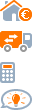
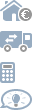

In [18]:
response.text

In [19]:
from fake_useragent import UserAgent
ua = UserAgent()

In [20]:
url = 'https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=1'
scrapy.Request(url)

<GET https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?&pagenumber=1>

In [21]:
df_raw

,url,title,address,region,contact_person,telephone,mobile,fax,price_purchase,estimated_monthly_rate,rooms,living_area_m2,furnishing,flat_type,floor,floor_total,bedrooms,commission_buyer_rate,maintenance_cost,construction_year,object_state,heating_type,energy_efficiency_class,location,other_information


## Data Preparation 

In [ ]:
# Read CSV again
file_path_raw_selected = ''
file_path_raw = file_path_raw_selected if file_path_raw_selected != '' else file_path_raw
df_raw = pd.read_csv(file_path_raw)

In [ ]:
## Parser
def parse_expose_id(url):
    id = url.split('/')[-2]
    return id

def parse_address(address, region):
    address = address.strip() if address is not None else ''
    address += ' ' + region if region is not None else ''
    return address

def parse_contact_person(contact_person):
    return contact_person if contact_person is not None else ''

def parse_telefon(telefon):
    return telefon[0].replace(' ', '') if len(telefon) > 0 else None

def parse_mobile(mobile): 
    mobile = mobile[0] if len(mobile) > 0 else ''
    return mobile.replace(' ', '')

def parse_fax(fax):
    fax = fax[0] if len(fax) > 0 else ''
    return fax.replace(' ', '')

def parse_price(price):
    price = re.sub('[^0-9]\s*', '', str(price)) if price else 0
    return int(price) if price is not '' else 0

def parse_estimated_monthly_rate(estimated_monthly_rate):
    estimated_monthly_rate = re.sub('[^0-9]', '', str(estimated_monthly_rate)) if estimated_monthly_rate else 0
    return int(estimated_monthly_rate) if estimated_monthly_rate is not '' else 0

def parse_commision(commission):
    if commission is not None:
        try:
            commission = re.search('[0-9]+,?[0-9]*', commission).group() 
        except:
            commission = ''
    else:
        commission = ''

    commission = commission.replace(',', '.')
    return float(commission) if len(commission) > 0 else 0

def parse_rooms_count(rooms_count):
    return float(str(rooms_count).replace(" ","").replace(",",".") ) if rooms_count is not None else 0

def parse_living_area(living_area):
    living_area = re.sub('[^0-9\.]', '', str(living_area).replace(",",".")) if living_area is not None else 0
    return float(living_area) if living_area else 0

def parse_furnishing(furnishing):
    print(furnishing)
    furnishing = list(set(furnishing))
    furnishing = [t for t in furnishing if t != ' ']
    print(furnishing)
    return furnishing if len(furnishing) > 0 else ''

def parse_bedroom(bedroom):
    bedroom = re.sub('[^0-9]', '', str(bedroom)) if bedroom is not None else 0
    return int(bedroom) if bedroom else 0

def parse_allowance(allowance):
    allowance = re.sub('[^0-9]', '', str(allowance)) if allowance is not None else 0
    return int(allowance) if allowance else 0

def parse_energy_efficiency_class(energy_efficiency_class):
    return energy_efficiency_class if energy_efficiency_class is not None else ''

In [ ]:
df_base = df_raw.copy()
# TODO clarify default values
# TODO fix parse issues (int, roundings, etc.)
# TODO fix address
# df_base['address'] = df_base.apply(lambda x: parse_address(x['address'], x['region']) if x.name in ['address'] else x)
df_base['id_expose'] = df_base['url'].apply(parse_expose_id)
df_base['contact_person'] = df_base['contact_person'].apply(parse_contact_person)
df_base['telephone'] = df_base['telephone'].apply(parse_telefon)
df_base['mobile'] = df_base['mobile'].apply(parse_mobile)
df_base['fax'] = df_base['fax'].apply(parse_fax)
df_base['price_purchase'] = df_base['price_purchase'].apply(parse_price)
df_base['commission_buyer_rate'] = df_base['commission_buyer_rate'].apply(parse_commision)
df_base['estimated_monthly_rate'] = df_base['estimated_monthly_rate'].apply(parse_estimated_monthly_rate)
df_base['rooms'] = df_base['rooms'].apply(parse_rooms_count)
df_base['living_area_m2'] = df_base['living_area_m2'].apply(parse_living_area)
# df_base['furnishing'] = df_base['furnishing'].apply(parse_furnishing) # seems to be unecessary
df_base['bedrooms'] = df_base['bedrooms'].apply(parse_bedroom)
df_base['maintenance_cost'] = df_base['maintenance_cost'].apply(parse_allowance)
df_base['energy_efficiency_class'] = df_base['energy_efficiency_class'].apply(parse_energy_efficiency_class)


In [ ]:
df_base

## Exploration

In [ ]:
# dataframe dimensions
df_base.shape

In [ ]:
# column datatypes
df_base.dtypes

In [ ]:
df_base.select_dtypes(include=['object']).isnull().sum()

In [ ]:
df_base.head(10)
#df_base['url'][4]
#df[0:5]
#df.tail()

In [ ]:
# TODO transform into numerical values for historgrams
# df_base.hist(xrot=-45, figsize=(14,14))

In [ ]:
df_base.describe()

In [ ]:
df_base.describe(include='object')

In [ ]:
# TODO fix usage of list
# TODO data needs to be fixed
for features in df_base.dtypes[df_base.dtypes == 'object'].index:
    sns.countplot(y=features, data=df_base)
    plt.show()

## Data argmentation
Goal is to calculate the yearly ROI

In [ ]:
df_finance = df_base[['url','price_purchase', 'living_area_m2', 'commission_buyer_rate']]
df_finance['is_foreclosure'] = df_base['other_information'].str.contains('Zwangsversteigerung', na = False)
df_finance['price_per_m2'] = df_finance['price_purchase'] / df_finance['living_area_m2']
df_finance['notary_costs'] = notary_percentage * df_finance['price_purchase']

df_finance['land_registry_tax'] = land_registry_tax_percentage * df_finance['price_purchase']
df_finance['real_estate_transfer_tax'] = transfer_tax_percentage * df_finance['price_purchase']
df_finance['commission'] = df_finance['price_purchase'] * df_finance['commission_buyer_rate'] * 0.01 # TODO fix while parsing from scraper already
df_finance['total_buying_price'] = df_finance['price_purchase'] + df_finance['notary_costs'] + df_finance['land_registry_tax'] + df_finance['real_estate_transfer_tax'] + df_finance['commission']
df_finance['equity'] = equity_percentage * df_finance['total_buying_price']
df_finance['debt'] = df_finance['total_buying_price'] - df_finance['equity']
df_finance['interest_rate_monthly'] = interest_rate * df_finance['debt'] / 12
df_finance['mortgage_payment_yearly'] = mortgage_payment_rate * df_finance['debt']
df_finance['mortgage_payment_monthly'] = df_finance['mortgage_payment_yearly'] / 12
df_finance['monthly_rent'] = rent_price_index * df_finance['living_area_m2']
df_finance['additional_costs'] = additional_costs_rate_per_m2 * df_finance['living_area_m2']
df_finance['cashflow'] = df_finance['monthly_rent'] - df_finance['interest_rate_monthly'] - df_finance['mortgage_payment_monthly'] - df_finance['additional_costs']
df_finance['ROI'] = (df_finance['cashflow'] * 12) / df_finance['equity'] 





## Data Evaluation

In [ ]:
# TODO Put every step into CSV
# Read CSV again
# file_path_interim_selected = ''
# file_path_interim = file_path_interim_selected if file_path_interim_selected != '' else file_path_interim
# df_finance = pd.read_csv(file_path_raw)

In [ ]:
df_interim = df_finance.copy()
df_interim = df_interim.sort_values(by=['ROI'], ascending=False)
df_interim.to_csv(file_path_interim, index=False)

In [ ]:
if has_foreclosure:
    # df_finance = df_finance[df_finance['is_foreclosure']] 
    None
else:
    df_finance = df_finance[df_finance['is_foreclosure'] == False] 


In [ ]:
df_finance.sort_values(by=['ROI'], ascending=False)

In [ ]:
df_finance[(df_finance['cashflow'] > 0) ].sort_values(by=['ROI'], ascending=False).head(20)

In [ ]:
df_finance[(df_finance['cashflow'] > 0) & (df_finance['equity'] <= equity_max)].sort_values(by=['ROI'], ascending=False)[30:40]

In [ ]:
url = "https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?"
import urllib.request
req = urllib.request.Request(
      url, 
      data=None, 
      headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'})

f = urllib.request.urlopen(req)
f.status, f.msg
(200, 'OK')